In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'results.csv'
data = pd.read_csv(file_path)


data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   algorithmName          468 non-null    object 
 1   gridHash               468 non-null    object 
 2   nodesVisited           468 non-null    int64  
 3   movementsTaken         468 non-null    int64  
 4   optimalMovementsTaken  468 non-null    int64  
 5   solutionFound          468 non-null    bool   
 6   solutionGap            468 non-null    float64
 7   timeElapsed            468 non-null    int64  
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 26.2+ KB


In [2]:
algorithm_categories = {
    "B": "Breadth-first search",
    "I": "IDS without repetition",
    "I1": "IDS classic",
    "U": "Uniform-cost search",
    "A": "A* search (Manhattan)",
    "A1": "A* search (Euclidean)",
    "A2": "A* search (Correct Positions)",
    "G": "Greedy best-first (Depth)",
    "G1": "Greedy best-first (Manhattan)",
    "H": "Hill Climbing (Manhattan)",
    "HR": "Hill Climbing (Random Stochastic)",
    "HS1": "Hill Climbing (Simulated Annealing, Manhattan)",
    "HS2": "Hill Climbing (Simulated Annealing, Euclidean)",
    "HS3": "Hill Climbing (Simulated Annealing, Correctness)",
    "R": "RandomSearch"
}

data['algorithmCategory'] = data['algorithmName'].map(algorithm_categories)

data.head()

algorithmName   gridHash  nodesVisited  movementsTaken  \
0             B  12345678_             1               0   
1             I  12345678_             1               0   
2            I1  12345678_             1               0   
3             U  12345678_             1               0   
4             A  12345678_             1               0   

   optimalMovementsTaken  solutionFound  solutionGap  timeElapsed  \
0                      0           True          0.0      8733300   
1                      0           True          0.0       313300   
2                      0           True          0.0       245900   
3                      0           True          0.0      5191100   
4                      0           True          0.0      1839800   

        algorithmCategory  
0    Breadth-first search  
1  IDS without repetition  
2             IDS classic  
3     Uniform-cost search  
4   A* search (Manhattan)

In [3]:
avg_metrics = data.groupby("algorithmName")[["nodesVisited", "movementsTaken", "timeElapsed", "solutionGap"]].mean()

avg_metrics_sorted = avg_metrics.sort_values(by="timeElapsed")

avg_metrics_sorted


nodesVisited  movementsTaken   timeElapsed  solutionGap
algorithmName                                                         
HS1            4.937500e+00         3.93750  1.204062e+05     0.749375
HR             3.812500e+00         2.81250  1.357500e+05     0.603125
HS3            4.115625e+01        40.15625  1.969250e+05     1.872812
HS2            3.162500e+01        30.62500  2.041844e+05     1.399063
H              4.062500e+00         3.06250  3.350219e+05     0.597187
G1             1.347500e+02        38.93750  1.166816e+06     1.125312
R              4.254062e+02       424.40625  5.591538e+06    59.930312
A              1.196812e+03        15.50000  1.211472e+07     0.000000
A1             3.415156e+03        15.50000  4.467238e+07     0.000000
B              4.898188e+04        15.50000  1.769551e+08     0.000000
A2             2.286288e+04        15.50000  3.800119e+08     0.000000
G              1.257242e+05        15.50000  6.754041e+08     0.000000
U              1.257242e+05        15.50000  7.693290e+08     0.000000
I              3.235095e+05        18.93750  9.284784e+08     0.141250
I1             3.571781e+07         9.50000  2.571447e+10     0.000000

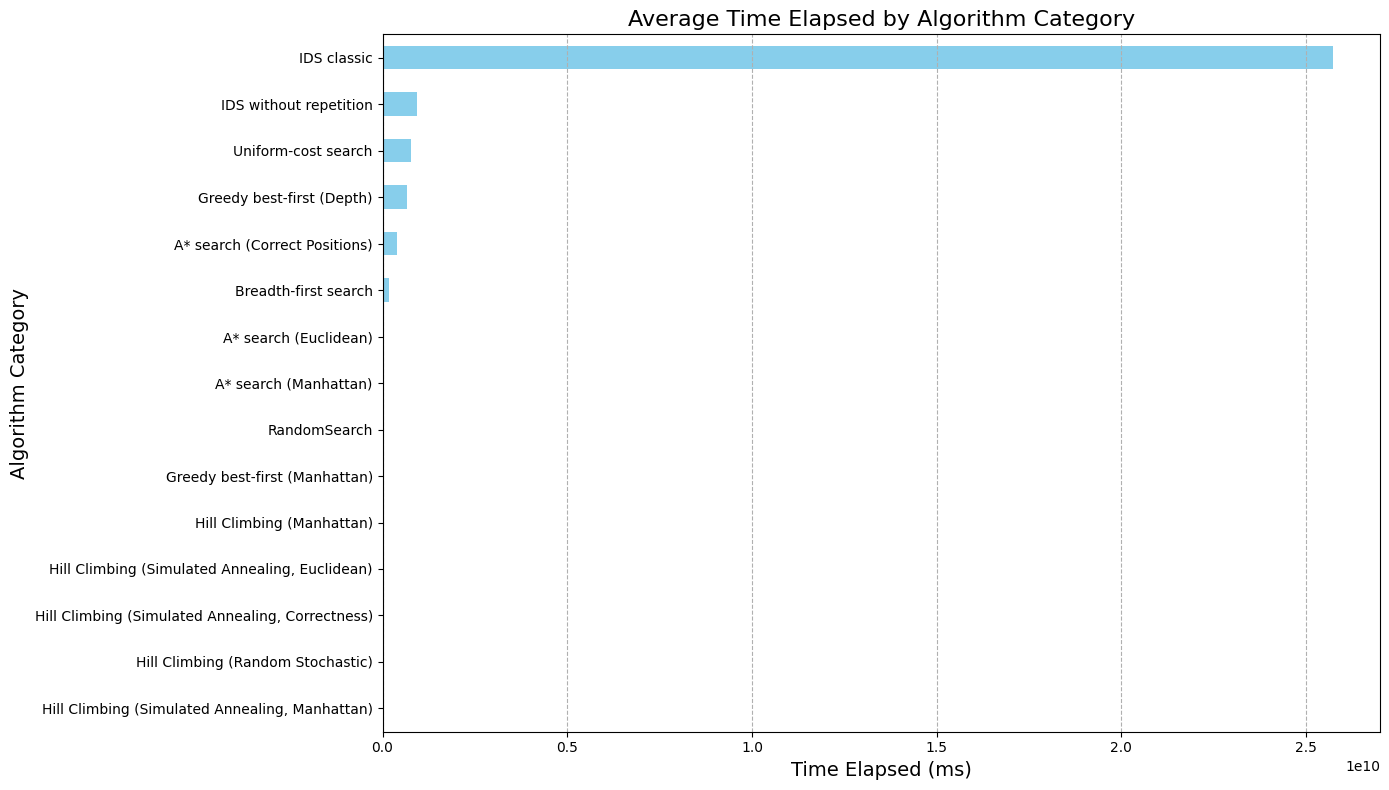

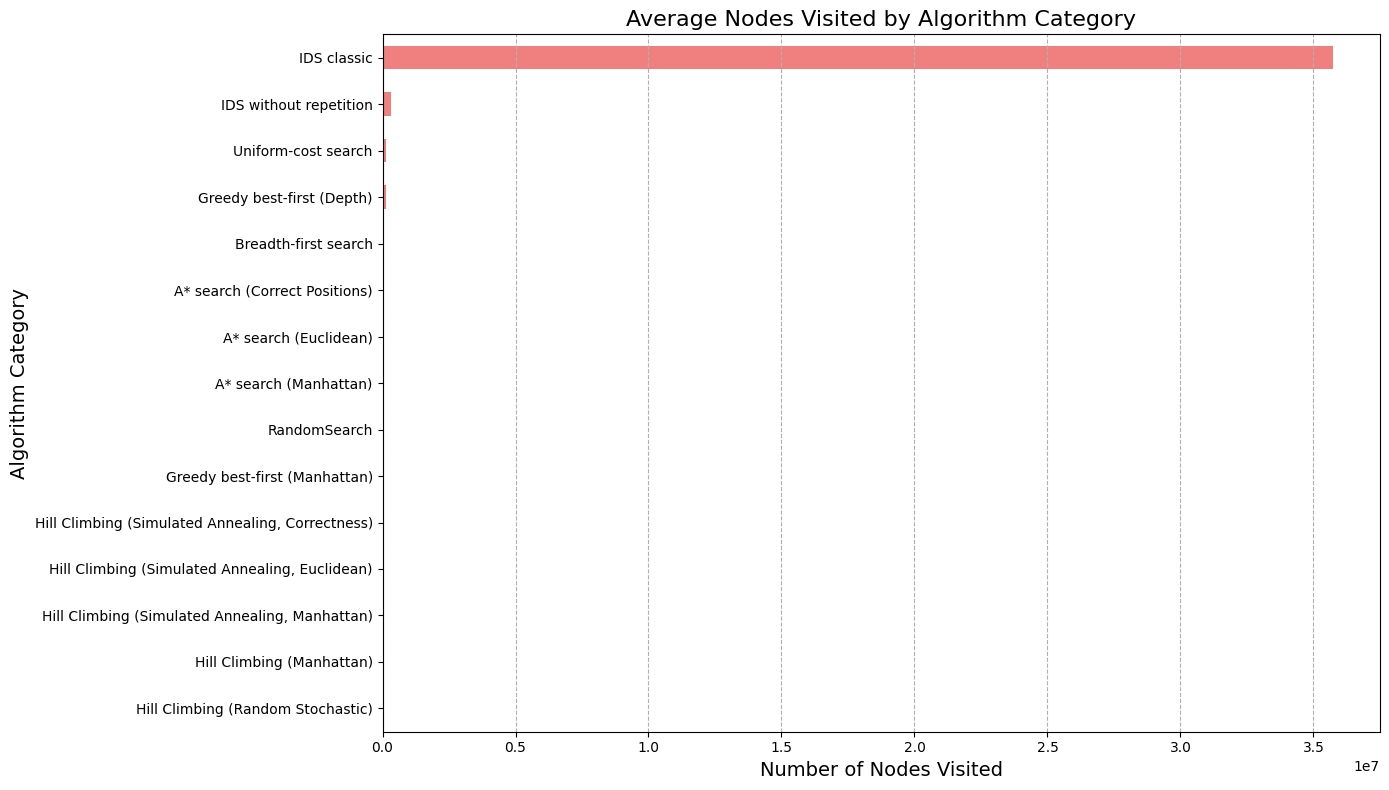

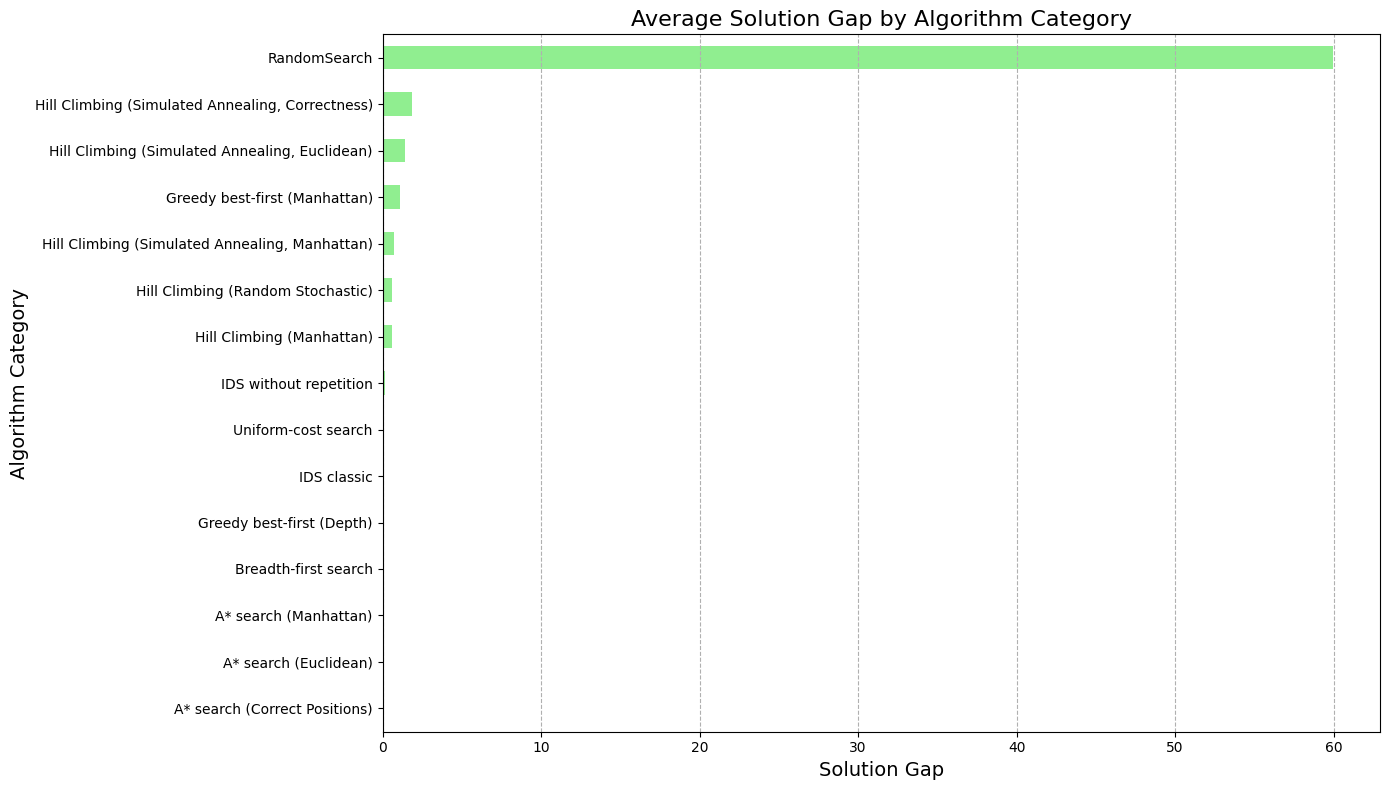

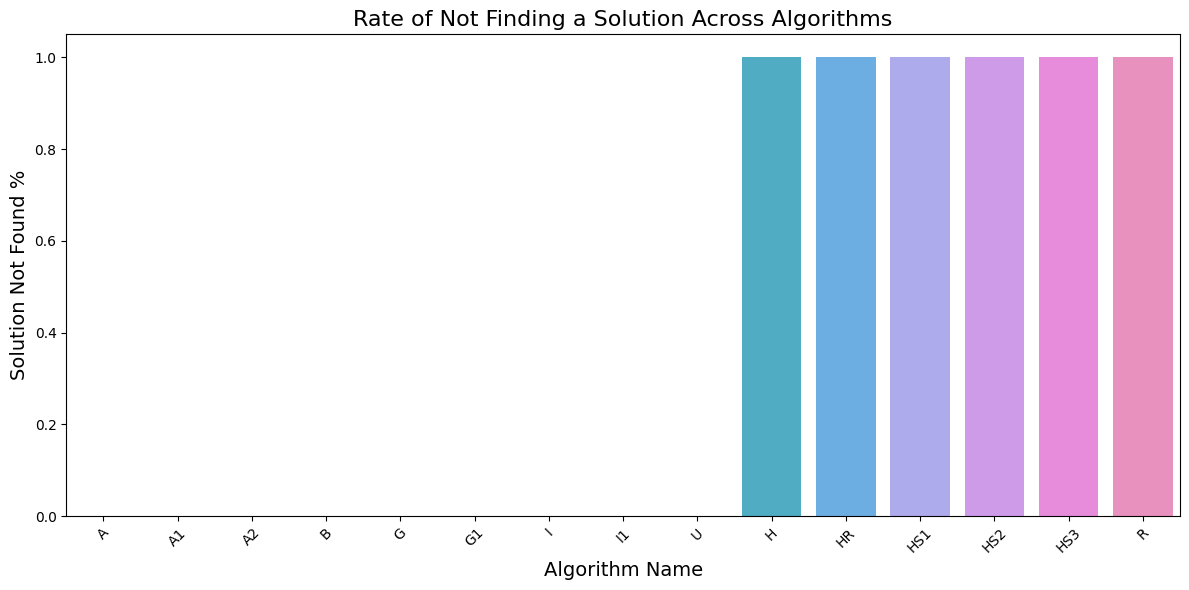

In [4]:
def plot_nodes_visited(data_original, title_suffix=""):
    avg_nodes_visited = data_original.groupby("algorithmCategory")["nodesVisited"].mean().sort_values()

    plt.figure(figsize=(14, 8))
    avg_nodes_visited.plot(kind='barh', color='lightcoral')
    plt.title(f'Average Nodes Visited by Algorithm Category{title_suffix}', fontsize=16)
    plt.xlabel('Number of Nodes Visited', fontsize=14)
    plt.ylabel('Algorithm Category', fontsize=14)
    plt.grid(axis='x', linestyle='--')
    plt.tight_layout()
    plt.show()


def plot_solution_gap(data_original, title_suffix=""):
    avg_solution_gap = data_original.groupby("algorithmCategory")["solutionGap"].mean().sort_values()

    plt.figure(figsize=(14, 8))
    avg_solution_gap.plot(kind='barh', color='lightgreen')
    plt.title(f'Average Solution Gap by Algorithm Category{title_suffix}', fontsize=16)
    plt.xlabel('Solution Gap', fontsize=14)
    plt.ylabel('Algorithm Category', fontsize=14)
    plt.grid(axis='x', linestyle='--')
    plt.tight_layout()
    plt.show()


def plot_time_elapsed(data_original, title_suffix=""):
    avg_time_elapsed = data_original.groupby("algorithmCategory")["timeElapsed"].mean().sort_values()


    plt.figure(figsize=(14, 8))
    avg_time_elapsed.plot(kind='barh', color='skyblue')
    plt.title(f'Average Time Elapsed by Algorithm Category{title_suffix}', fontsize=16)
    plt.xlabel('Time Elapsed (ms)', fontsize=14)
    plt.ylabel('Algorithm Category', fontsize=14)
    plt.grid(axis='x', linestyle='--')
    plt.tight_layout()
    plt.show()


def plot_solution_found_rate(data_original, title_suffix=""):
    data_grouped = data_original.groupby("algorithmName")[
        ["nodesVisited", "movementsTaken", "timeElapsed", "solutionGap", "solutionFound"]].mean()
    data_grouped["solutionFound"] = data_grouped["solutionFound"].astype(int)
    data_grouped["solutionFound"] = 1 - data_grouped["solutionFound"]
    solution_found_rate = data_grouped.groupby("algorithmName")["solutionFound"].mean().sort_values()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=solution_found_rate.index, y=solution_found_rate)
    plt.title(f'Rate of Not Finding a Solution Across Algorithms{title_suffix}', fontsize=16)
    plt.xlabel('Algorithm Name', fontsize=14)
    plt.ylabel('Solution Not Found %', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def show_plots(data_original, title_suffix=""):
    avg_metrics_new = data_original.groupby("algorithmName")[
        ["nodesVisited", "movementsTaken", "timeElapsed", "solutionGap"]].mean()

    # Sorting the values for better visualization
    avg_metrics_new = avg_metrics_new.sort_values(by="timeElapsed")

    plot_time_elapsed(data_original, title_suffix)
    plot_nodes_visited(data_original, title_suffix)
    plot_solution_gap(data_original, title_suffix)
    plot_solution_found_rate(data_original, title_suffix)


show_plots(data)

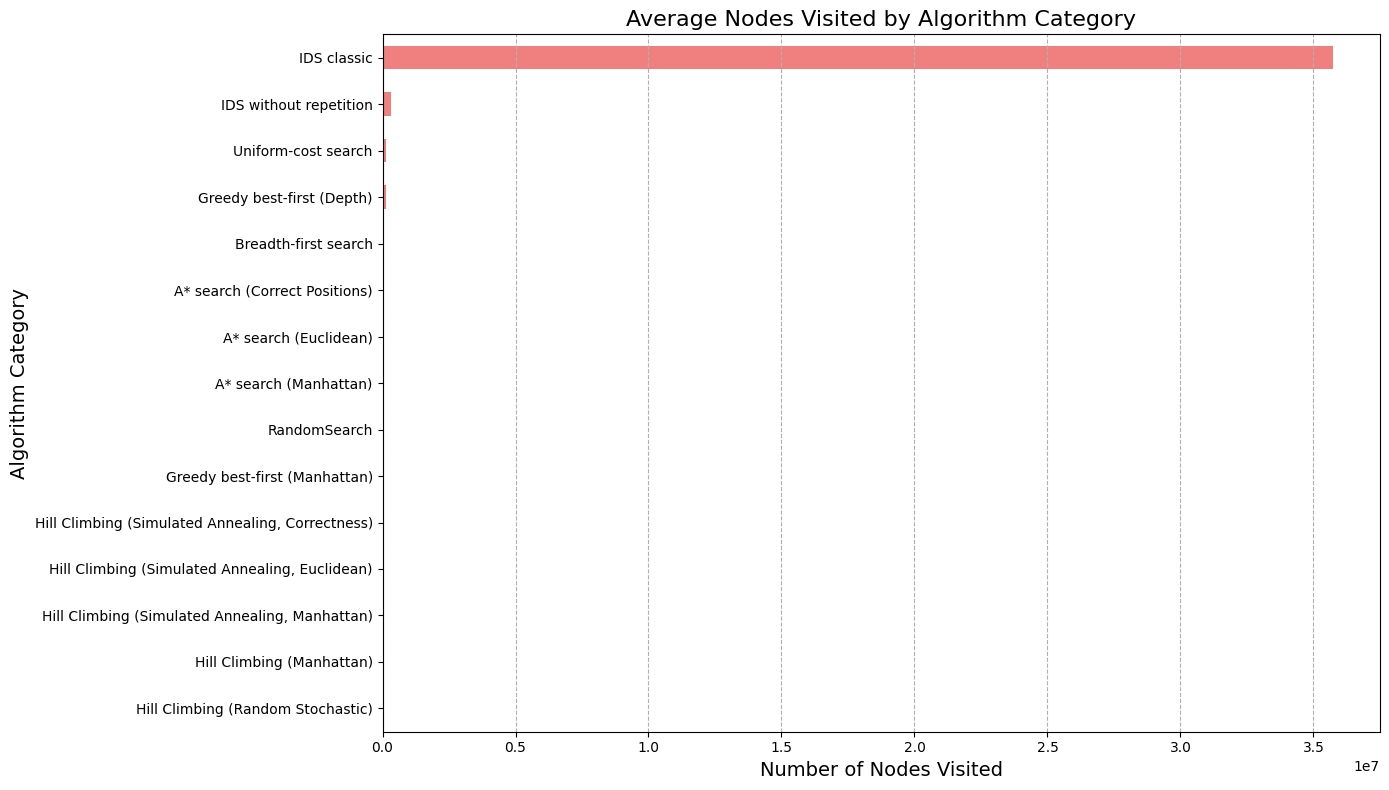

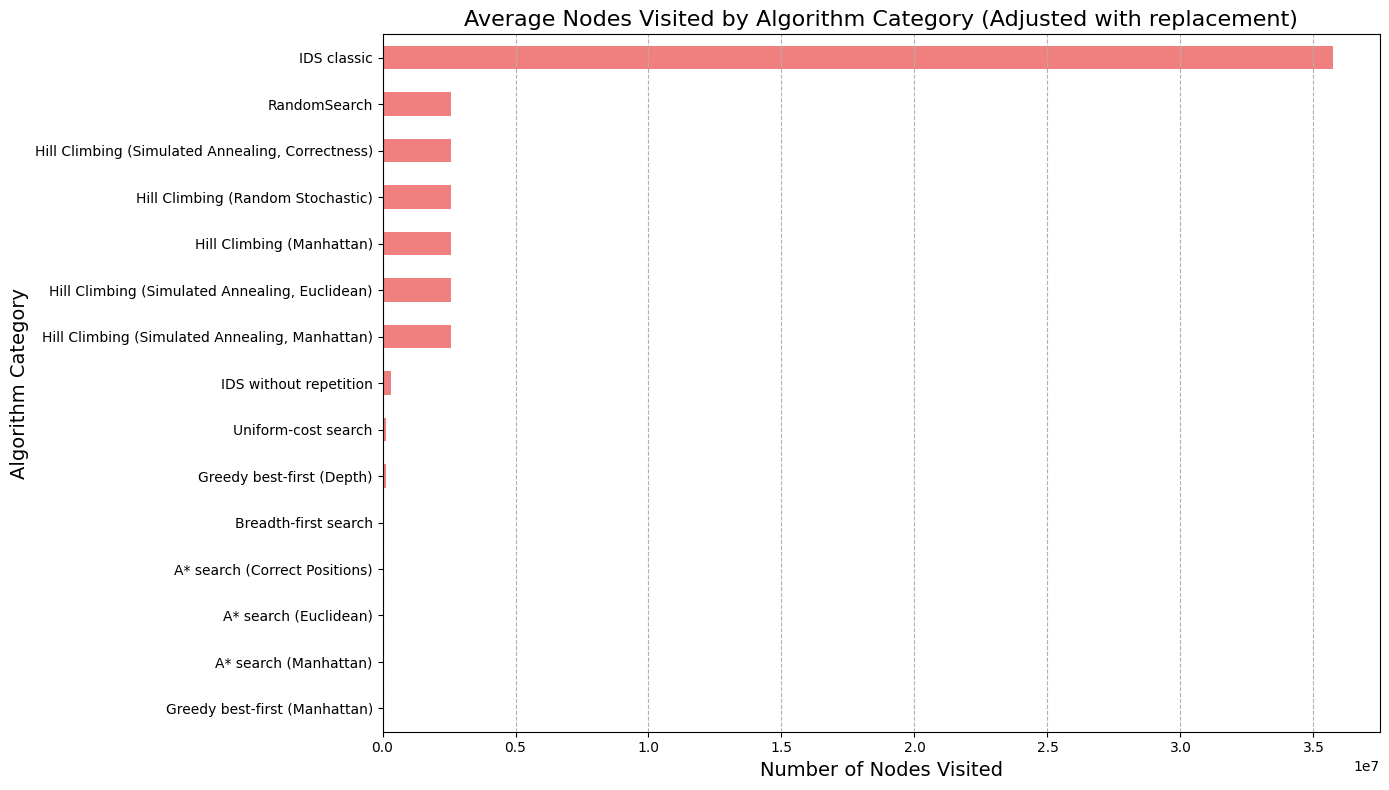

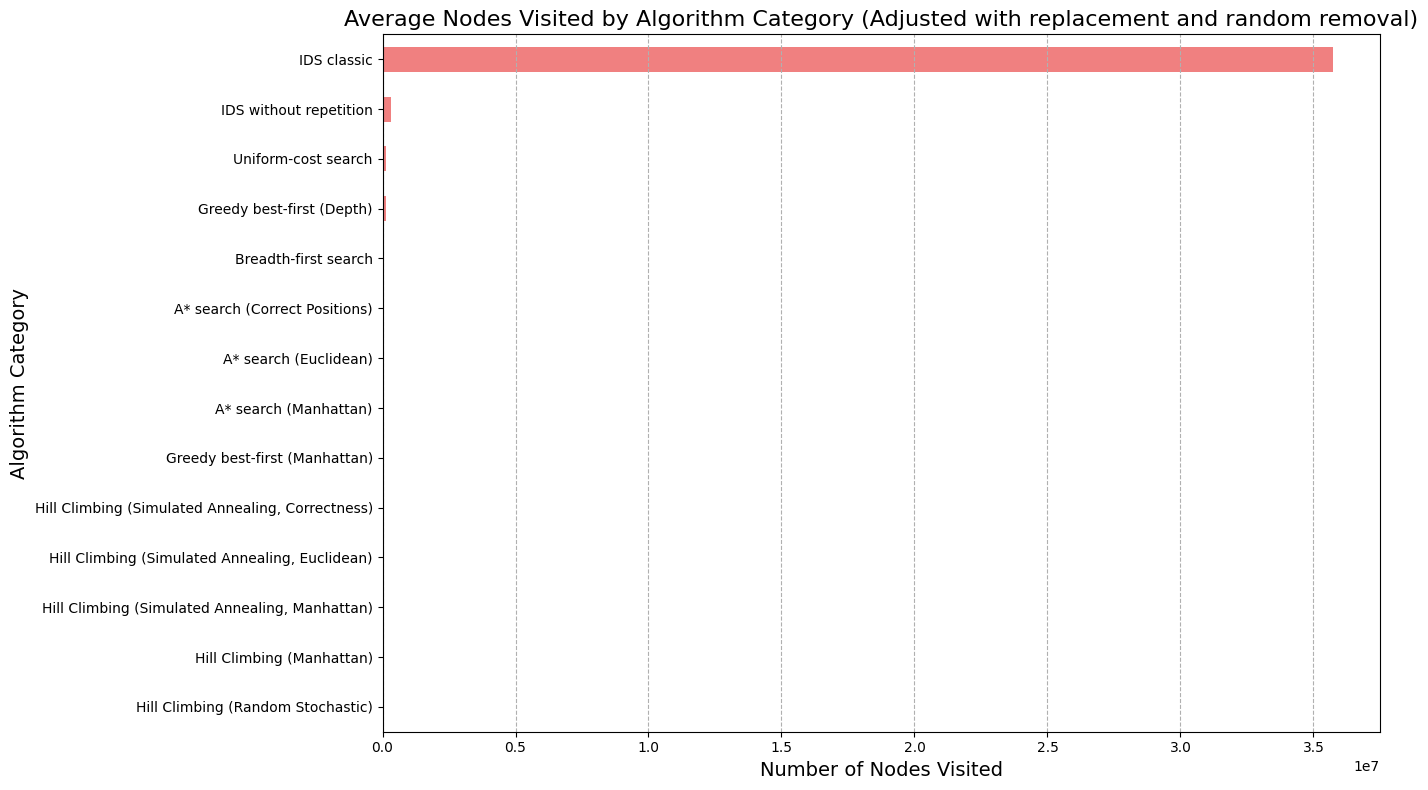

In [5]:
def replace_data_with_mean(data_original):
    unsuccessful_attempts = data_original[~data_original["solutionFound"]]

    replacement_values = {}
    for _, row in unsuccessful_attempts.iterrows():
        grid_hash = row["gridHash"]
        successful_attempts = data_original[(data_original["gridHash"] == grid_hash) & data_original["solutionFound"]]

        mean_time = successful_attempts["timeElapsed"].mean()
        mean_nodes = successful_attempts["nodesVisited"].mean()

        max_gap_algorithm = successful_attempts.groupby("algorithmName")["solutionGap"].mean().idxmax()

        # Get the maximum mean gap value
        max_mean_gap = successful_attempts[successful_attempts["algorithmName"] == max_gap_algorithm][
            "solutionGap"].mean()

        replacement_values[row.name] = {
            "mean_time": mean_time,
            "mean_nodes": mean_nodes,
            "max_mean_gap": max_mean_gap
        }

    # Create a copy of the data to preserve the original data for comparison
    data_adjusted = data_original.copy()

    # Replace the 'timeElapsed', 'nodesVisited', and 'solutionGap'
    # for unsuccessful attempts with the calculated values
    for idx, values in replacement_values.items():
        data_adjusted.loc[idx, "timeElapsed"] = int(values["mean_time"])
        data_adjusted.loc[idx, "nodesVisited"] = int(values["mean_nodes"])
        data_adjusted.loc[idx, "solutionGap"] = int(values["max_mean_gap"])

    return data_adjusted


data_adjusted = replace_data_with_mean(data)
data_no_R = data[data["algorithmName"] != "R"]
data_adjusted_no_R = replace_data_with_mean(data_no_R)

title_suffix1 = " (Adjusted with replacement)"
title_suffix2 = " (Adjusted with replacement and random removal)"


def compare_plots(data_full, data_adjusted, data_no_r, func=plot_nodes_visited):
    title_suffix1 = " (Adjusted with replacement)"
    title_suffix2 = " (Adjusted with replacement and random removal)"

    func(data_full, "")
    func(data_adjusted, title_suffix1)
    func(data_no_r, title_suffix2)


compare_plots(data, data_adjusted, data_no_R, plot_nodes_visited)


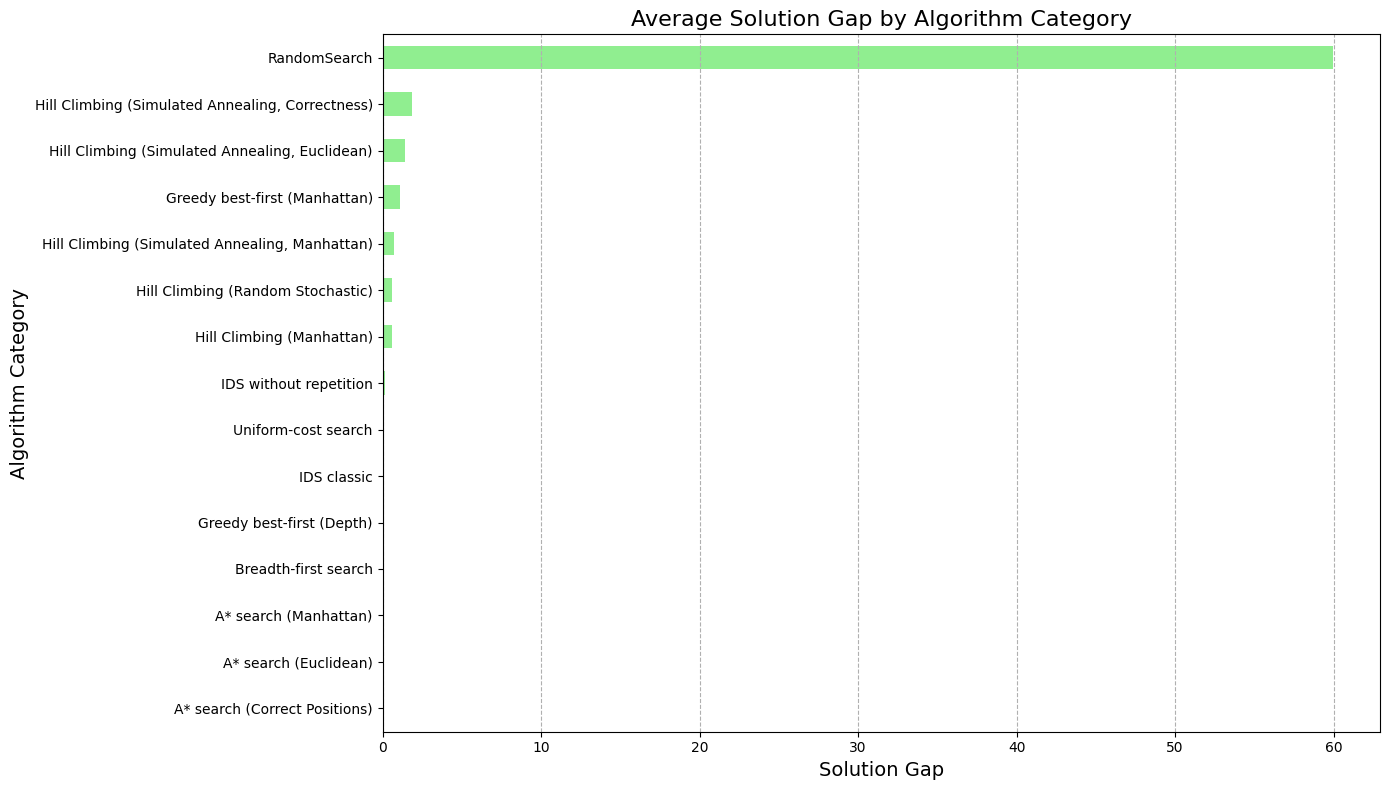

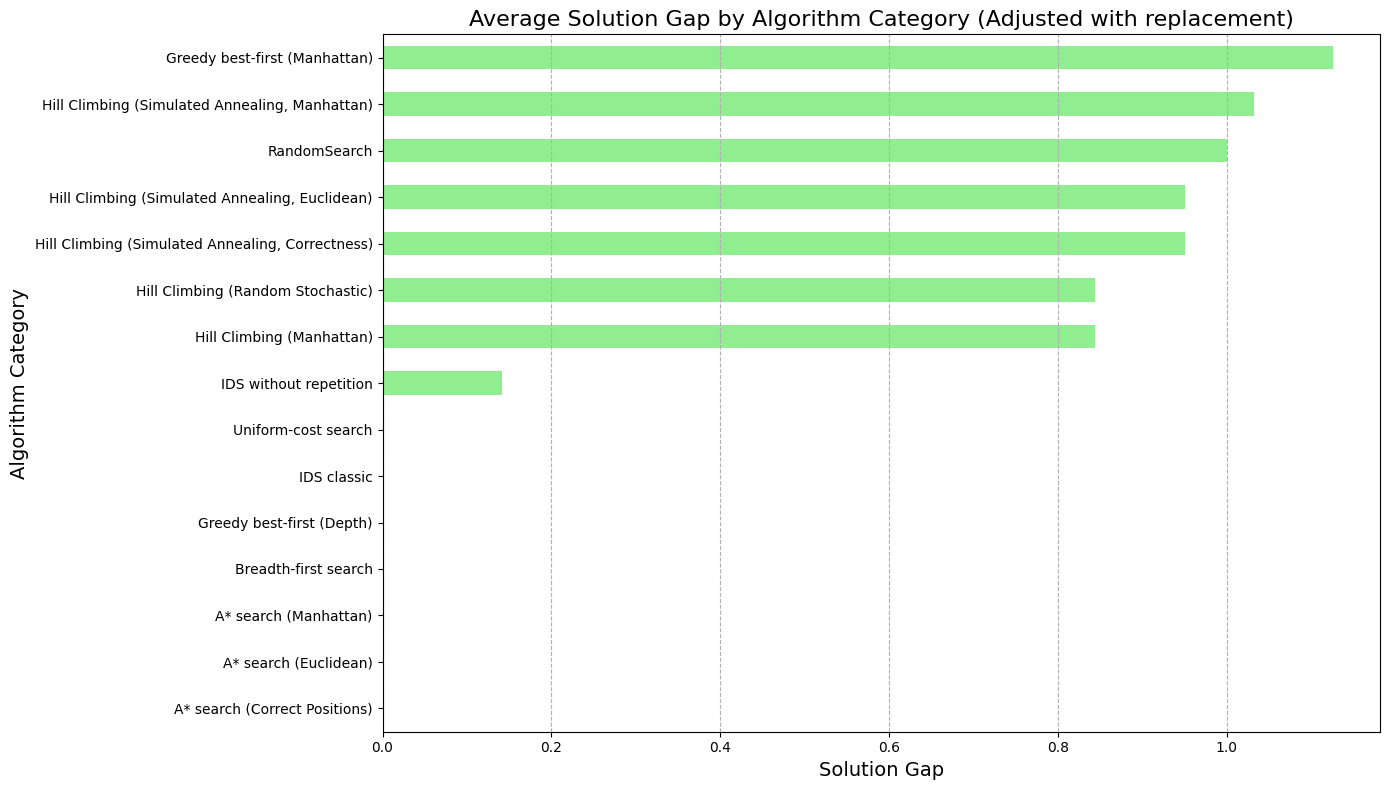

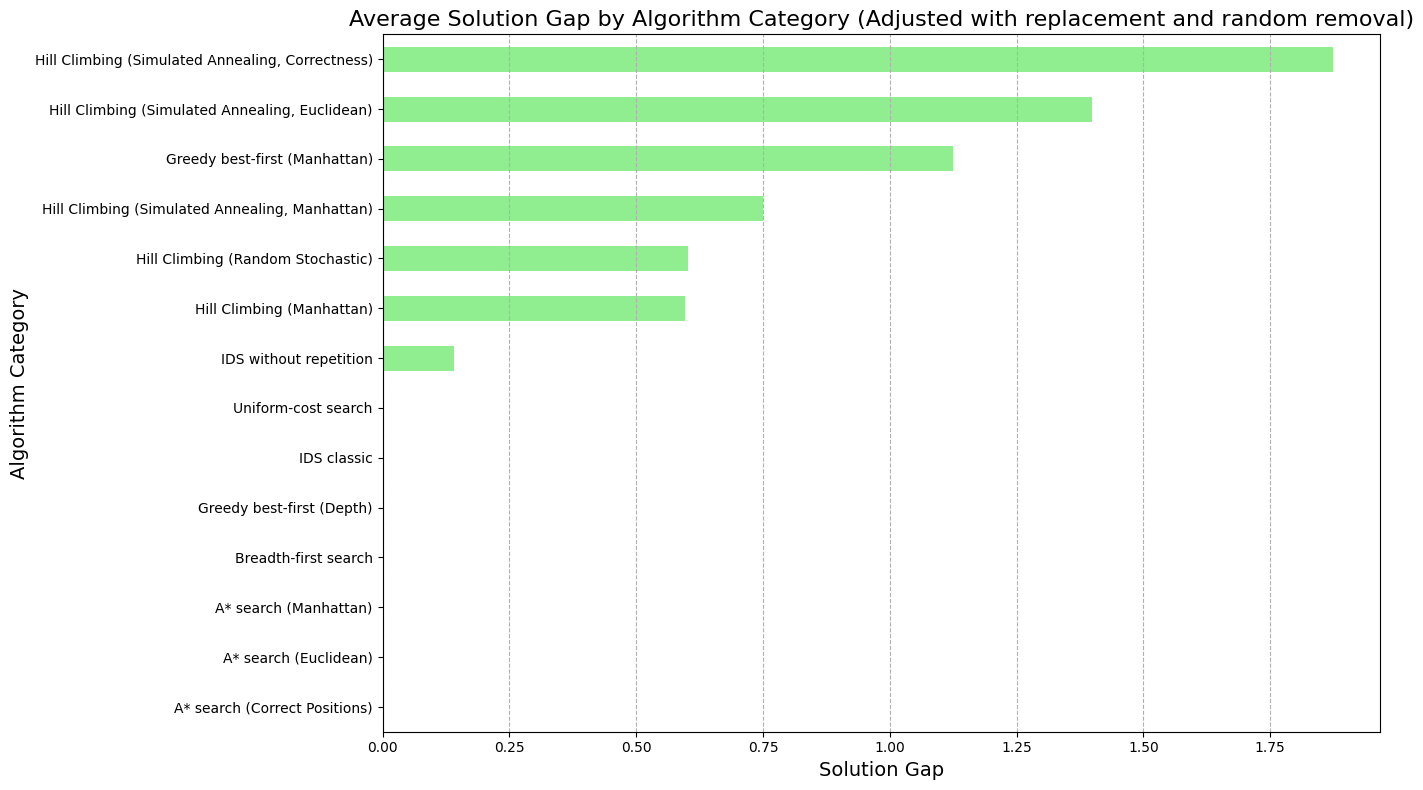

In [6]:
compare_plots(data, data_adjusted, data_no_R, plot_solution_gap)

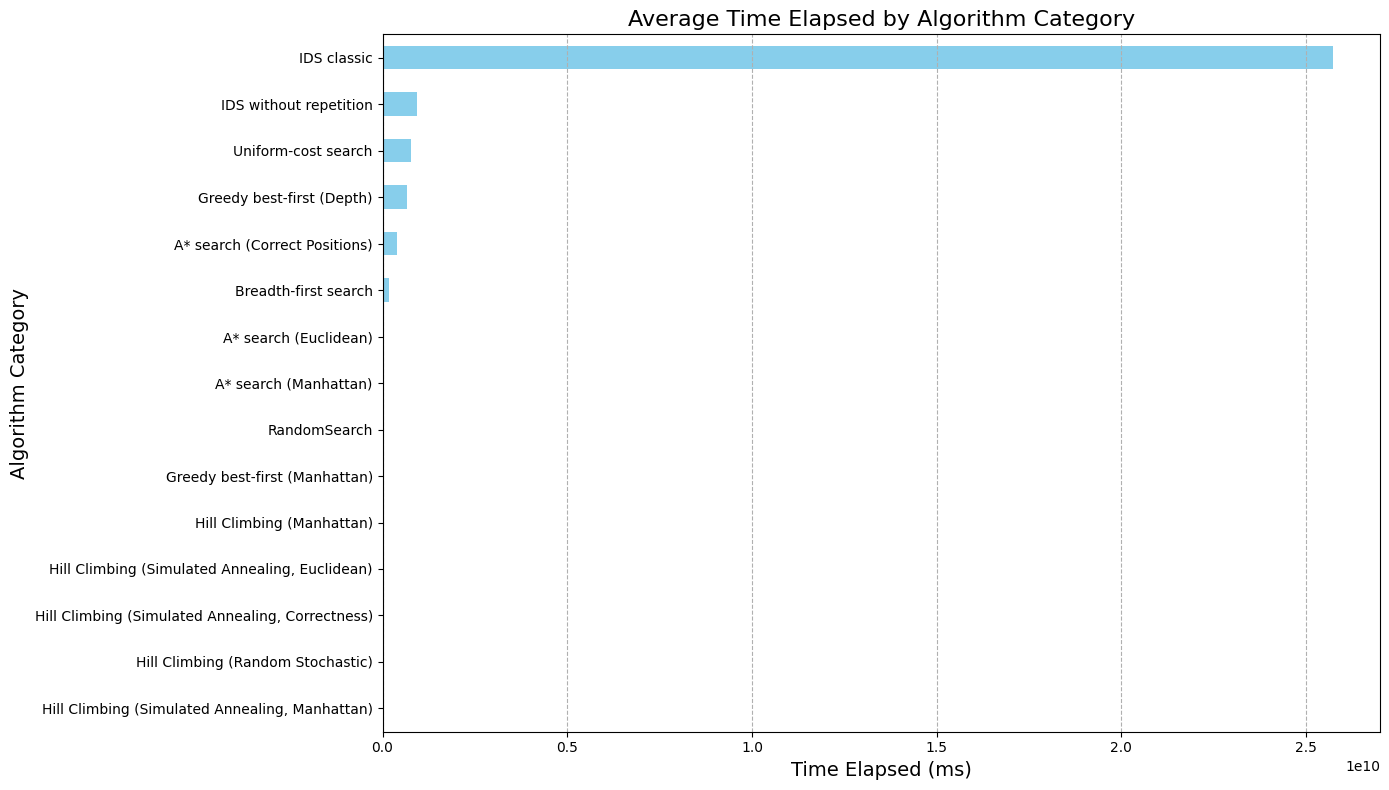

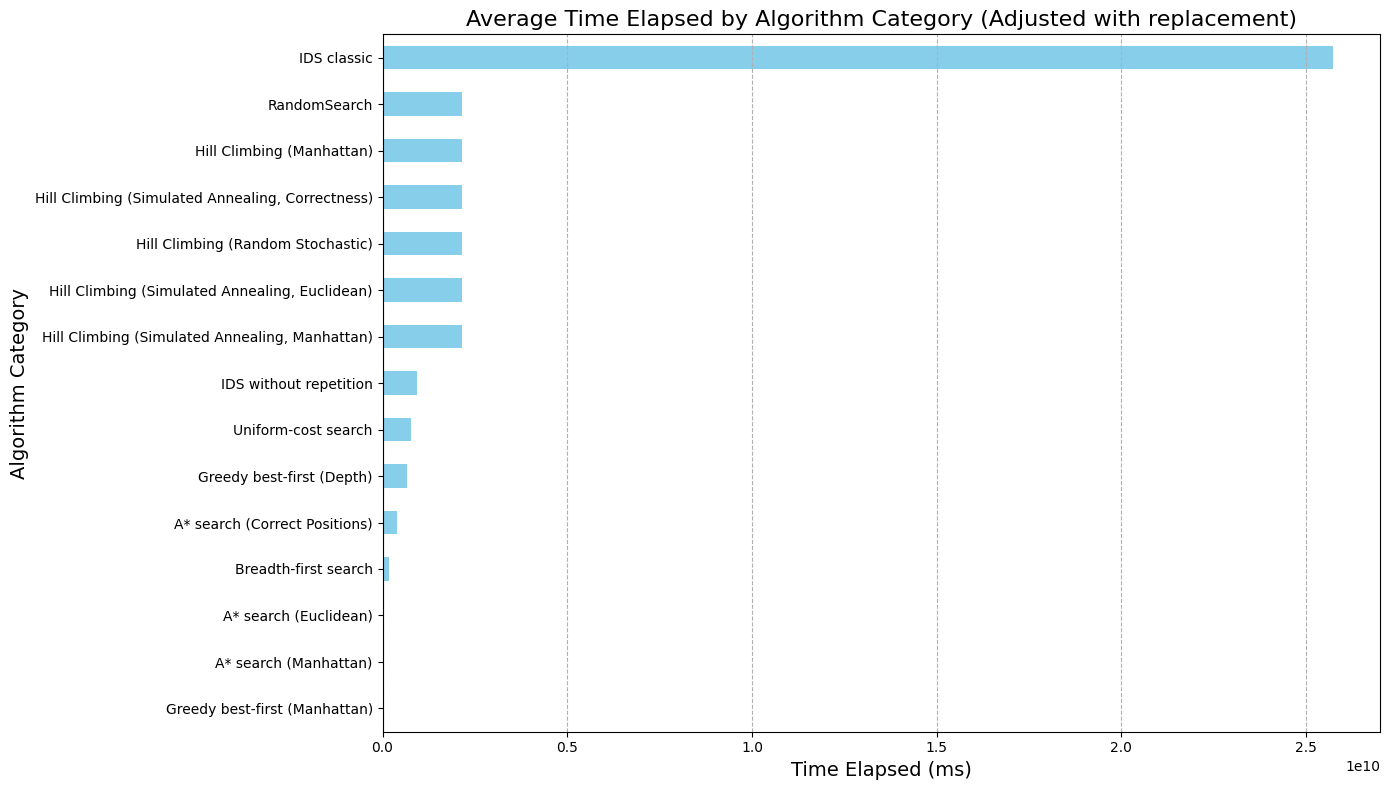

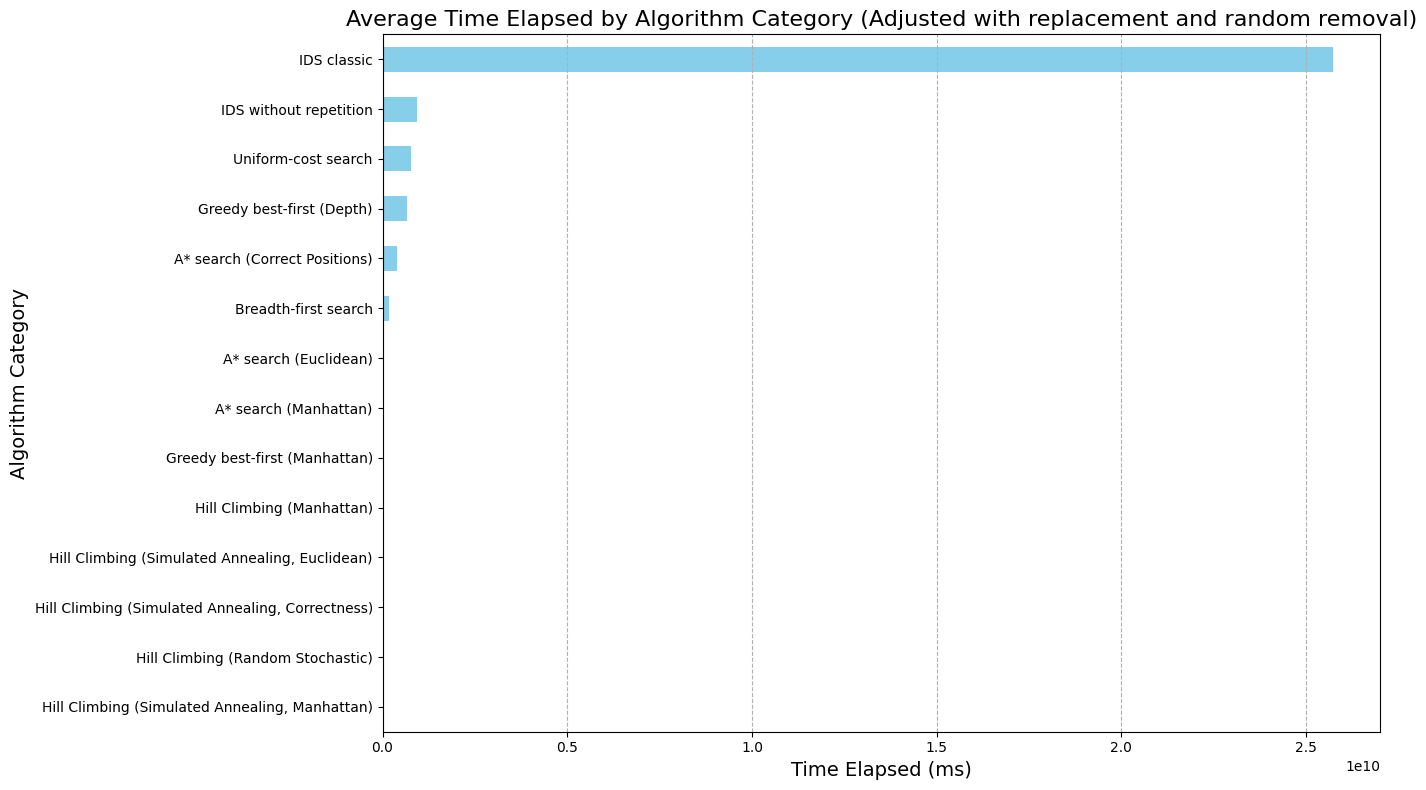

In [7]:
compare_plots(data, data_adjusted, data_no_R, plot_time_elapsed)

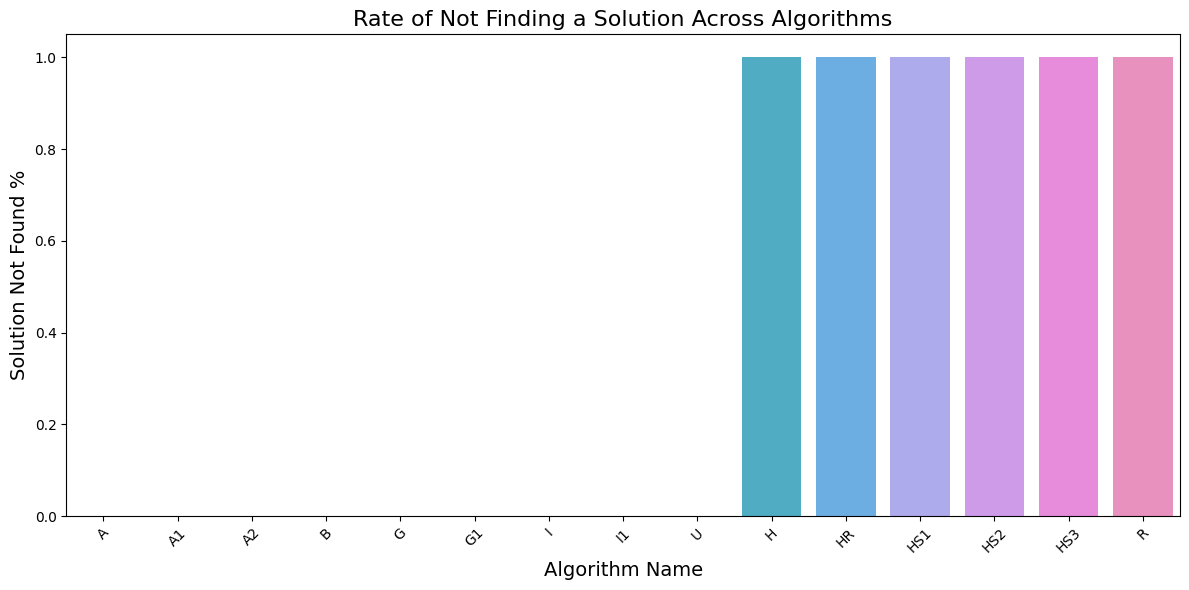

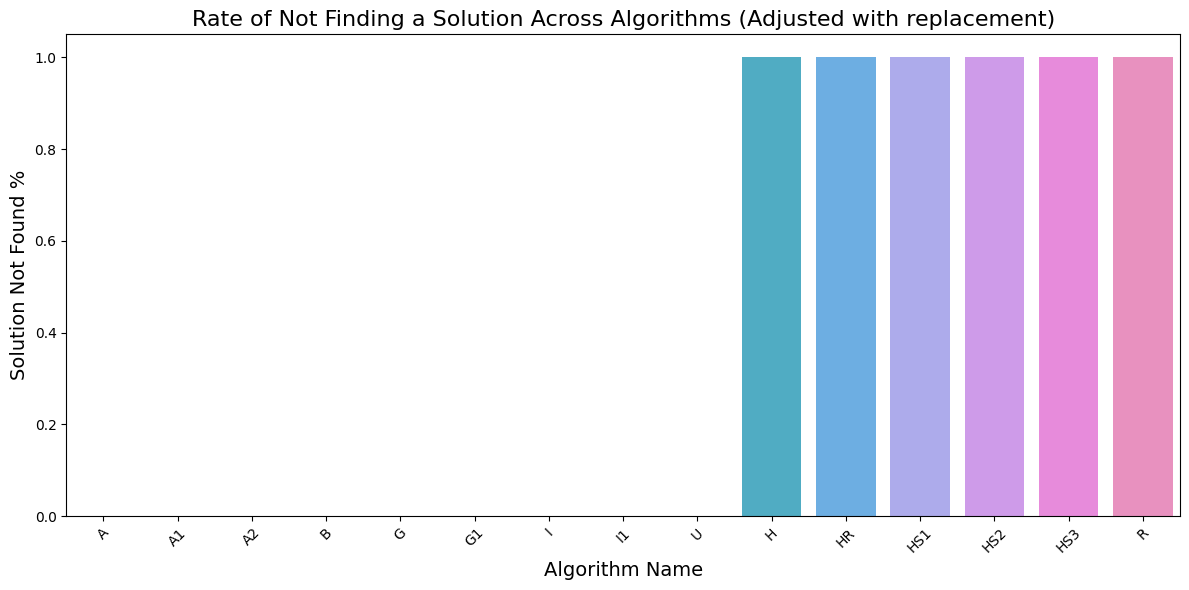

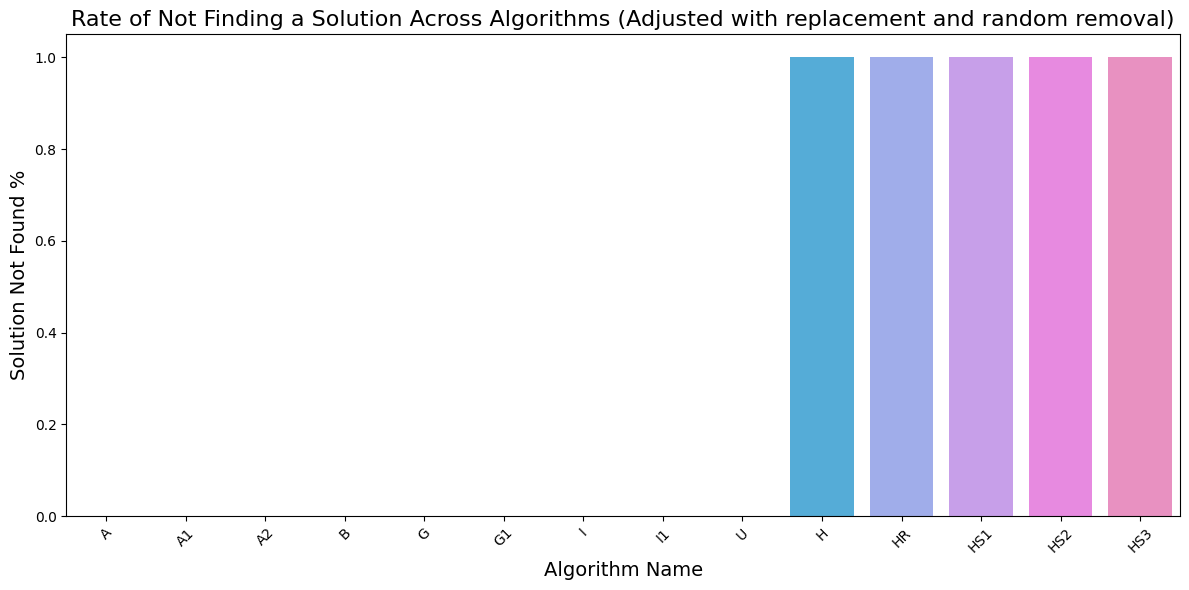

In [8]:
compare_plots(data, data_adjusted, data_no_R, plot_solution_found_rate)

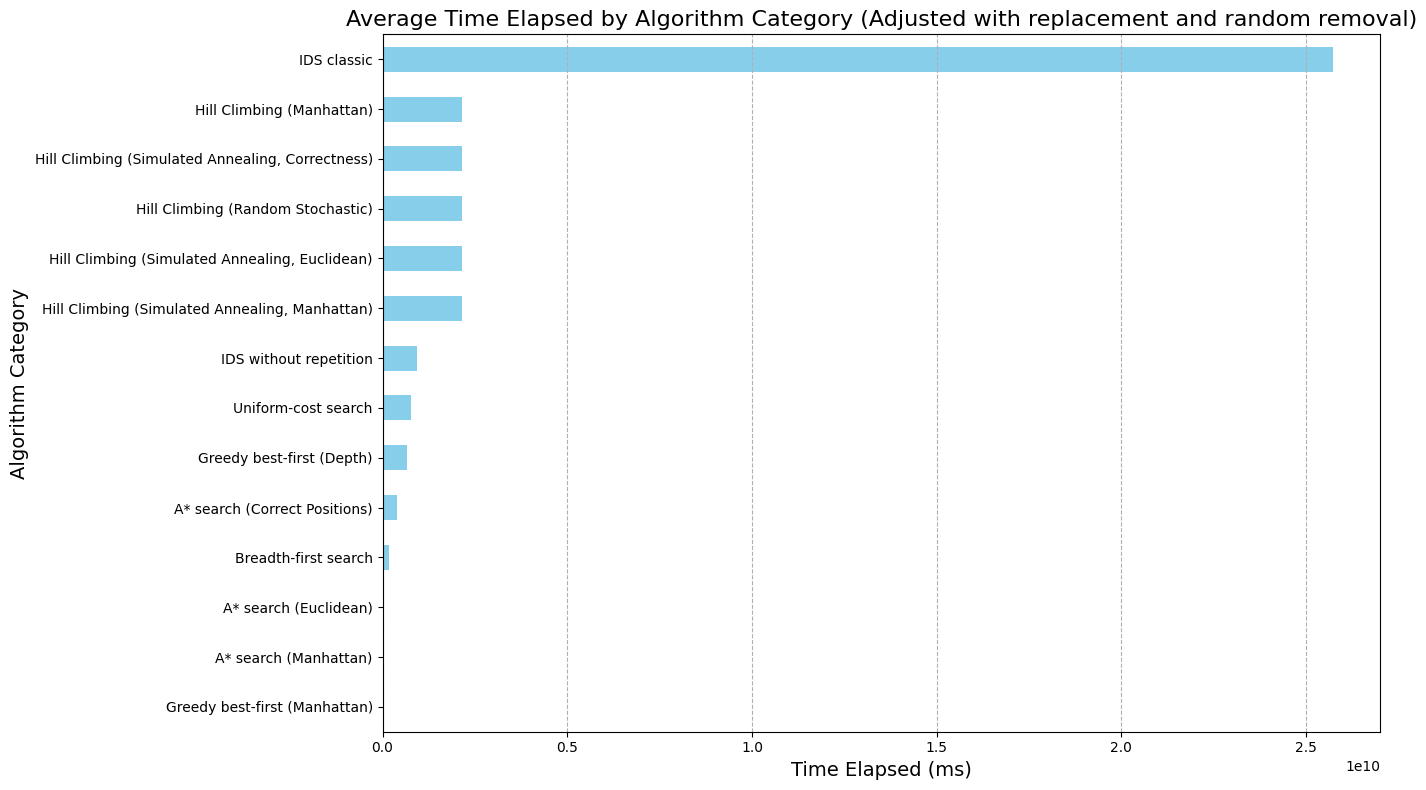

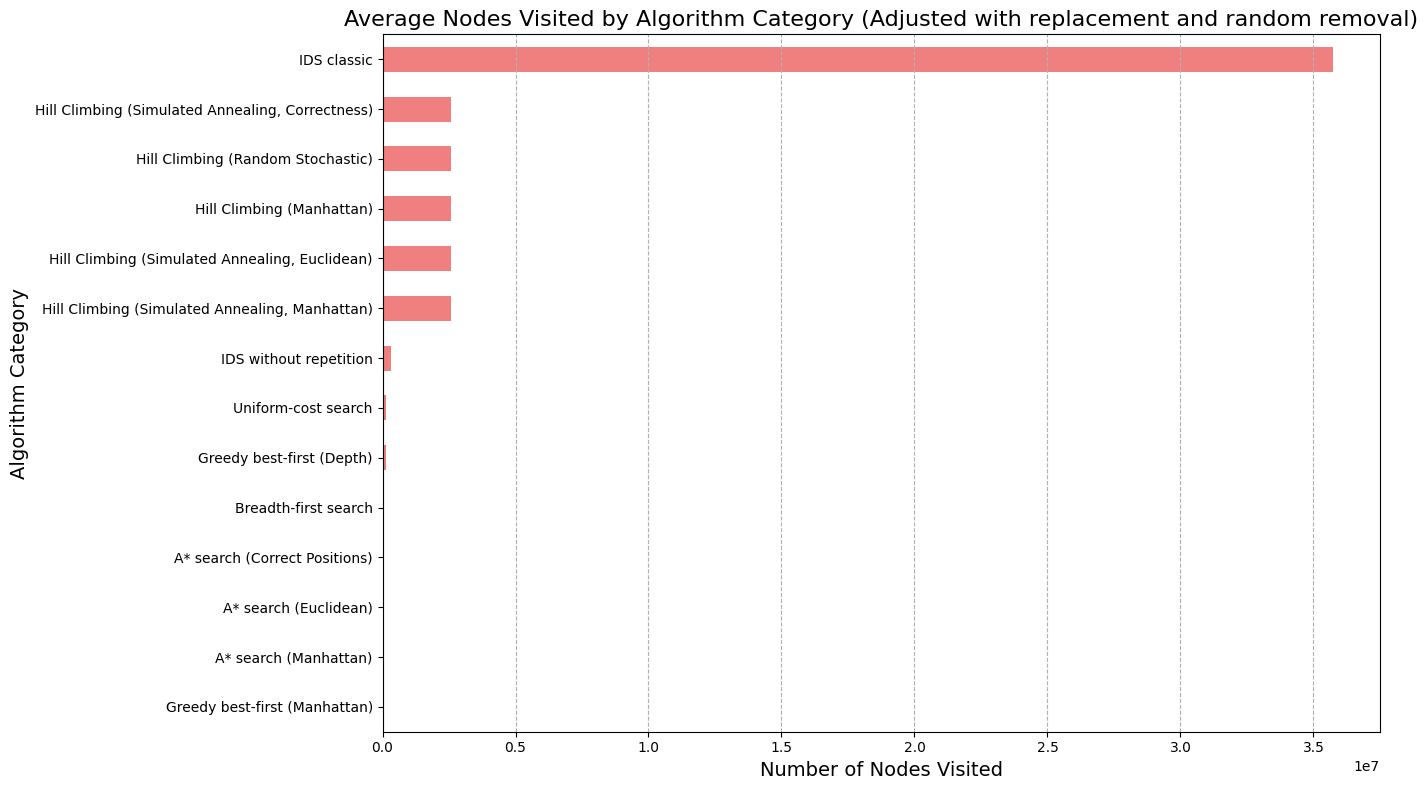

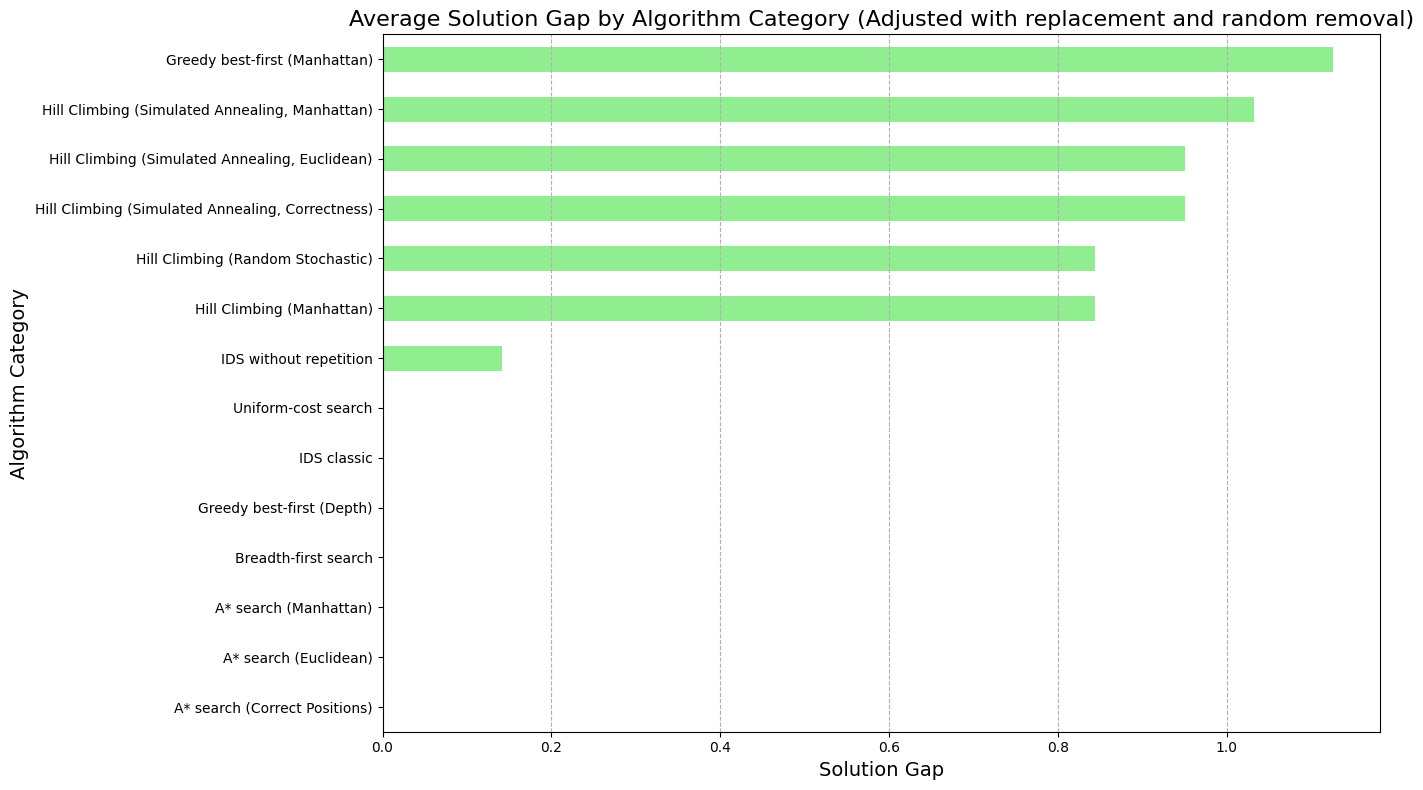

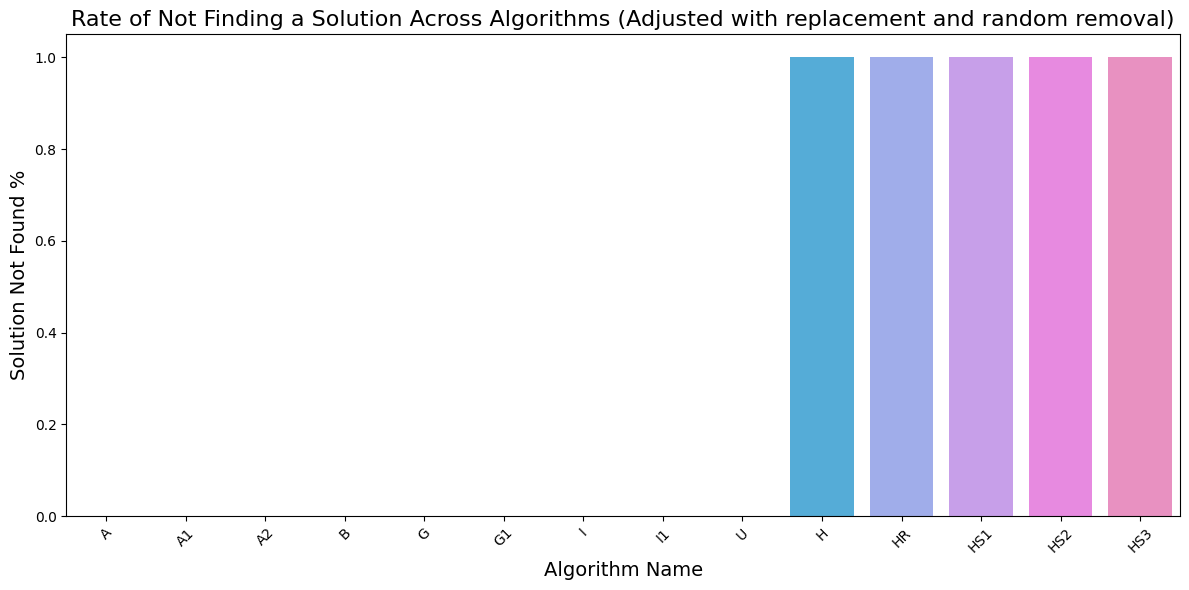

In [9]:
show_plots(data_adjusted_no_R, " (Adjusted with replacement and random removal)")

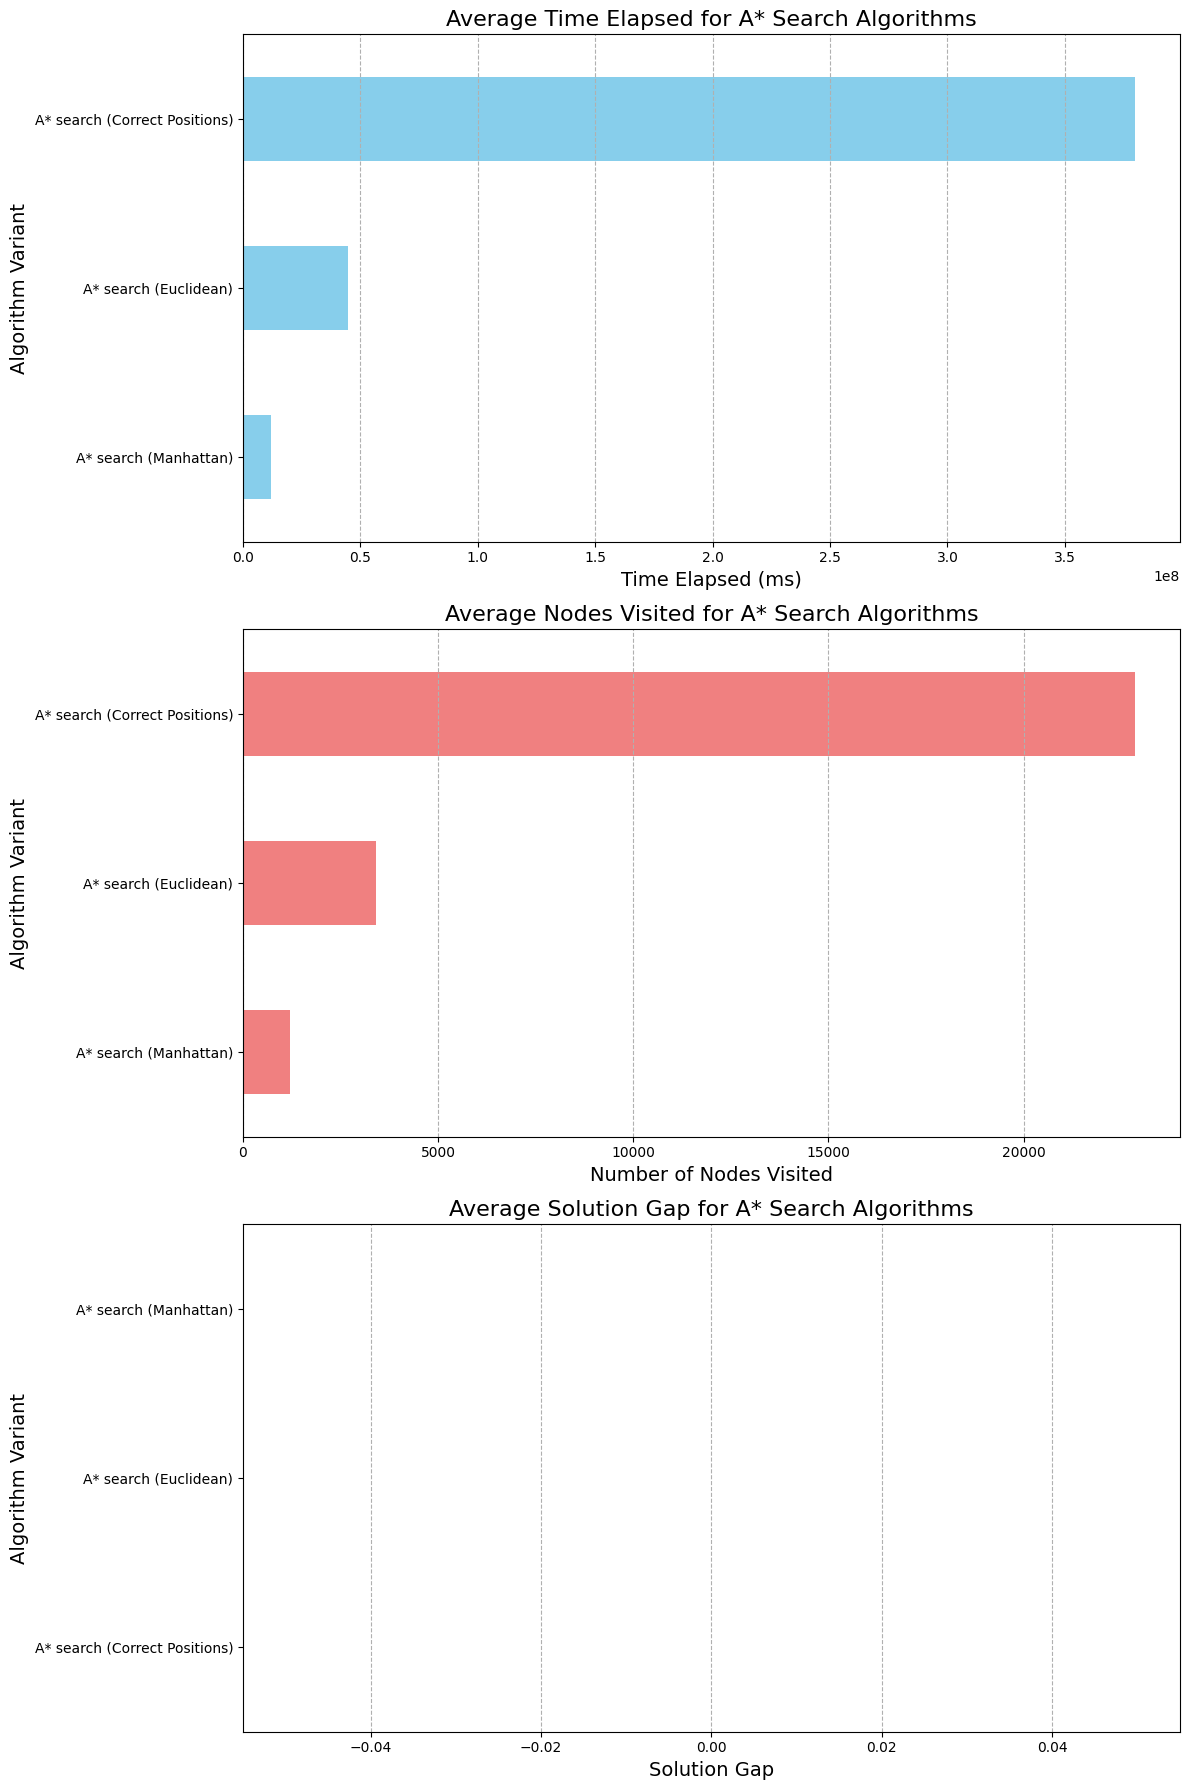

In [10]:
a_star_data = data[data['algorithmName'].isin(['A', 'A1', 'A2'])]

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Plot the average time elapsed for A* search algorithms
a_star_data.groupby("algorithmCategory")["timeElapsed"].mean().sort_values().plot(kind='barh', ax=ax[0],
                                                                                  color='skyblue')
ax[0].set_title('Average Time Elapsed for A* Search Algorithms', fontsize=16)
ax[0].set_xlabel('Time Elapsed (ms)', fontsize=14)
ax[0].set_ylabel('Algorithm Variant', fontsize=14)
ax[0].grid(axis='x', linestyle='--')

# Plot the average nodes visited for A* search algorithms
a_star_data.groupby("algorithmCategory")["nodesVisited"].mean().sort_values().plot(kind='barh', ax=ax[1],
                                                                                   color='lightcoral')
ax[1].set_title('Average Nodes Visited for A* Search Algorithms', fontsize=16)
ax[1].set_xlabel('Number of Nodes Visited', fontsize=14)
ax[1].set_ylabel('Algorithm Variant', fontsize=14)
ax[1].grid(axis='x', linestyle='--')

# Plot the average solution gap for A* search algorithms
a_star_data.groupby("algorithmCategory")["solutionGap"].mean().sort_values().plot(kind='barh', ax=ax[2],
                                                                                  color='lightgreen')
ax[2].set_title('Average Solution Gap for A* Search Algorithms', fontsize=16)
ax[2].set_xlabel('Solution Gap', fontsize=14)
ax[2].set_ylabel('Algorithm Variant', fontsize=14)
ax[2].grid(axis='x', linestyle='--')

plt.tight_layout()
plt.show()


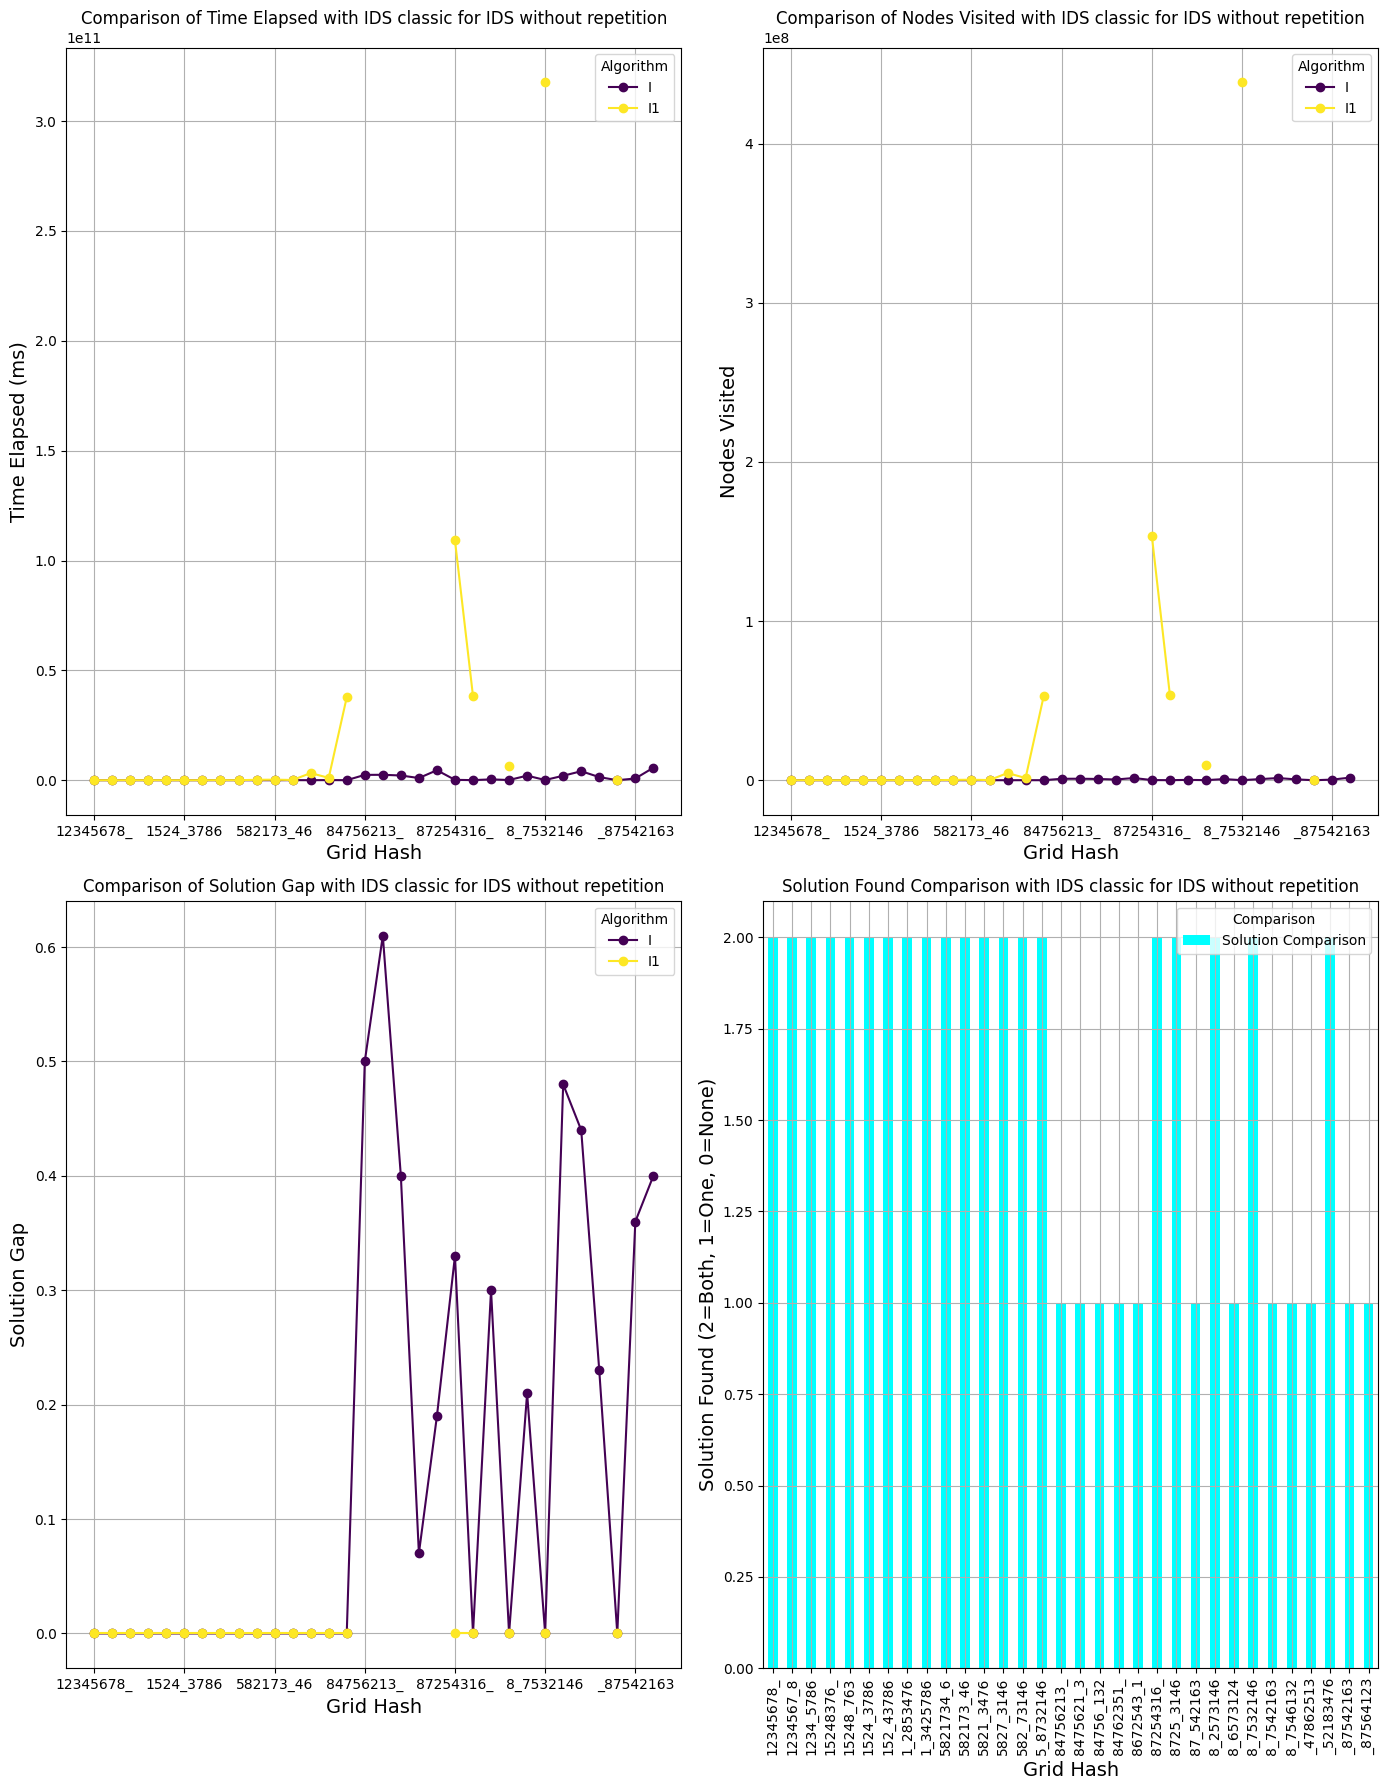

In [11]:
def compare_with_baseline(target_algorithm, data, baseline_algorithm='B'):
    filtered_data = data[data['algorithmName'].isin([baseline_algorithm, target_algorithm])].copy()

    # Convert solutionFound to an integer representation for plotting
    # 2: Both found the solution, 1: Only one found, 0: None found
    filtered_data['solutionComparison'] = filtered_data.groupby('gridHash')['solutionFound'].transform('sum').astype(
        int)

    # Pivot data
    pivot_time = filtered_data.pivot(index='gridHash', columns='algorithmName', values='timeElapsed')
    pivot_nodes = filtered_data.pivot(index='gridHash', columns='algorithmName', values='nodesVisited')
    pivot_gap = filtered_data.pivot(index='gridHash', columns='algorithmName', values='solutionGap')

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 18))

    # Line graph for time elapsed
    pivot_time.plot(ax=ax[0][0], marker='o', colormap='viridis')
    ax[0][0].set_title(
        f'Comparison of Time Elapsed with {algorithm_categories[baseline_algorithm]} for {algorithm_categories[target_algorithm]}',
        fontsize=12)
    ax[0][0].set_xlabel('Grid Hash', fontsize=14)
    ax[0][0].set_ylabel('Time Elapsed (ms)', fontsize=14)
    ax[0][0].grid(True)
    ax[0][0].legend(title='Algorithm')

    # Line graph for nodes visited
    pivot_nodes.plot(ax=ax[0][1], marker='o', colormap='viridis')
    ax[0][1].set_title(
        f'Comparison of Nodes Visited with {algorithm_categories[baseline_algorithm]} for {algorithm_categories[target_algorithm]}',
        fontsize=12)
    ax[0][1].set_xlabel('Grid Hash', fontsize=14)
    ax[0][1].set_ylabel('Nodes Visited', fontsize=14)
    ax[0][1].grid(True)
    ax[0][1].legend(title='Algorithm')

    # Line graph for solution gap
    pivot_gap.plot(ax=ax[1][0], marker='o', colormap='viridis')
    ax[1][0].set_title(
        f'Comparison of Solution Gap with {algorithm_categories[baseline_algorithm]} for {algorithm_categories[target_algorithm]}',
        fontsize=12)
    ax[1][0].set_xlabel('Grid Hash', fontsize=14)
    ax[1][0].set_ylabel('Solution Gap', fontsize=14)
    ax[1][0].grid(True)
    ax[1][0].legend(title='Algorithm')

    # Bar plot for solution comparison
    filtered_data.groupby('gridHash')['solutionComparison'].mean().plot(kind='bar', ax=ax[1][1], color='cyan')
    ax[1][1].set_title(
        f'Solution Found Comparison with {algorithm_categories[baseline_algorithm]} for {algorithm_categories[target_algorithm]}',
        fontsize=12)
    ax[1][1].set_xlabel('Grid Hash', fontsize=14)
    ax[1][1].set_ylabel('Solution Found (2=Both, 1=One, 0=None)', fontsize=14)
    ax[1][1].grid(True)
    ax[1][1].legend(["Solution Comparison"], title='Comparison')

    plt.tight_layout()
    plt.show()

compare_with_baseline('I', data, 'I1')


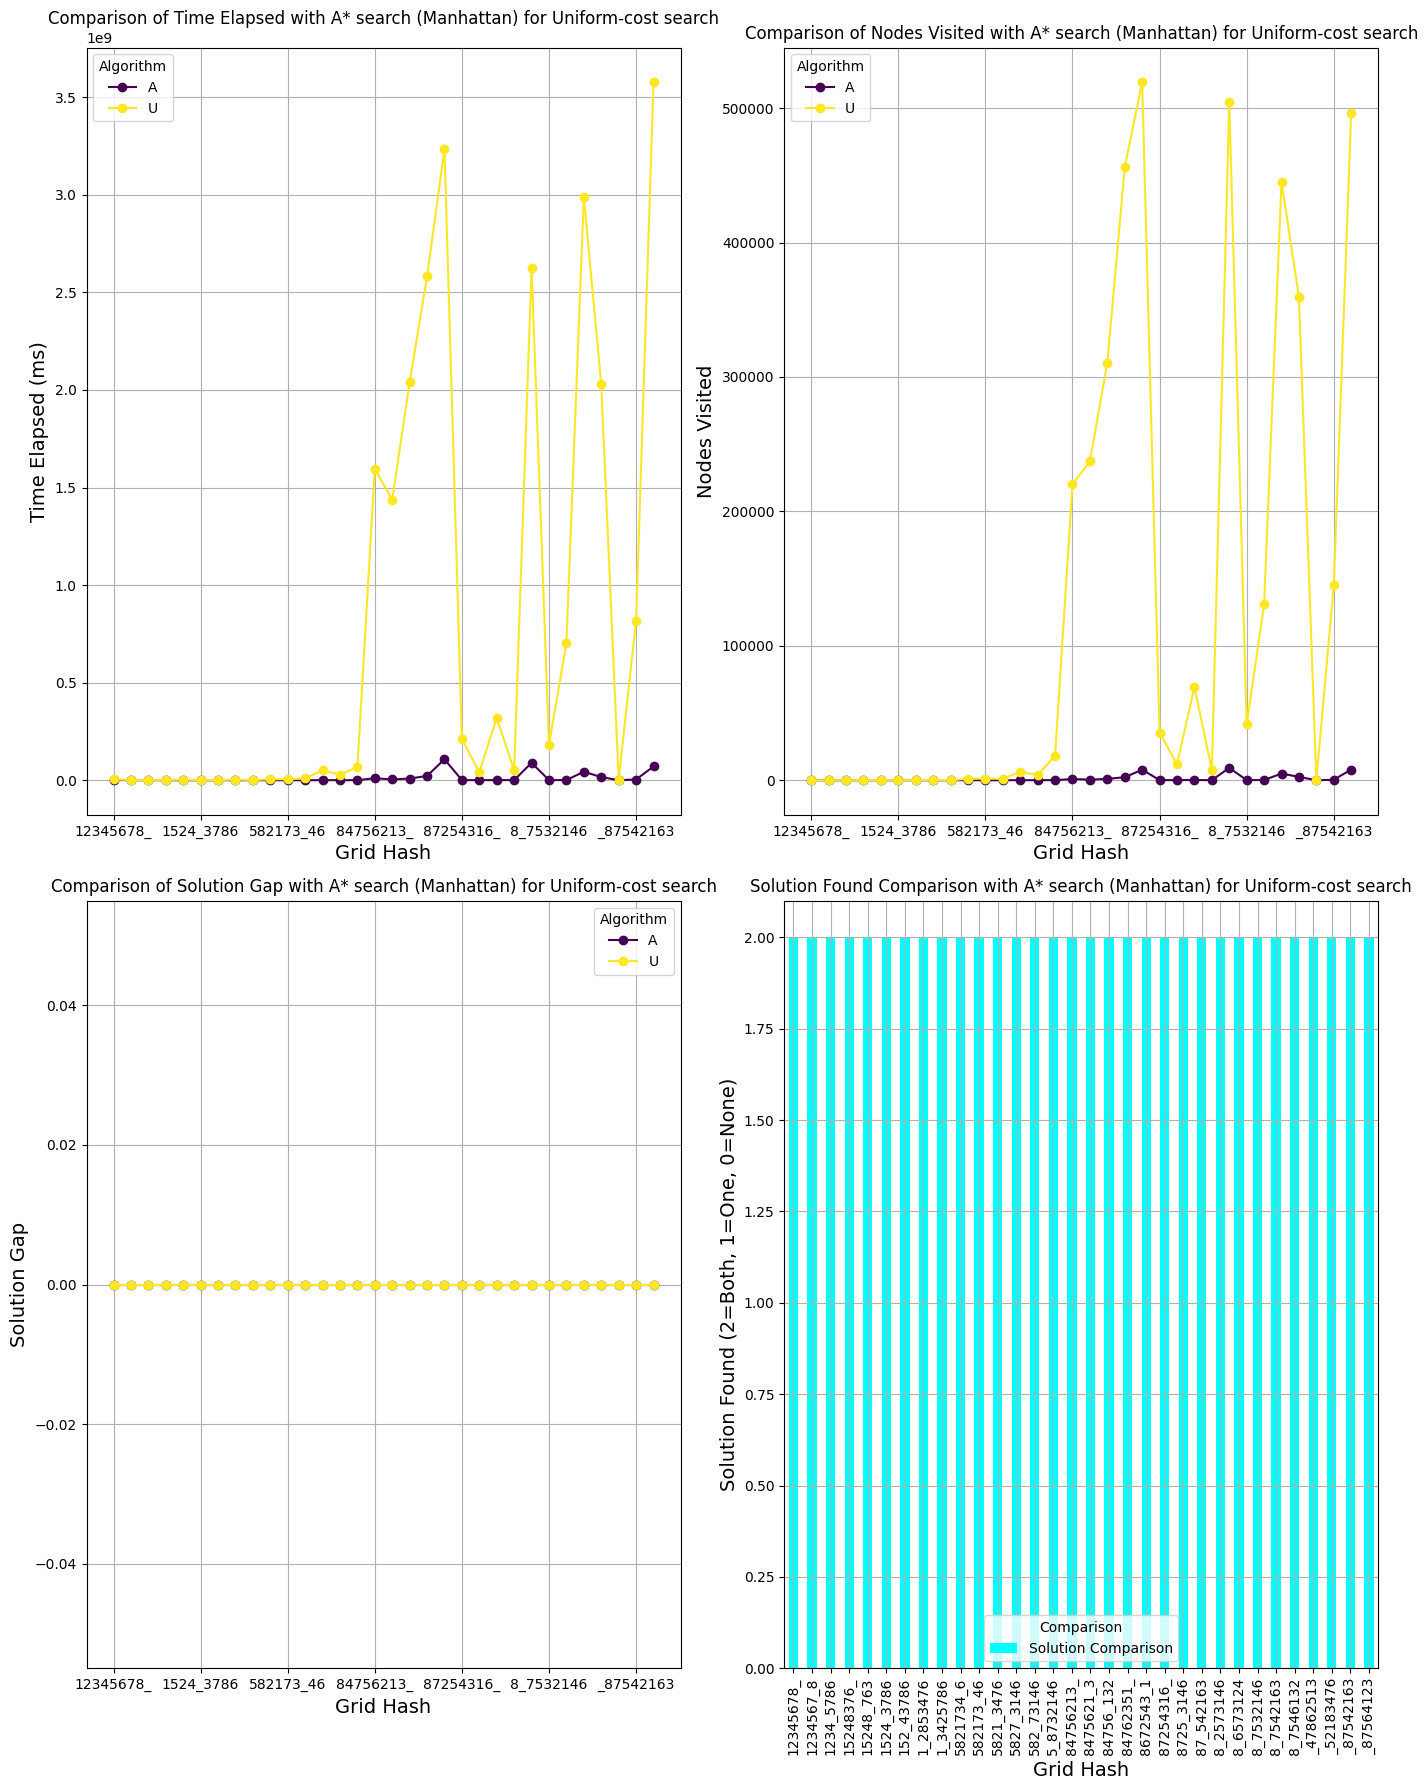

In [17]:
compare_with_baseline('U', data, 'A')

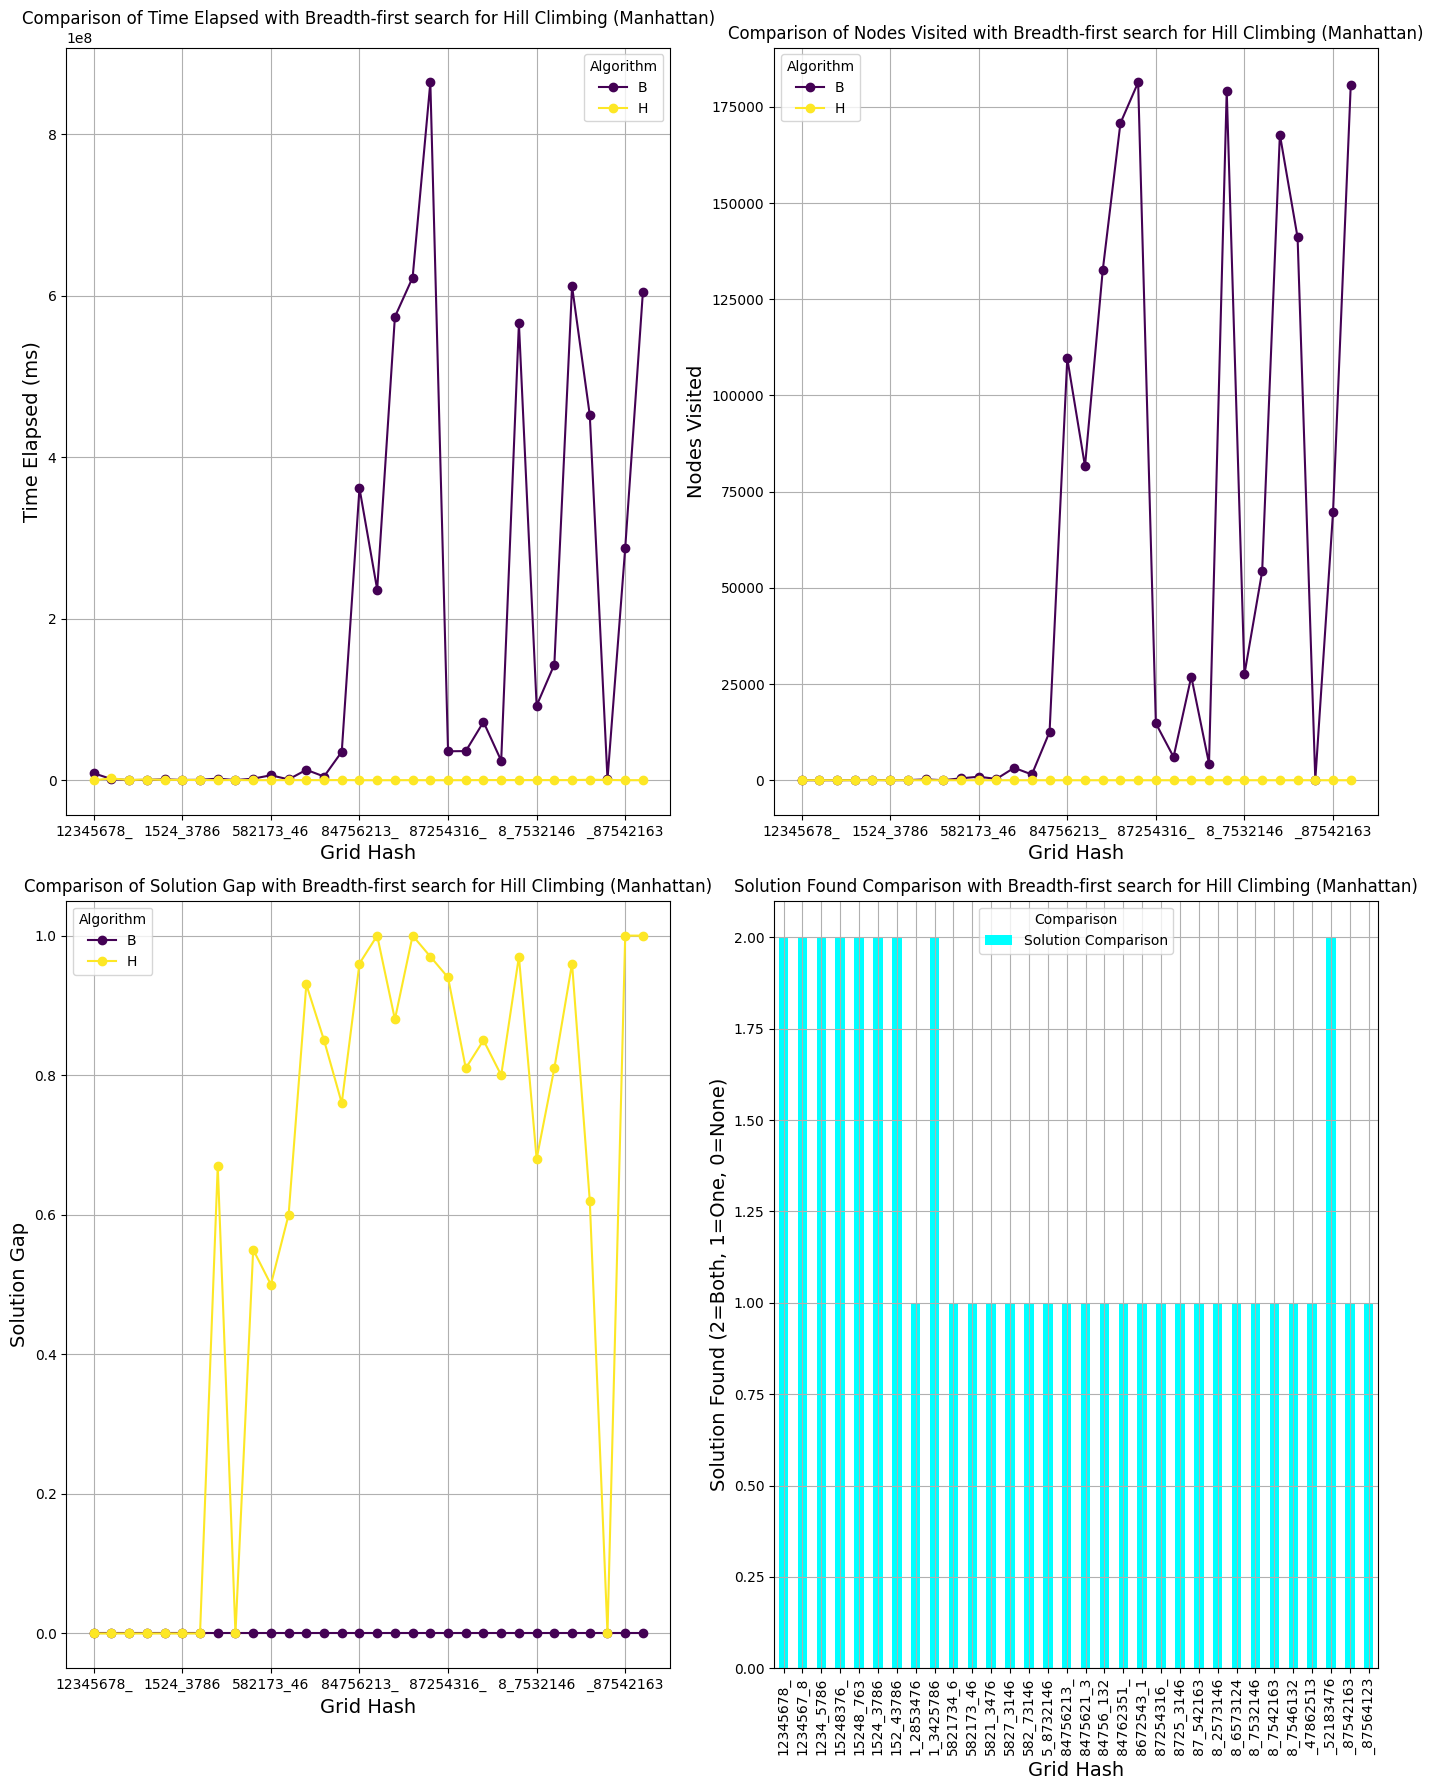

In [12]:
compare_with_baseline('H', data)

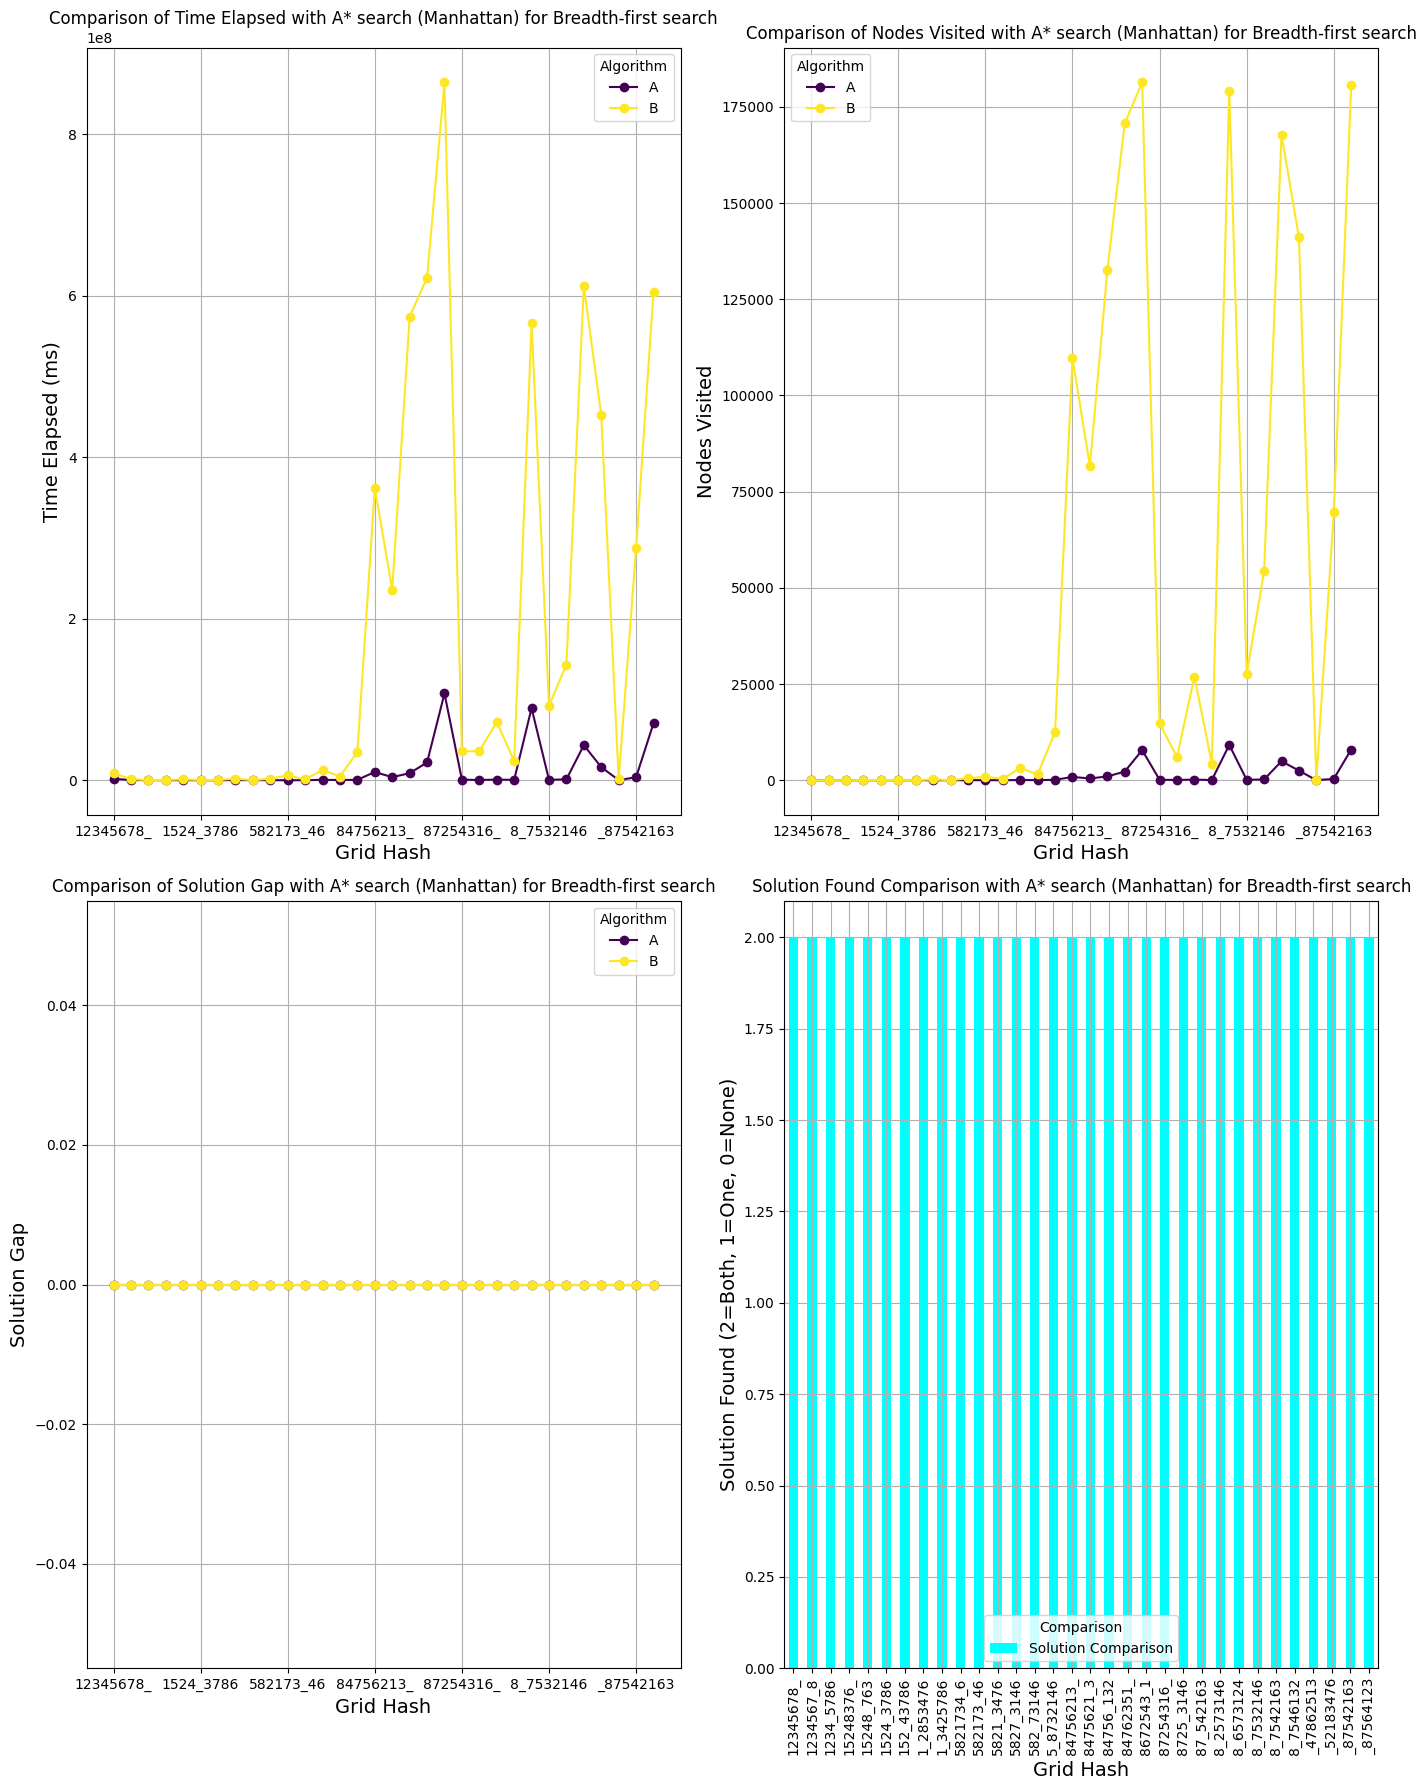

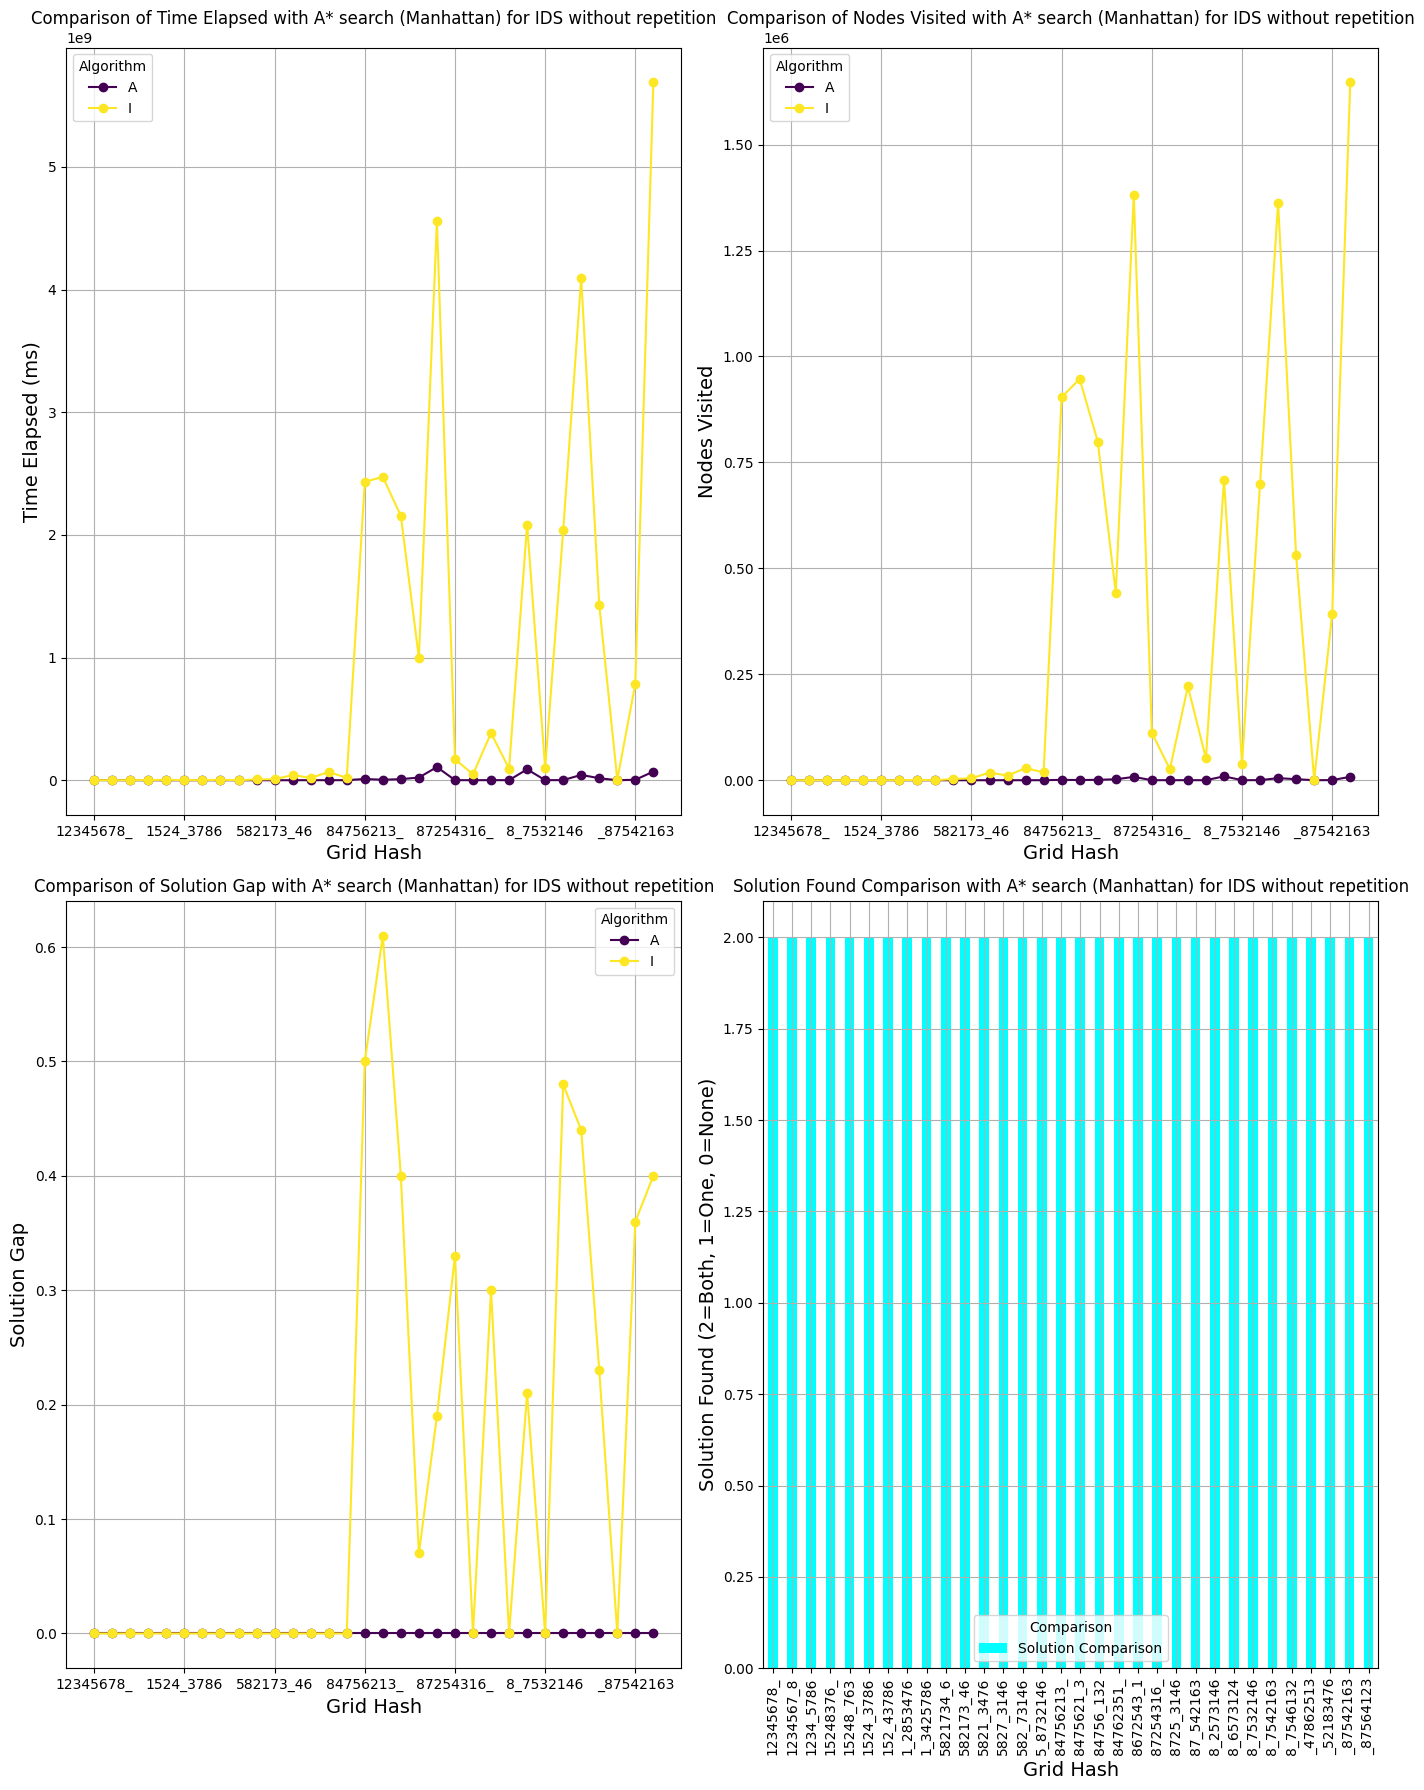

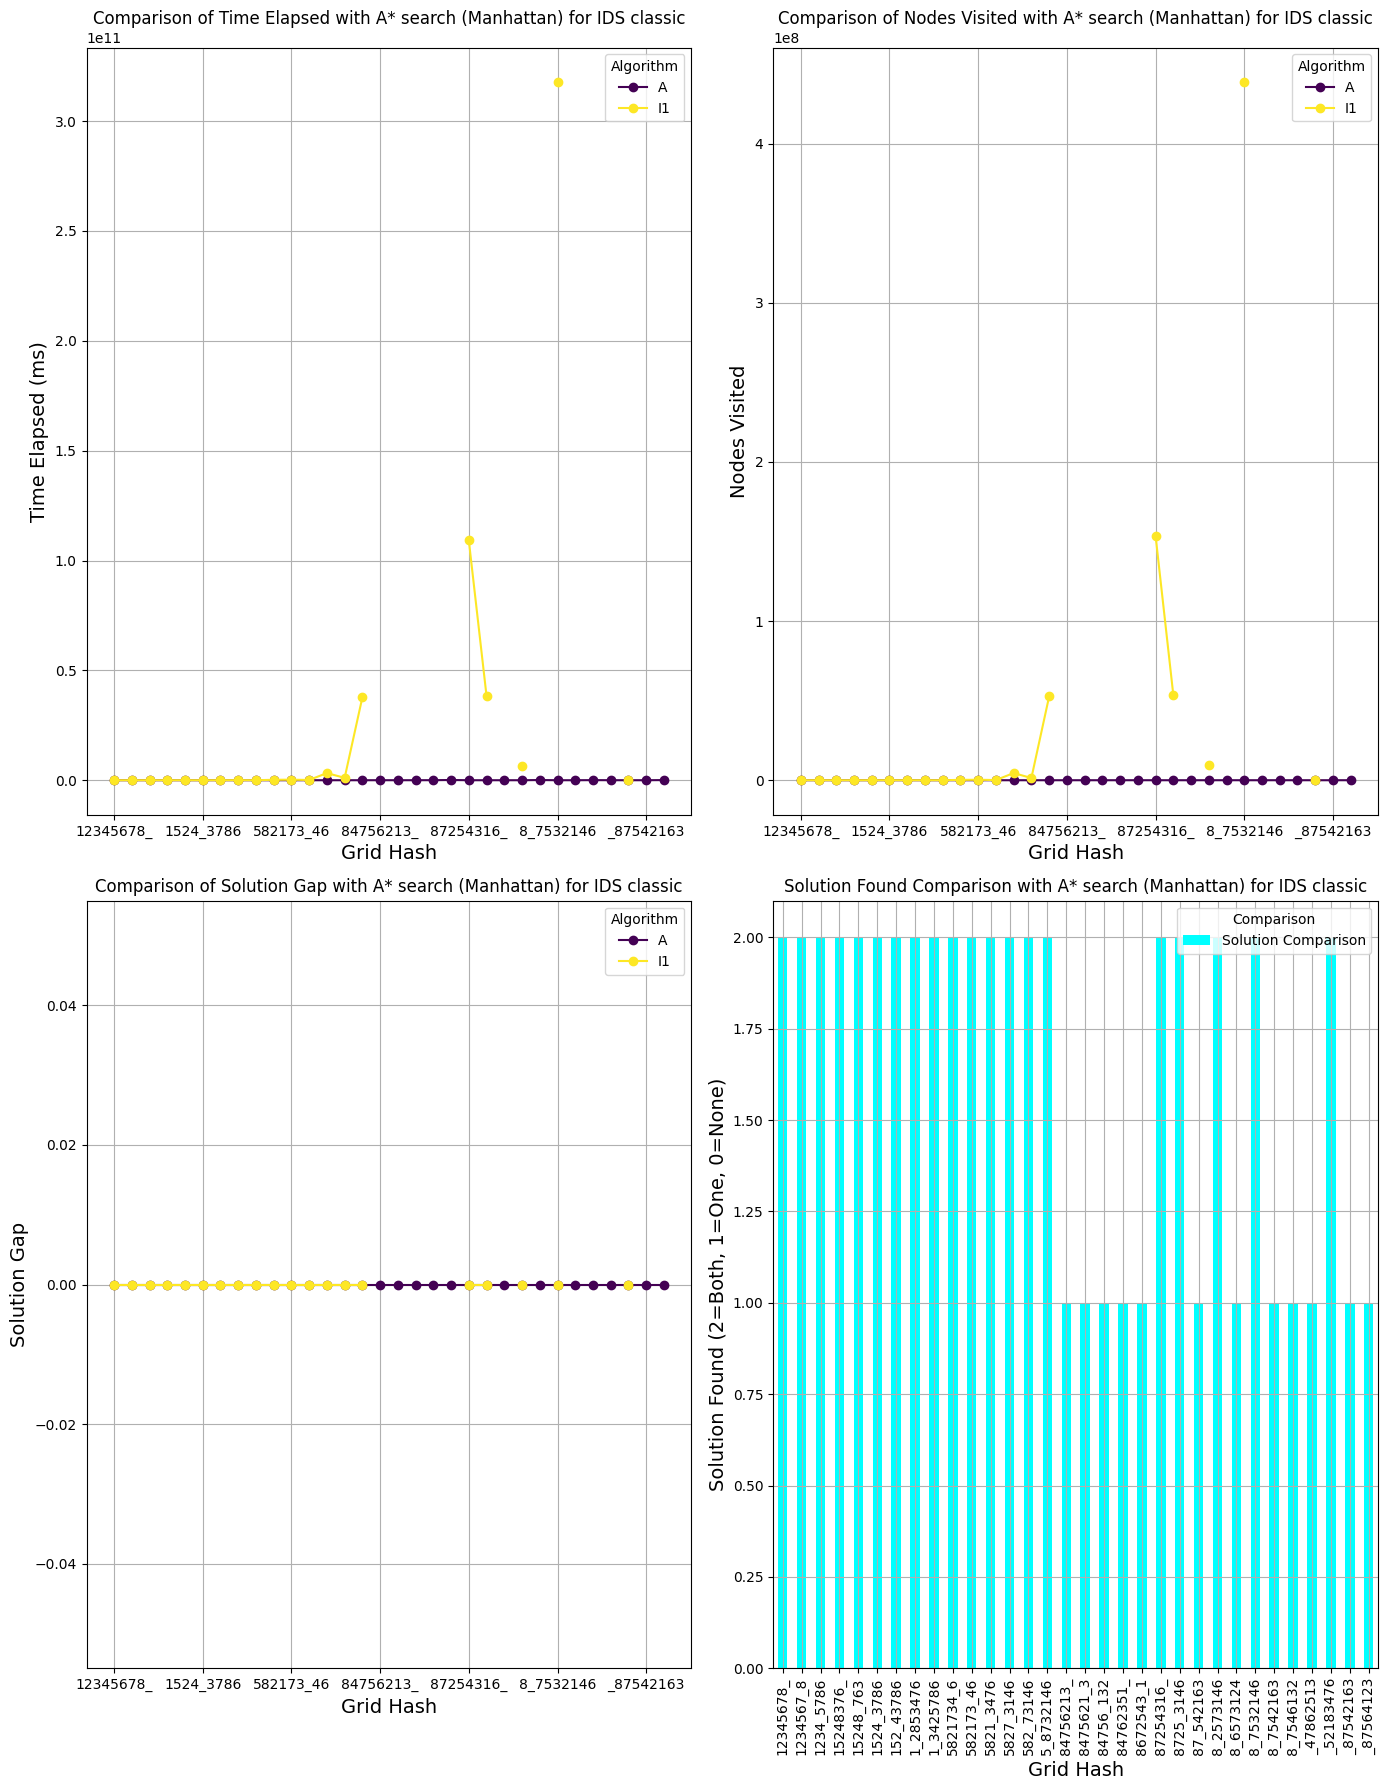

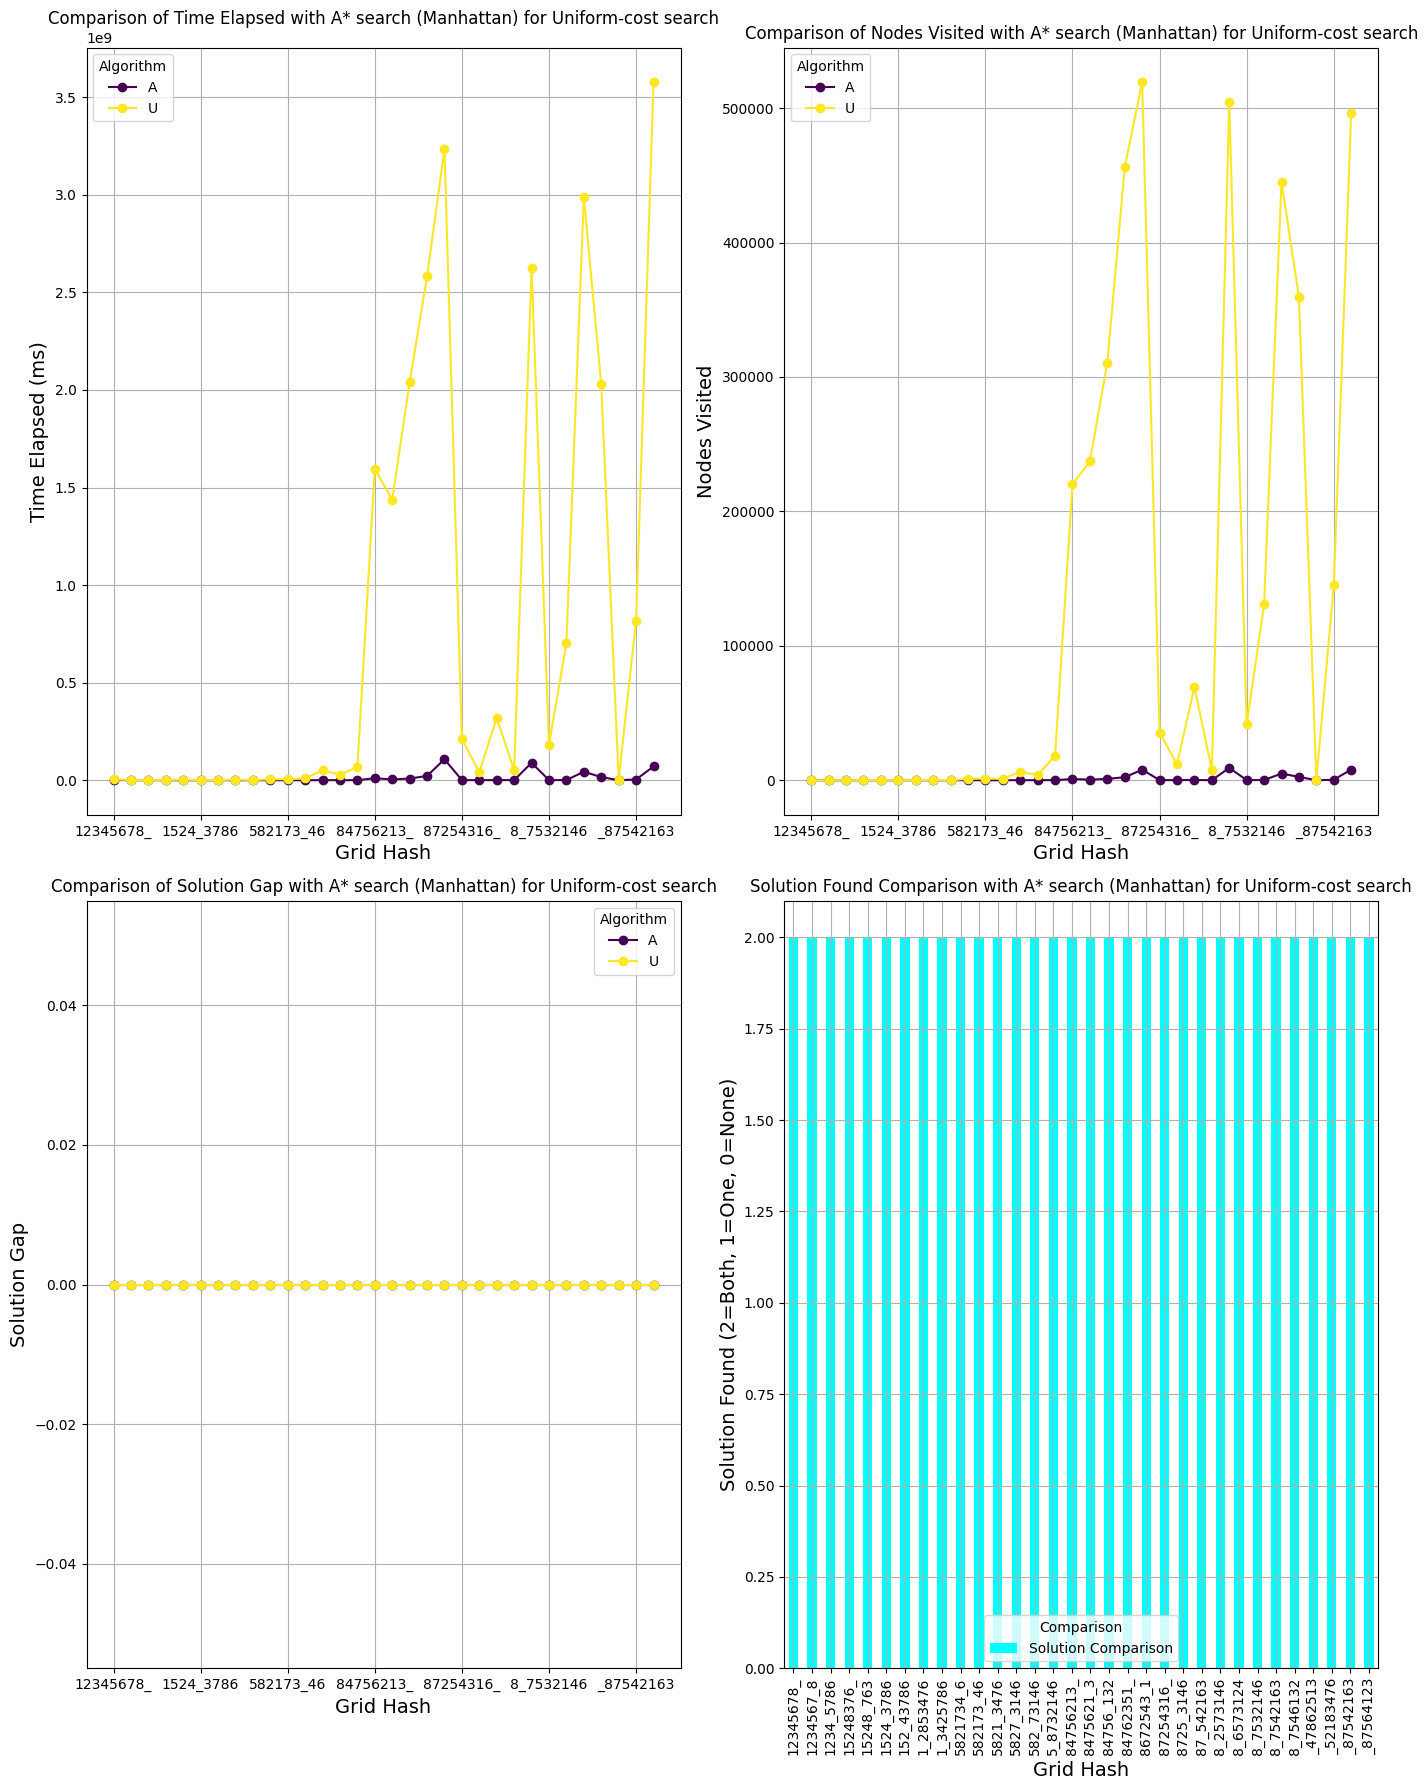

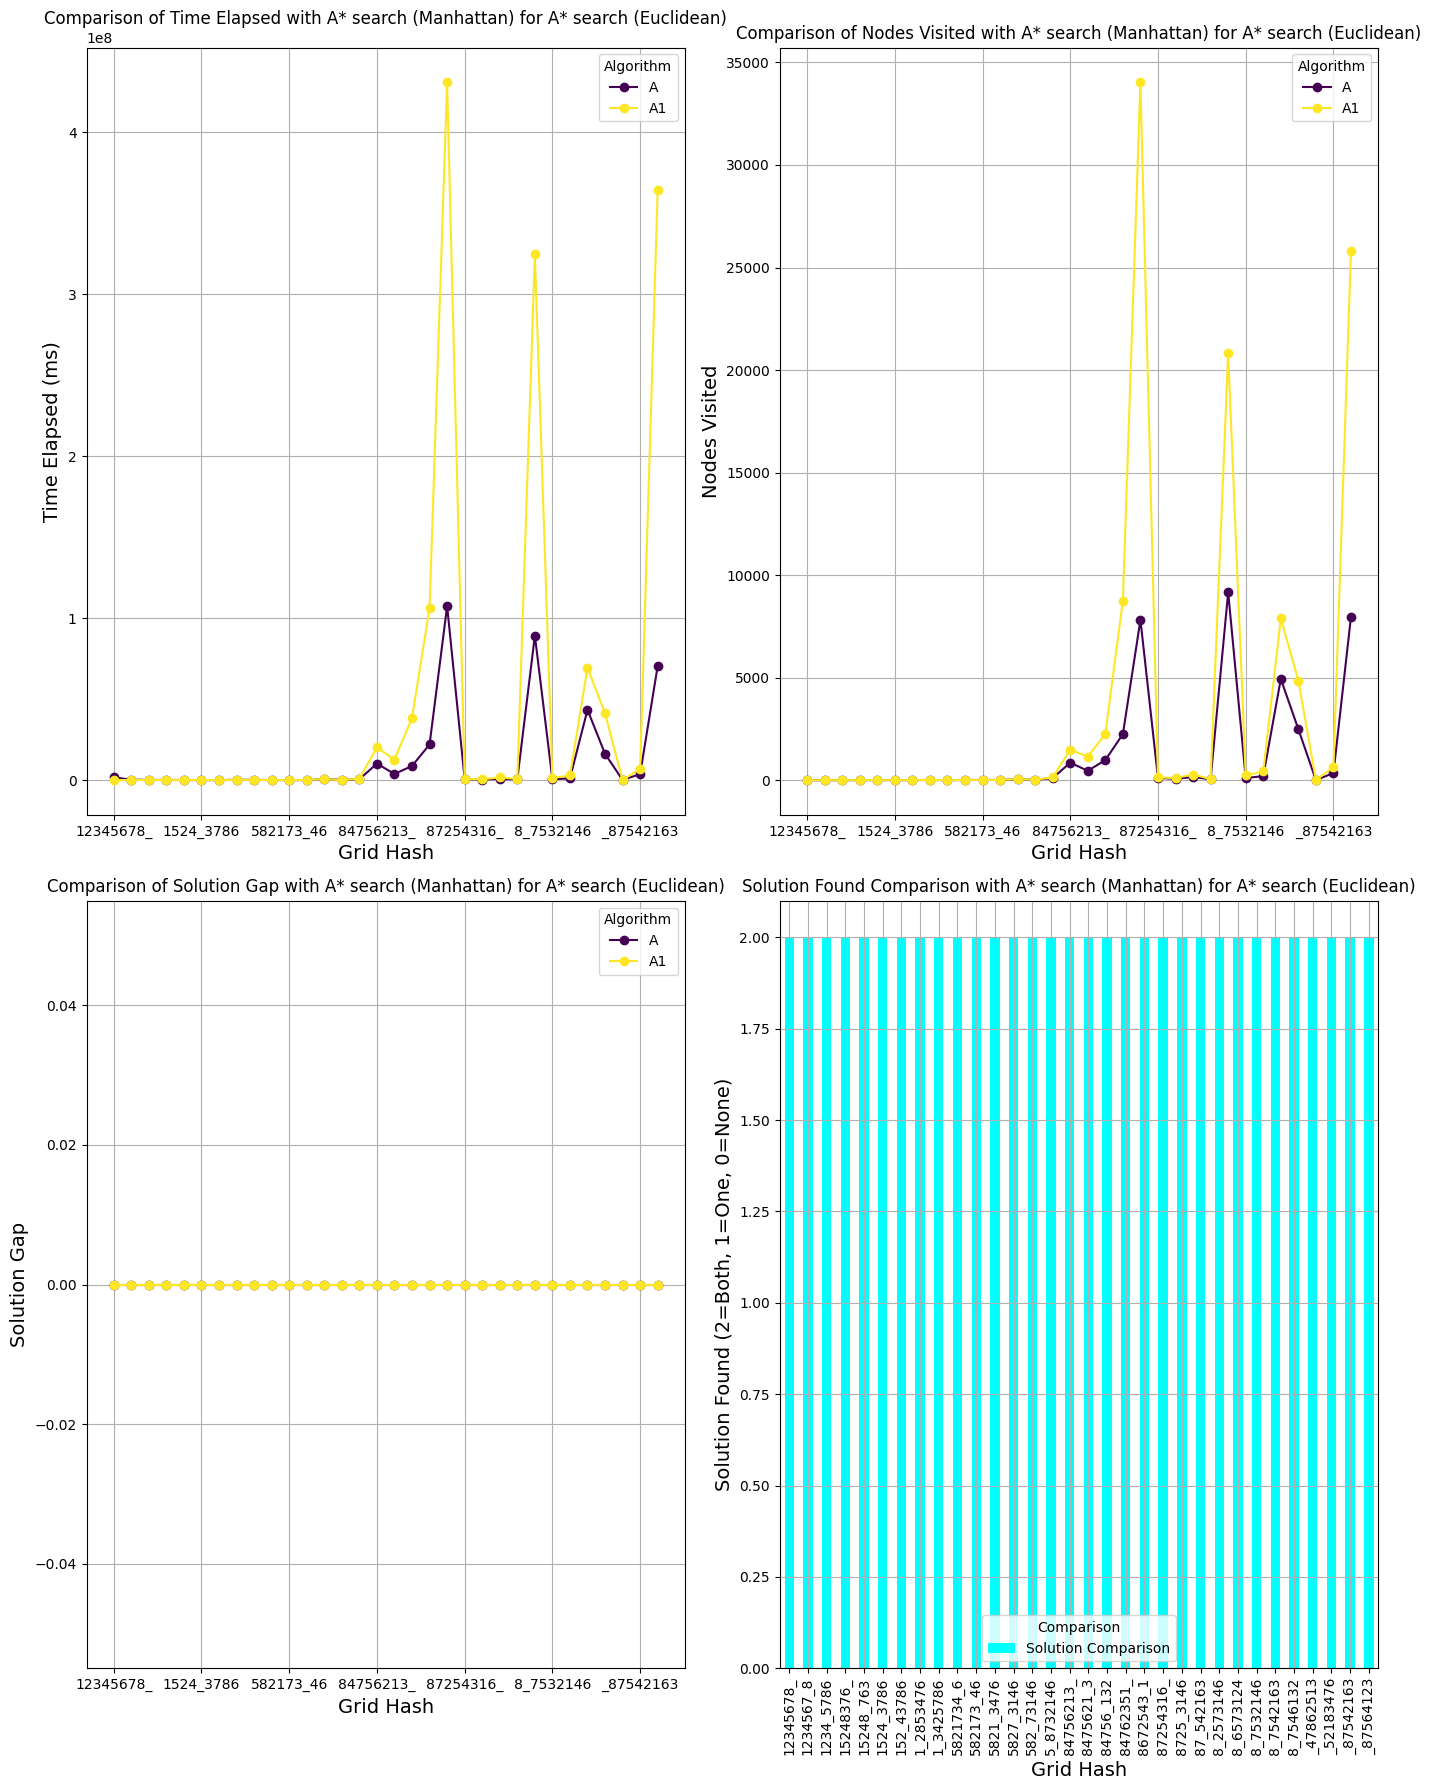

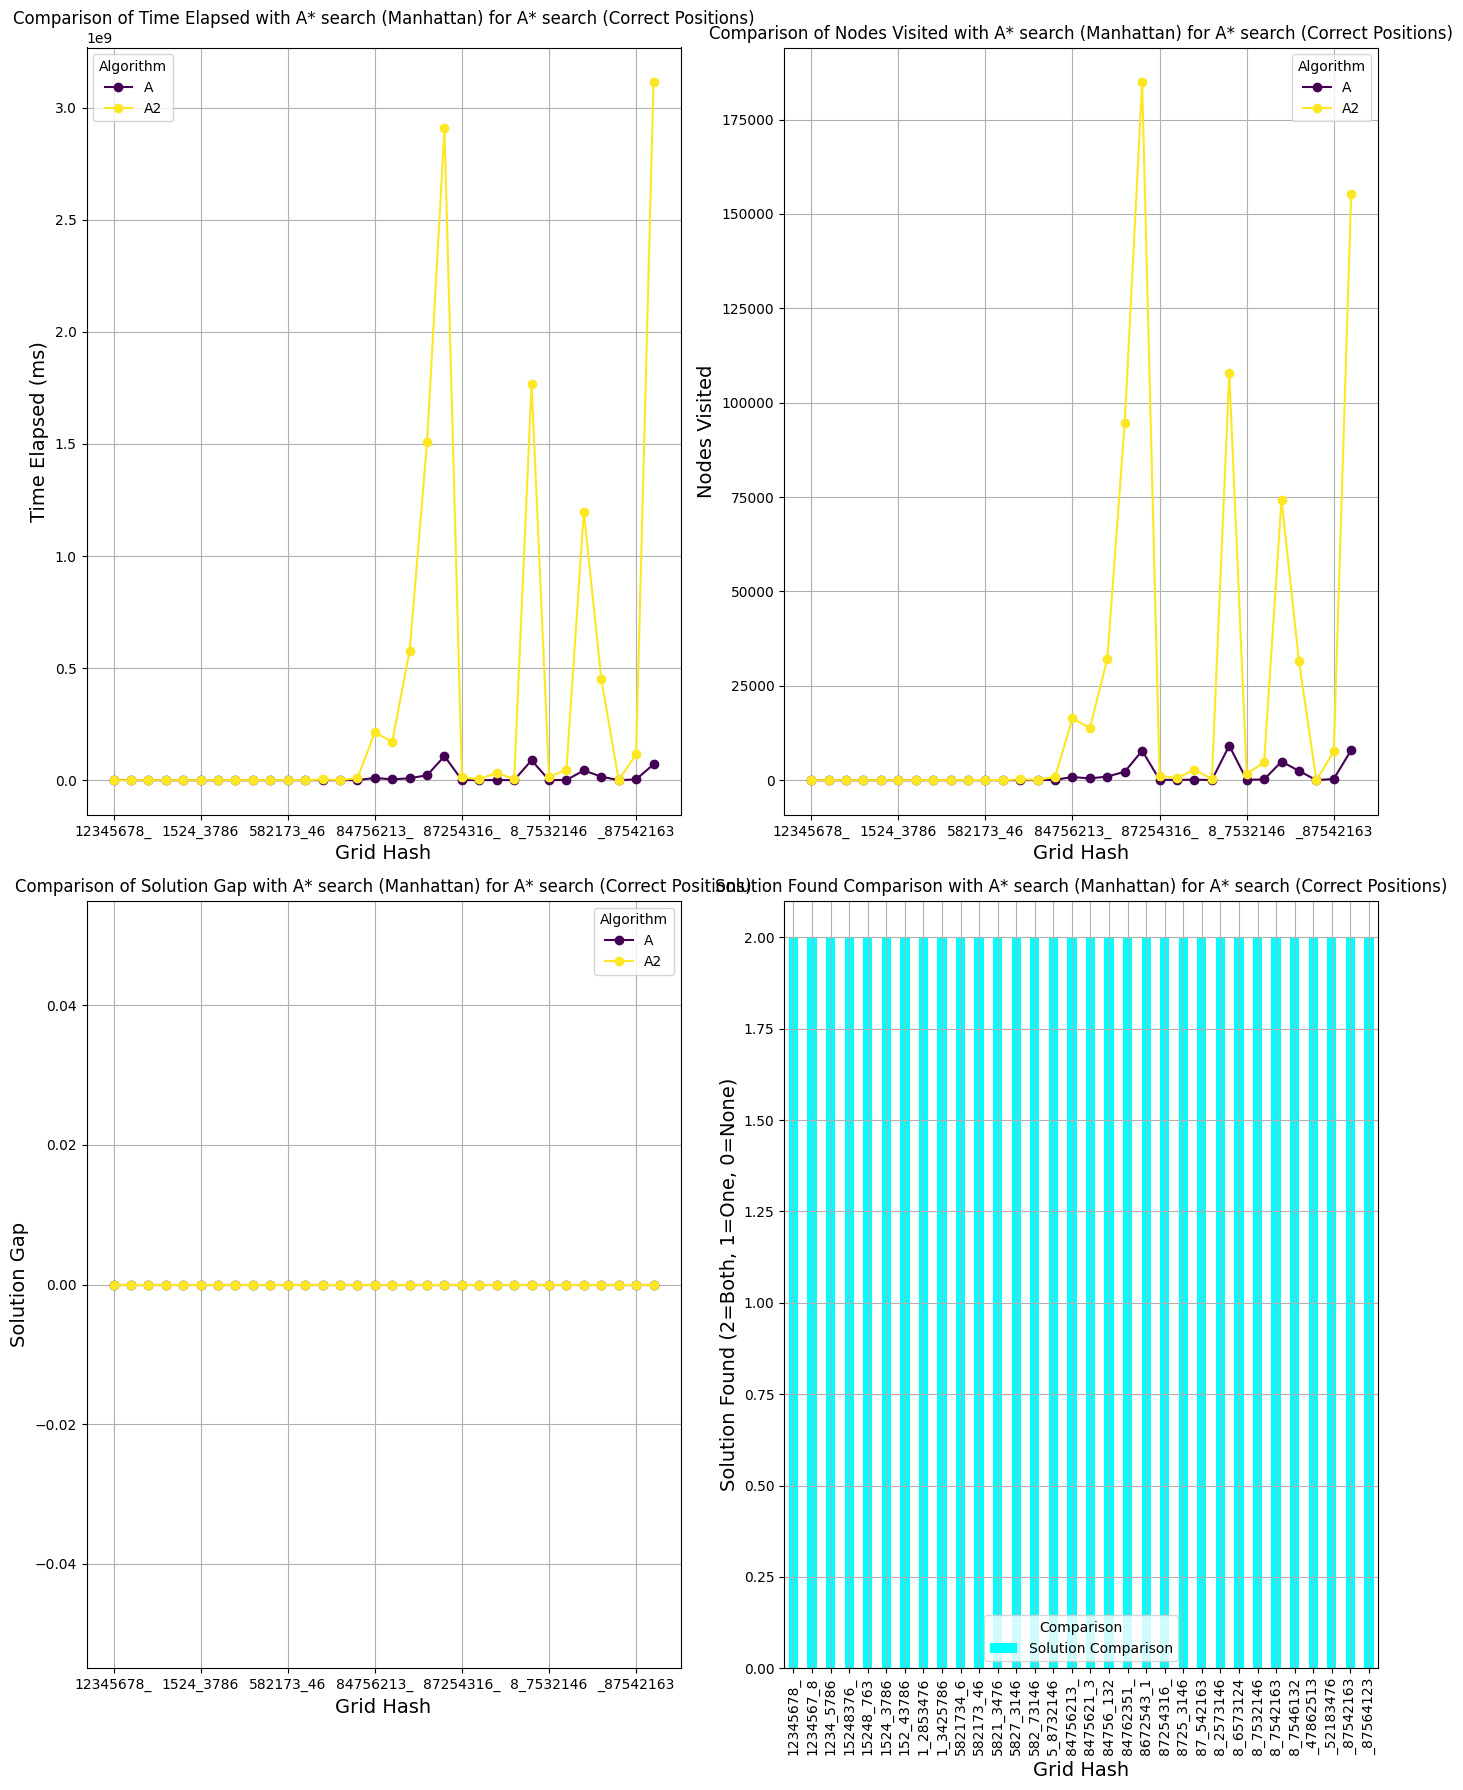

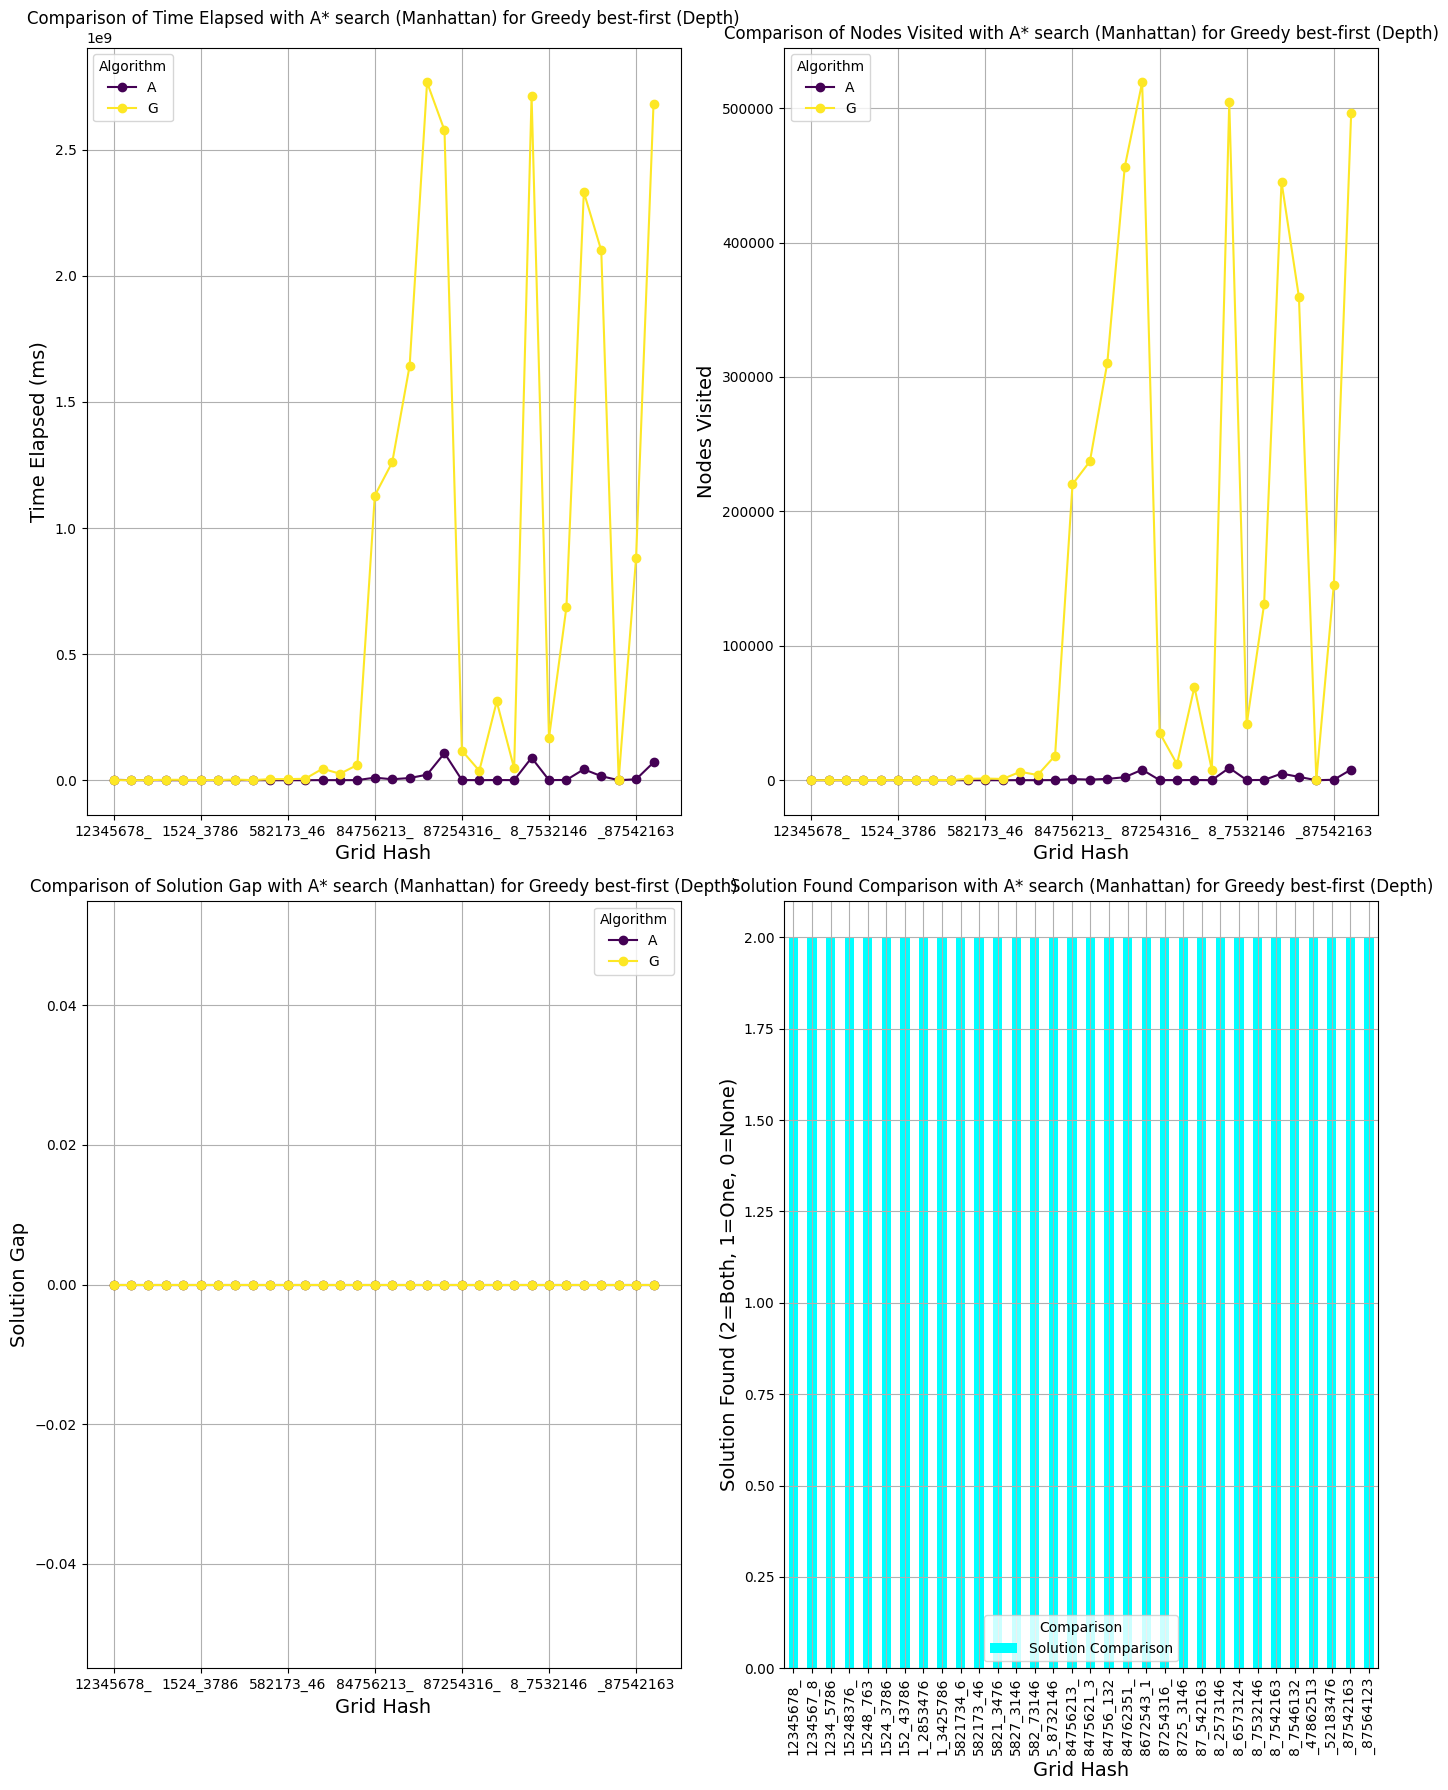

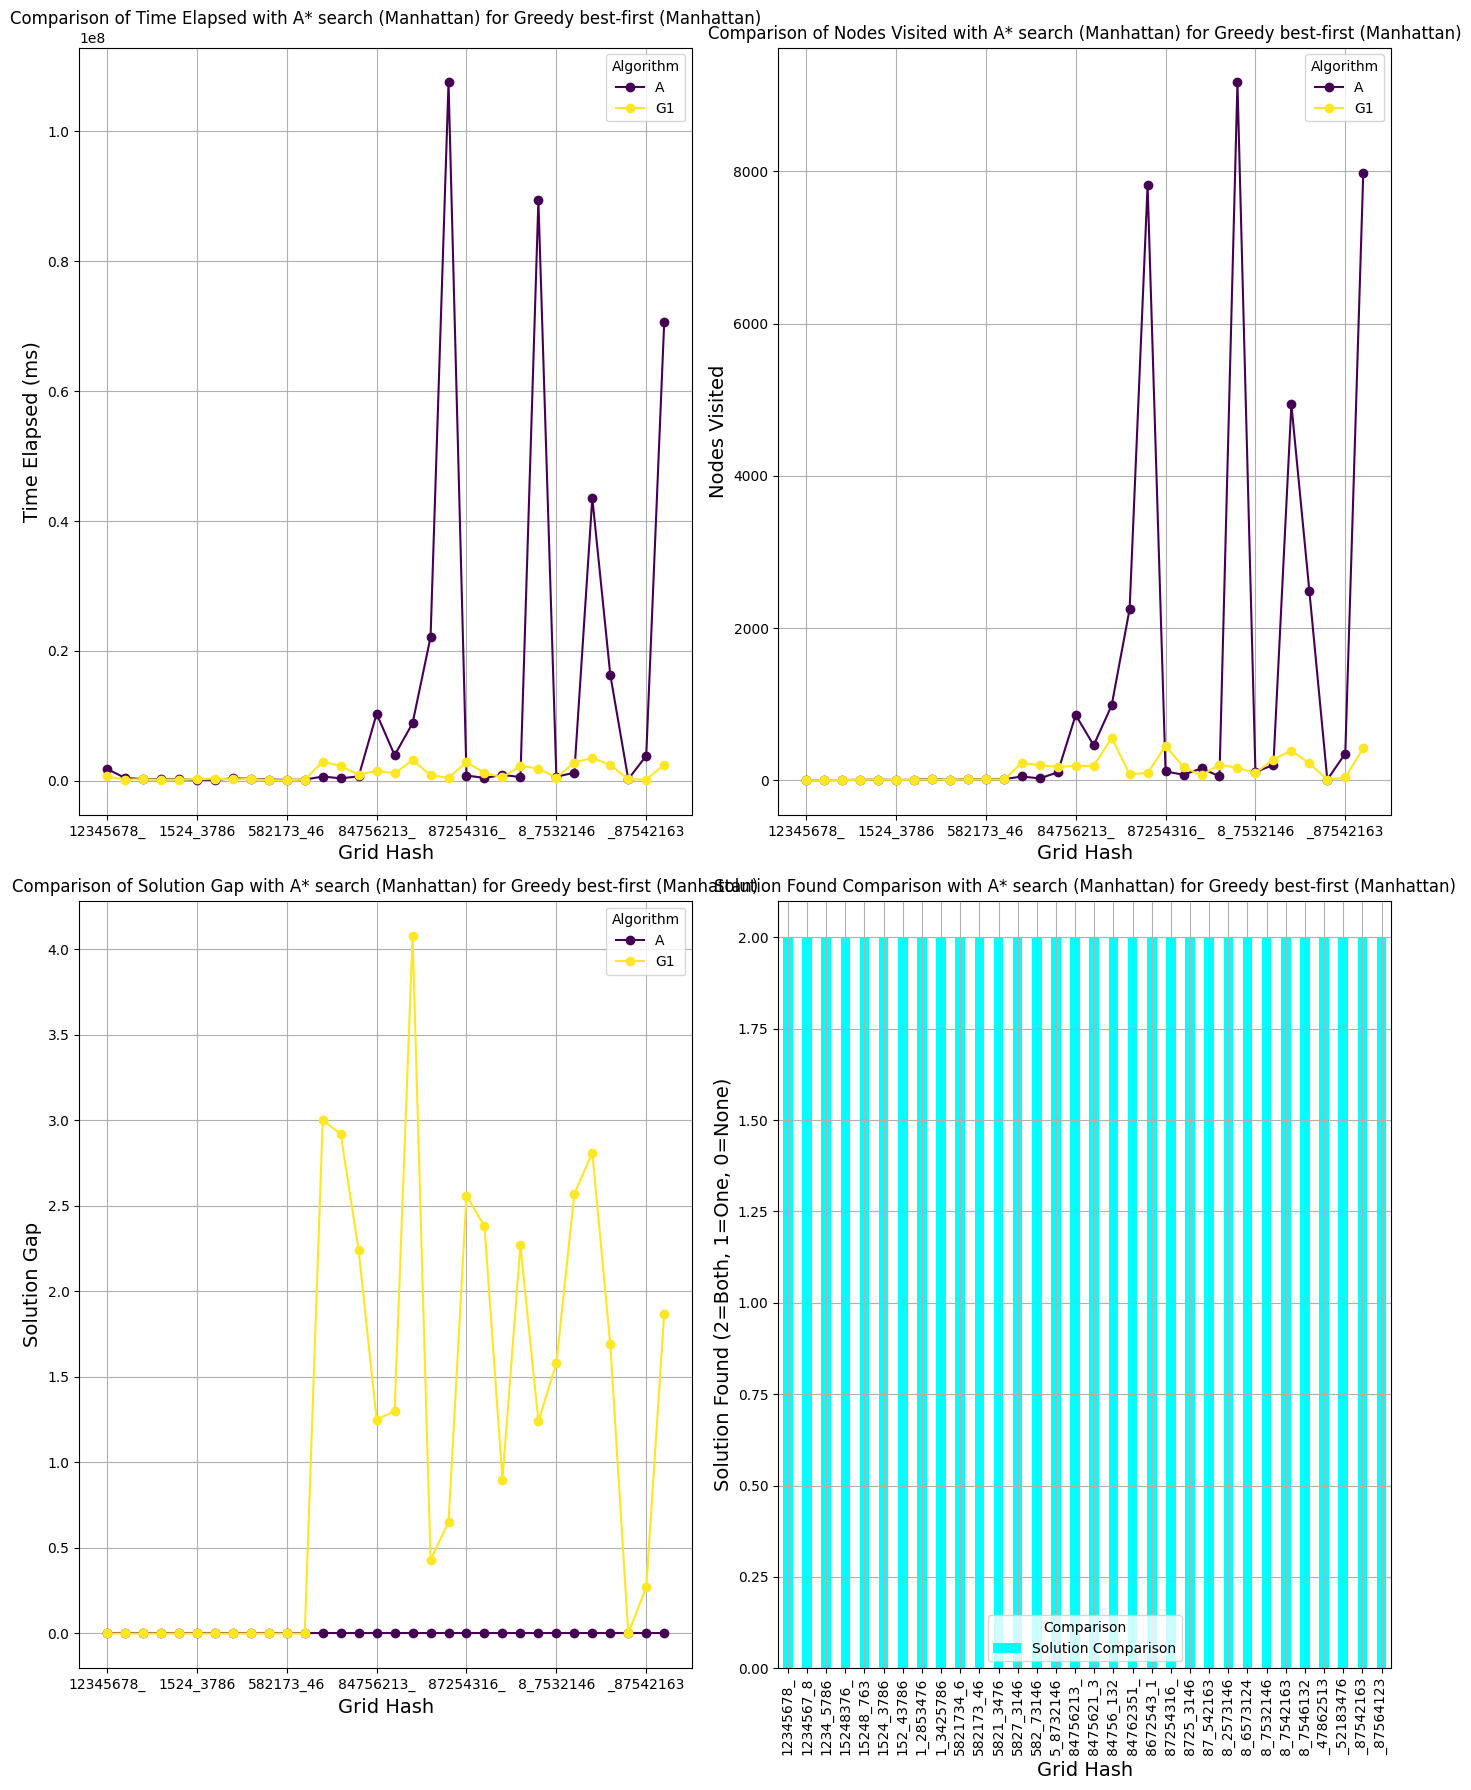

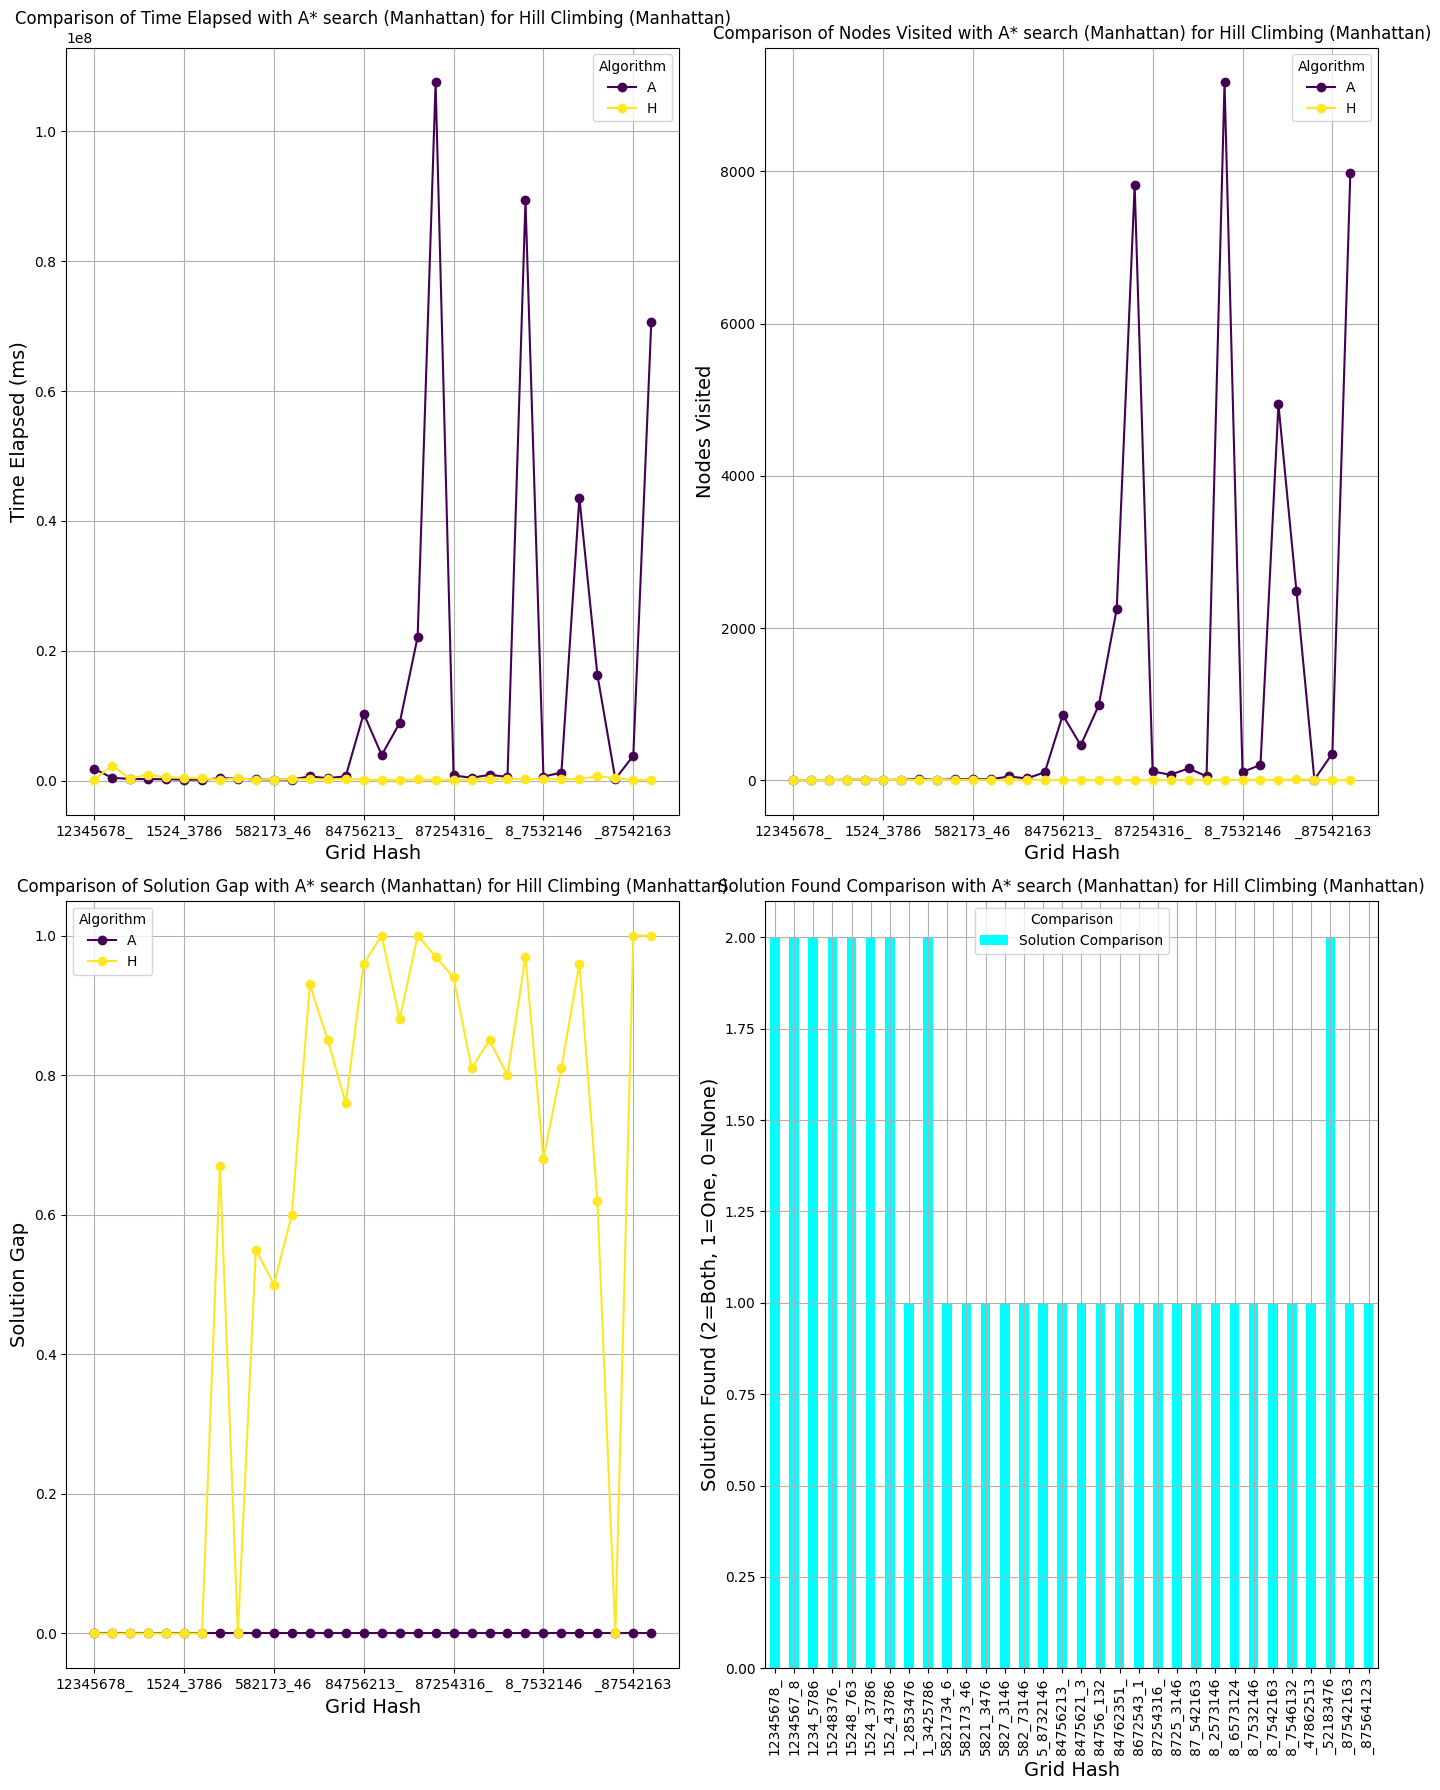

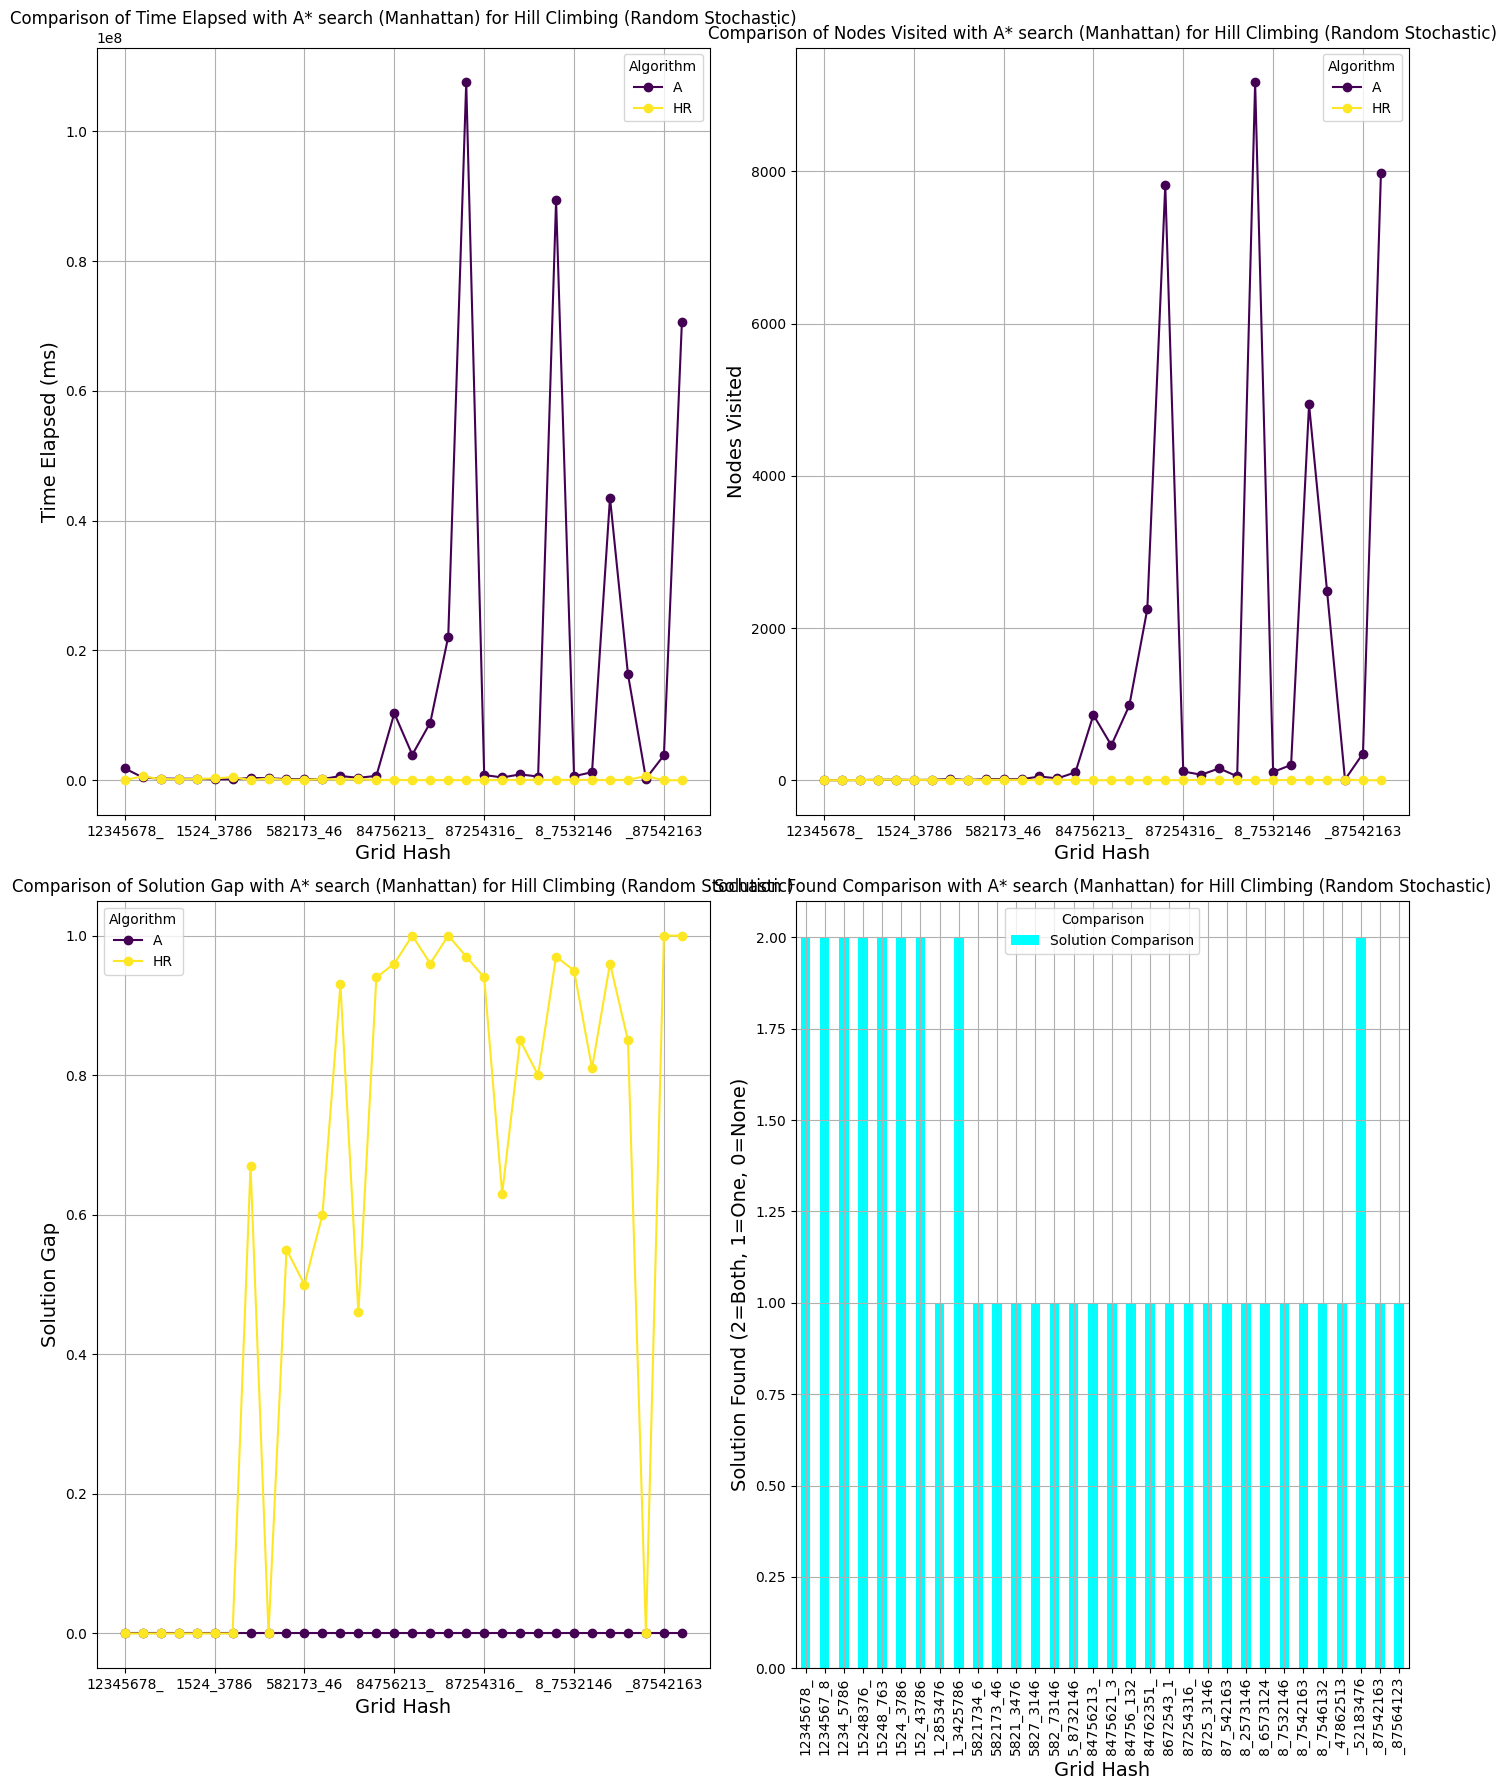

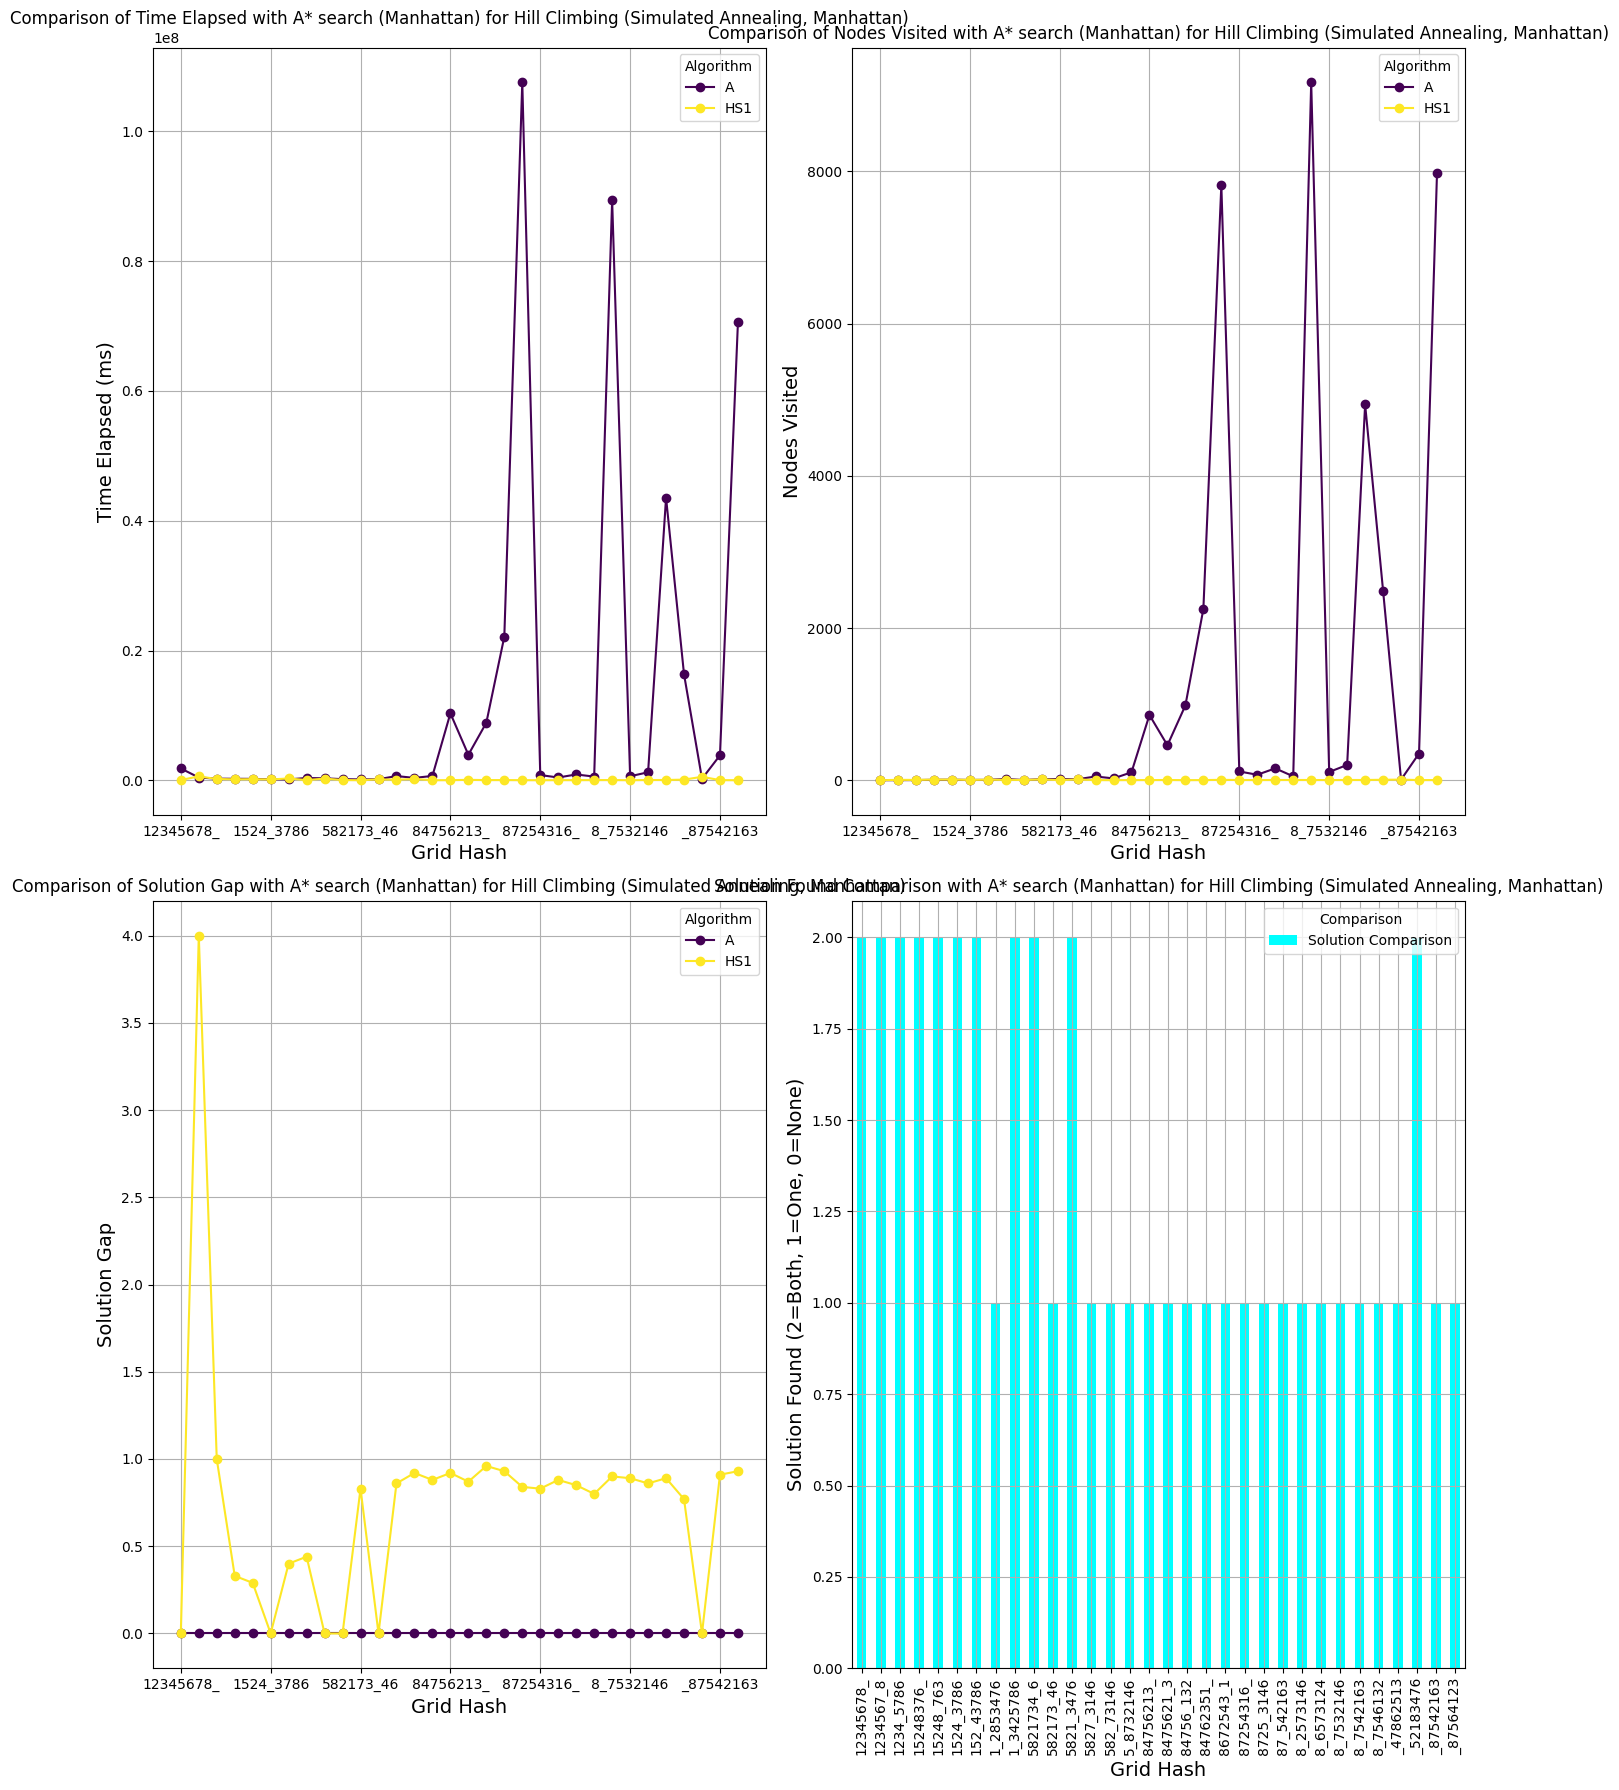

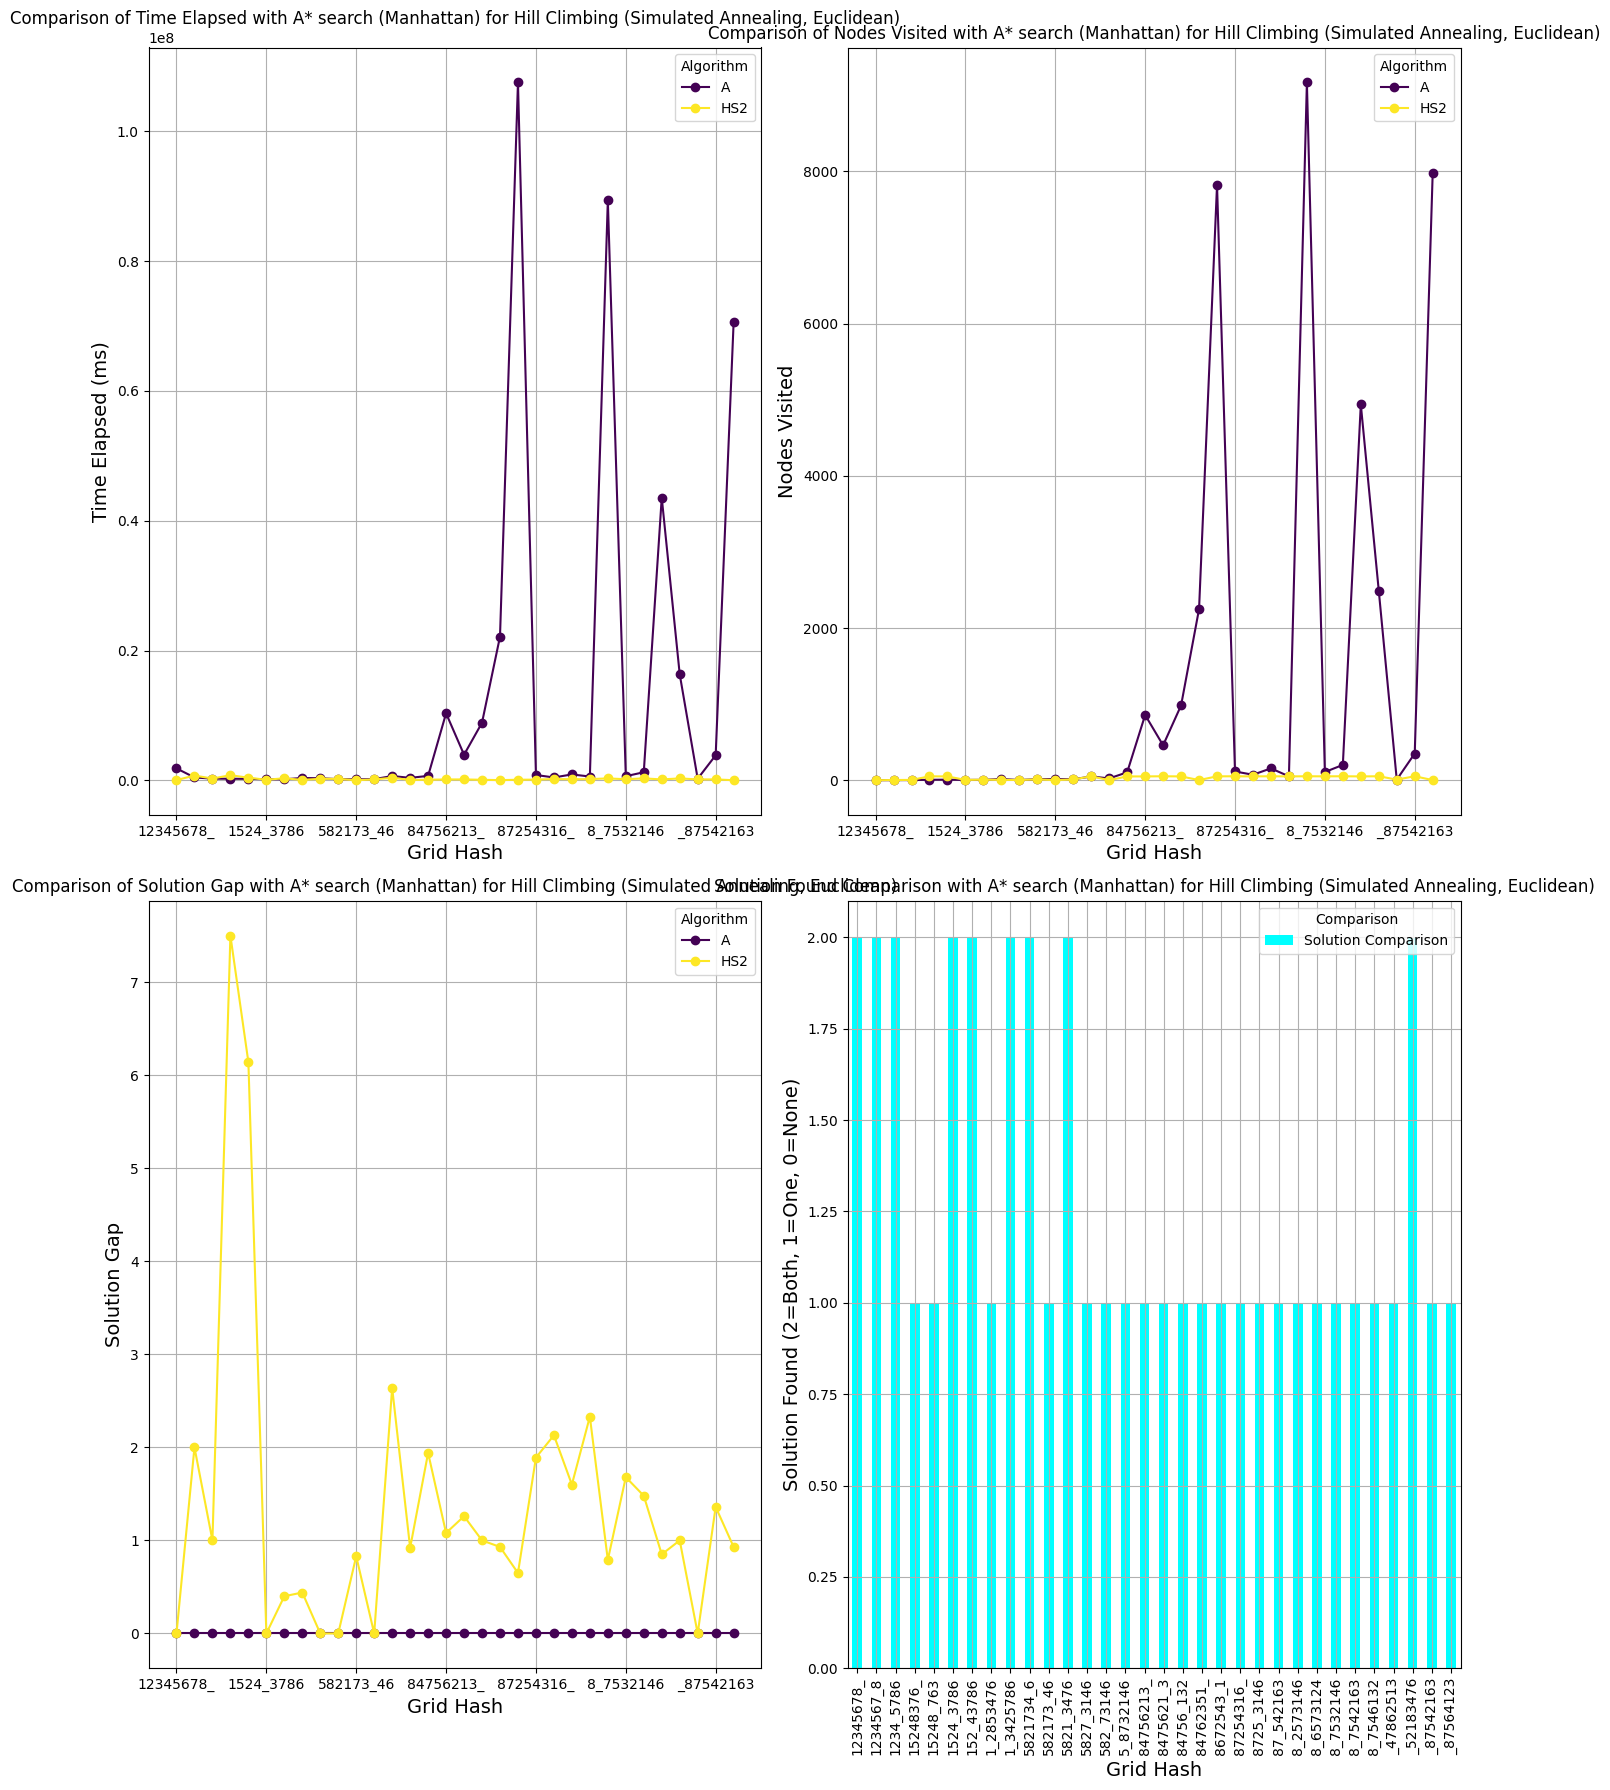

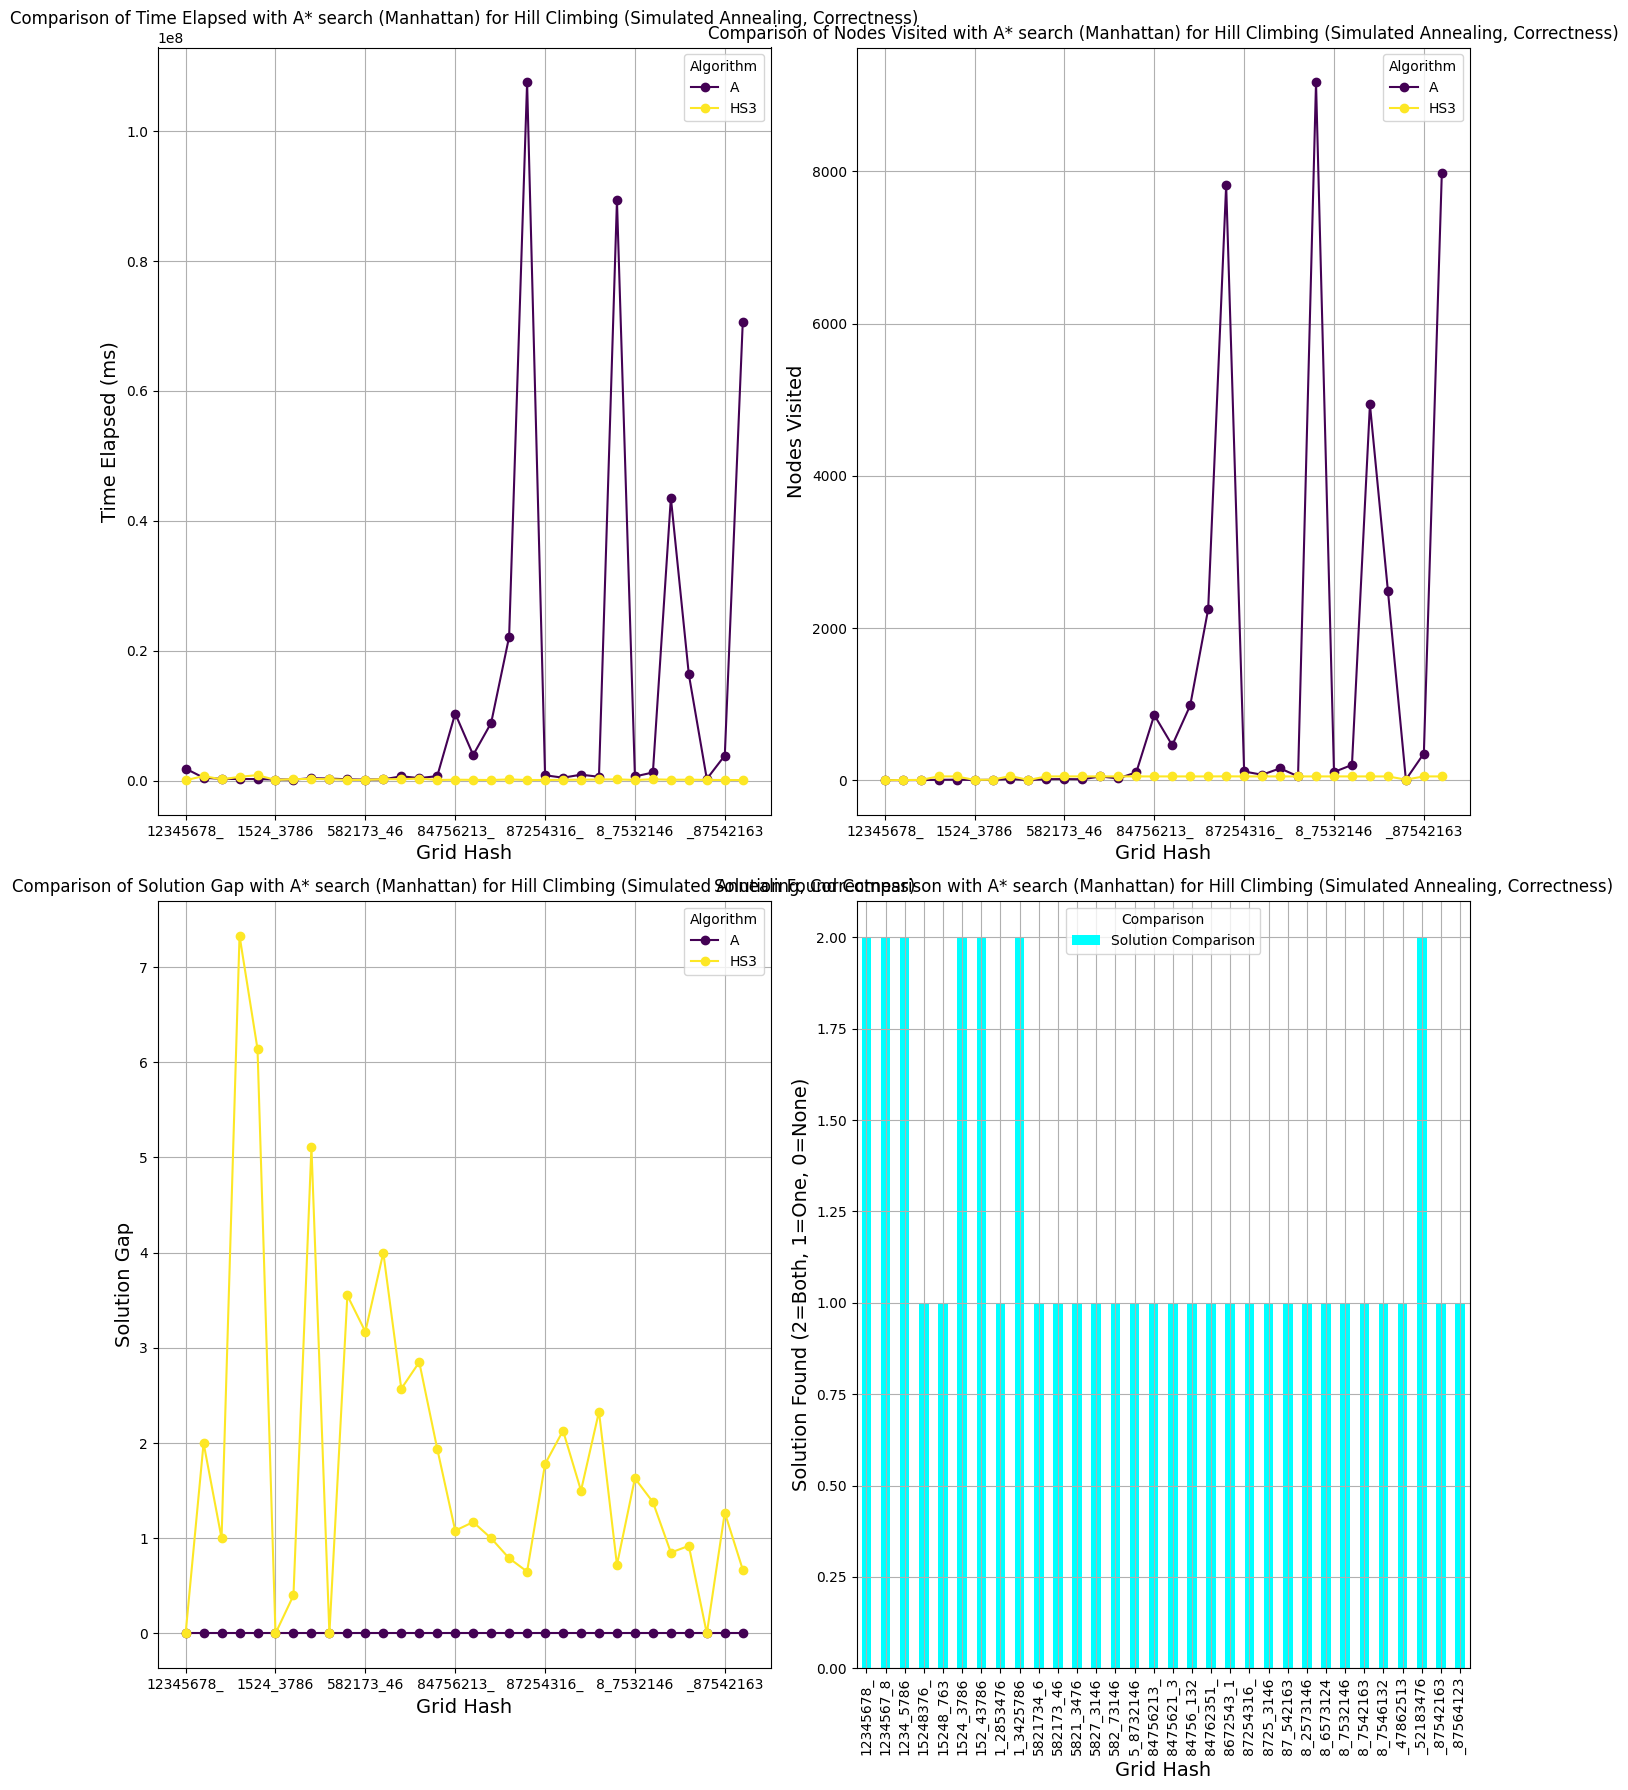

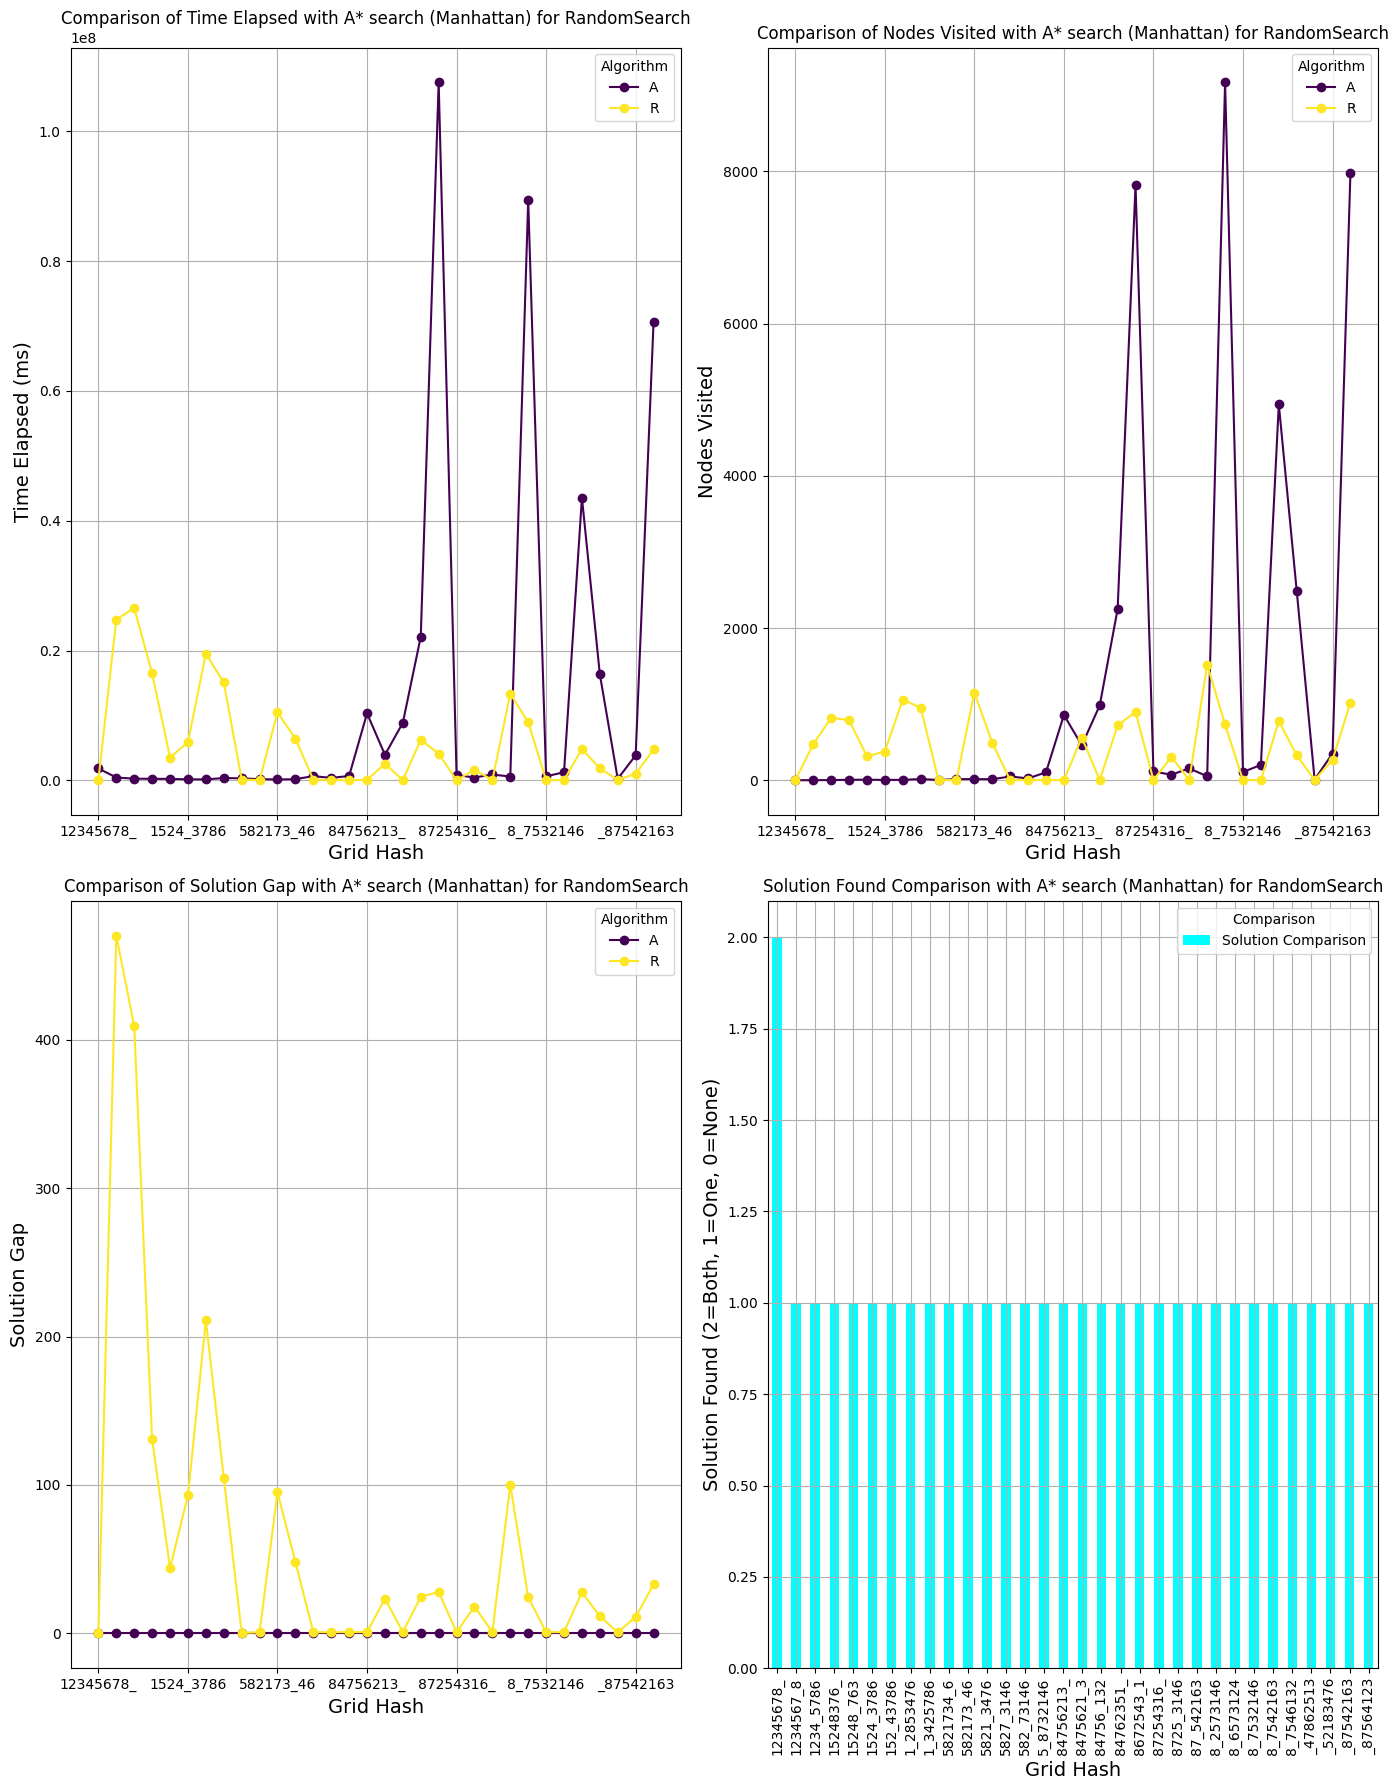

In [13]:
baseline_algorithm = 'A'
for algorithm in algorithm_categories.keys():
    if algorithm != baseline_algorithm:  # Exclude the baseline from the loop
        compare_with_baseline(algorithm, data, baseline_algorithm)


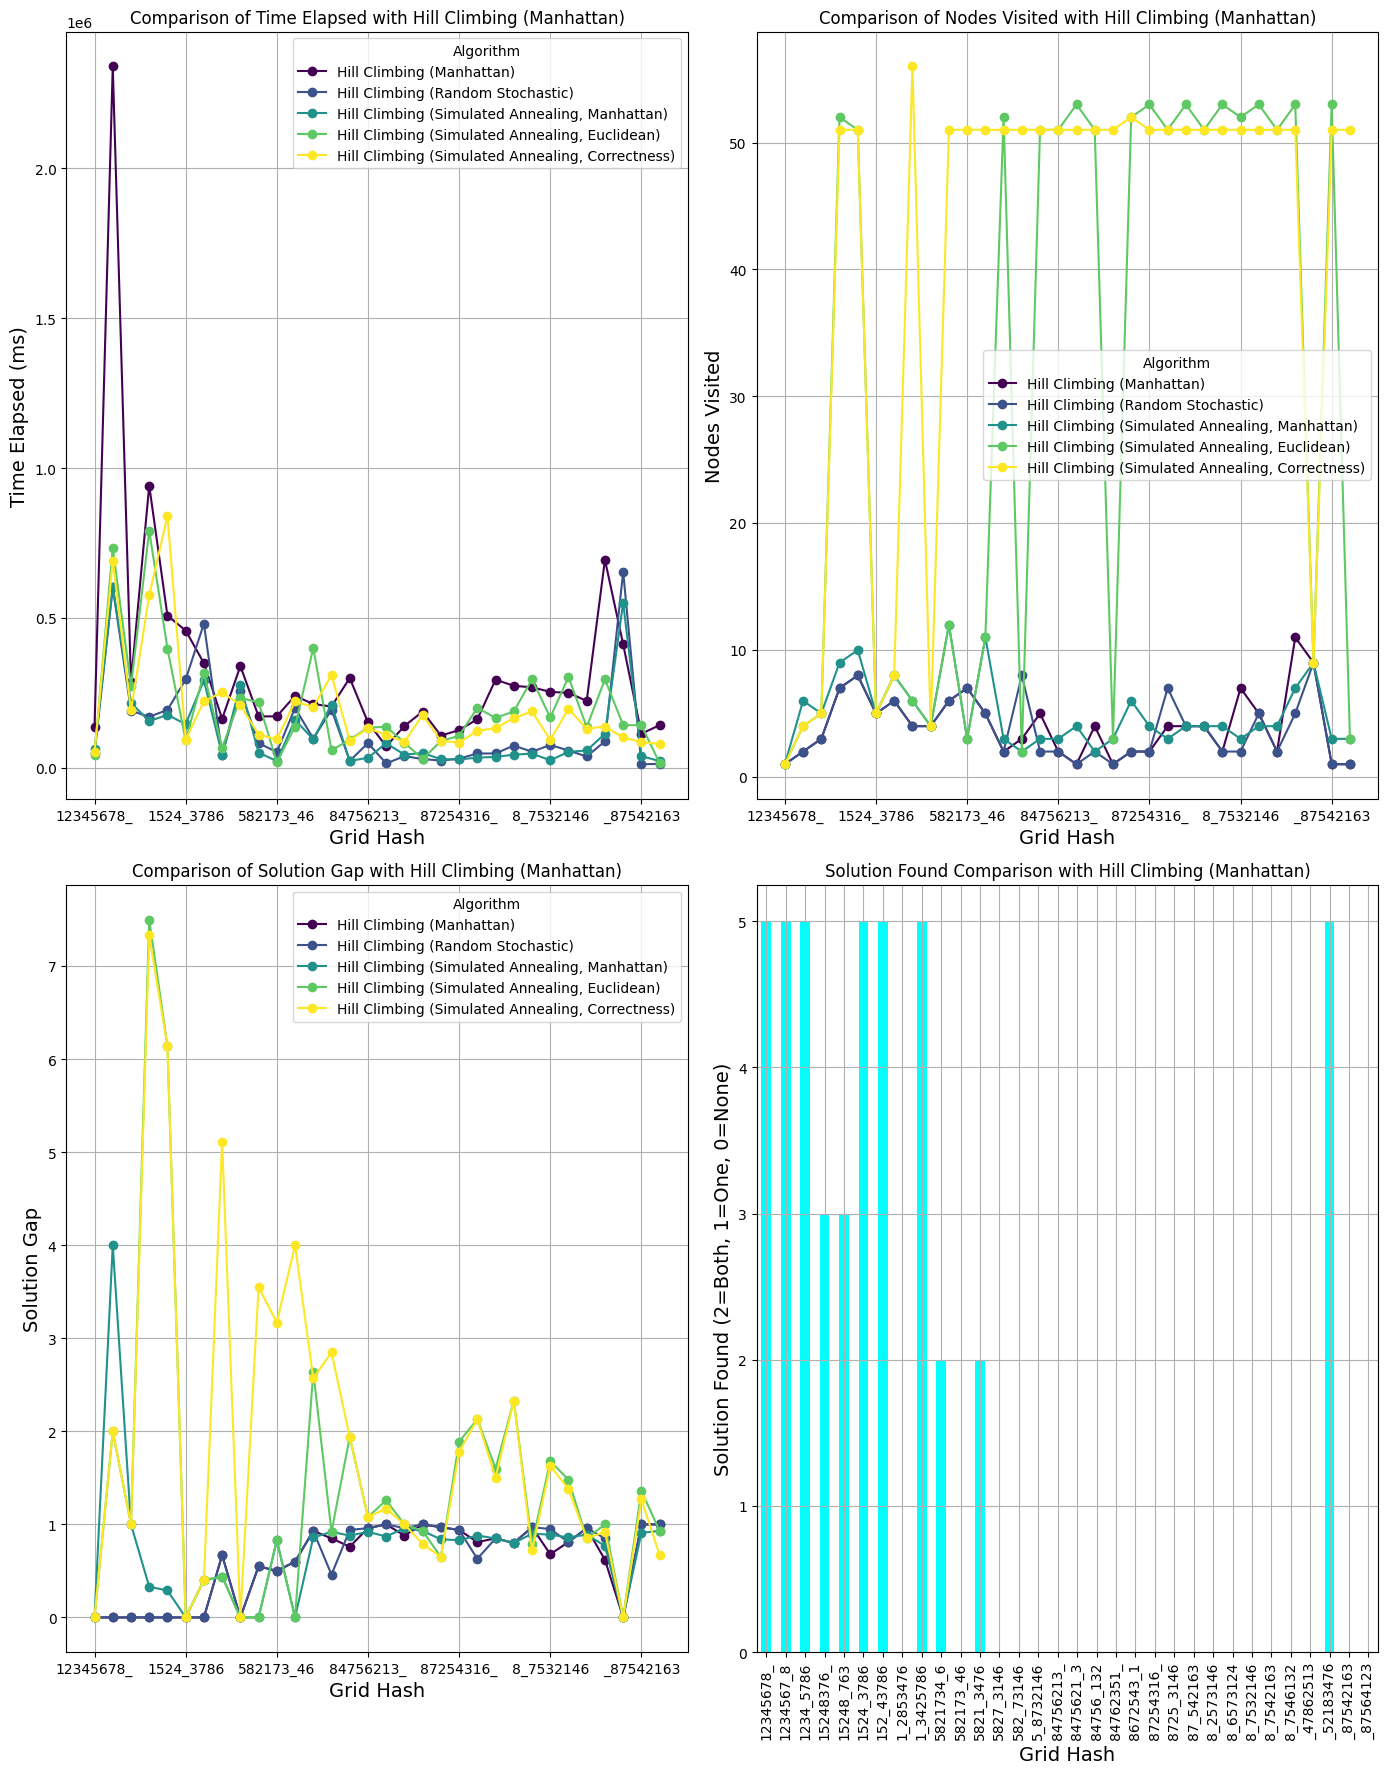

In [14]:
def compare_with_baseline_list(target_algorithms, data, baseline_algorithm='H'):
    algorithms = [baseline_algorithm] + target_algorithms
    filtered_data = data[data['algorithmName'].isin(algorithms)].copy()

    # Convert solutionFound to an integer representation for plotting
    # 2: Both found the solution, 1: Only one found, 0: None found
    filtered_data['solutionComparison'] = filtered_data.groupby('gridHash')['solutionFound'].transform('sum').astype(
        int)

    # Pivot data
    pivot_time = filtered_data.pivot(index='gridHash', columns='algorithmName', values='timeElapsed')
    pivot_nodes = filtered_data.pivot(index='gridHash', columns='algorithmName', values='nodesVisited')
    pivot_gap = filtered_data.pivot(index='gridHash', columns='algorithmName', values='solutionGap')

    # Rename columns
    for pivot_df in [pivot_time, pivot_nodes, pivot_gap]:
        pivot_df.columns = [algorithm_categories[col] for col in pivot_df.columns]

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 18))

    # Line graph for time elapsed
    pivot_time.plot(ax=ax[0][0], marker='o', colormap='viridis')
    ax[0][0].set_title(f'Comparison of Time Elapsed with {algorithm_categories[baseline_algorithm]}', fontsize=12)
    ax[0][0].set_xlabel('Grid Hash', fontsize=14)
    ax[0][0].set_ylabel('Time Elapsed (ms)', fontsize=14)
    ax[0][0].grid(True)
    ax[0][0].legend(title='Algorithm')

    # Line graph for nodes visited
    pivot_nodes.plot(ax=ax[0][1], marker='o', colormap='viridis')
    ax[0][1].set_title(f'Comparison of Nodes Visited with {algorithm_categories[baseline_algorithm]}', fontsize=12)
    ax[0][1].set_xlabel('Grid Hash', fontsize=14)
    ax[0][1].set_ylabel('Nodes Visited', fontsize=14)
    ax[0][1].grid(True)
    ax[0][1].legend(title='Algorithm')

    # Line graph for solution gap
    pivot_gap.plot(ax=ax[1][0], marker='o', colormap='viridis')
    ax[1][0].set_title(f'Comparison of Solution Gap with {algorithm_categories[baseline_algorithm]}', fontsize=12)
    ax[1][0].set_xlabel('Grid Hash', fontsize=14)
    ax[1][0].set_ylabel('Solution Gap', fontsize=14)
    ax[1][0].grid(True)
    ax[1][0].legend(title='Algorithm')

    # Bar plot for solution comparison
    filtered_data.groupby('gridHash')['solutionComparison'].mean().plot(kind='bar', ax=ax[1][1], color='cyan')
    ax[1][1].set_title(f'Solution Found Comparison with {algorithm_categories[baseline_algorithm]}', fontsize=12)
    ax[1][1].set_xlabel('Grid Hash', fontsize=14)
    ax[1][1].set_ylabel('Solution Found (2=Both, 1=One, 0=None)', fontsize=14)
    ax[1][1].grid(True)

    plt.tight_layout()
    plt.show()


hill_climbing_variants = ['HR', 'HS1', 'HS2', 'HS3']

compare_with_baseline_list(hill_climbing_variants, data)


In [15]:
# Group by algorithmName and filter for algorithms that found a solution for all grid hashes
algorithms_always_solved = data.groupby('algorithmName').filter(
    lambda x: x['solutionFound'].sum() == len(x['gridHash'].unique()))

unique_algorithms = algorithms_always_solved['algorithmName'].unique()

unique_algorithms

array(['B', 'I', 'I1', 'U', 'A', 'A1', 'A2', 'G', 'G1'], dtype=object)

In [25]:
filtered_data_always_solved = data[data['algorithmName'].isin(unique_algorithms)]
filtered_data_always_solved

algorithmName   gridHash  nodesVisited  movementsTaken  \
0               B  12345678_             1               0   
1               I  12345678_             1               0   
2              I1  12345678_             1               0   
3               U  12345678_             1               0   
4               A  12345678_             1               0   
..            ...        ...           ...             ...   
457             A  8672543_1          7821              31   
458            A1  8672543_1         34028              31   
459            A2  8672543_1        184846              31   
460             G  8672543_1        519140              31   
461            G1  8672543_1            96              51   

     optimalMovementsTaken  solutionFound  solutionGap  timeElapsed  \
0                        0           True         0.00      8733300   
1                        0           True         0.00       313300   
2                        0           True         0.00       245900   
3                        0           True         0.00      5191100   
4                        0           True         0.00      1839800   
..                     ...            ...          ...          ...   
457                     31           True         0.00    107528200   
458                     31           True         0.00    430815900   
459                     31           True         0.00   2907497700   
460                     31           True         0.00   2576841000   
461                     31           True         0.65       451600   

                 algorithmCategory  
0             Breadth-first search  
1           IDS without repetition  
2                      IDS classic  
3              Uniform-cost search  
4            A* search (Manhattan)  
..                             ...  
457          A* search (Manhattan)  
458          A* search (Euclidean)  
459  A* search (Correct Positions)  
460      Greedy best-first (Depth)  
461  Greedy best-first (Manhattan)  

[276 rows x 9 columns]

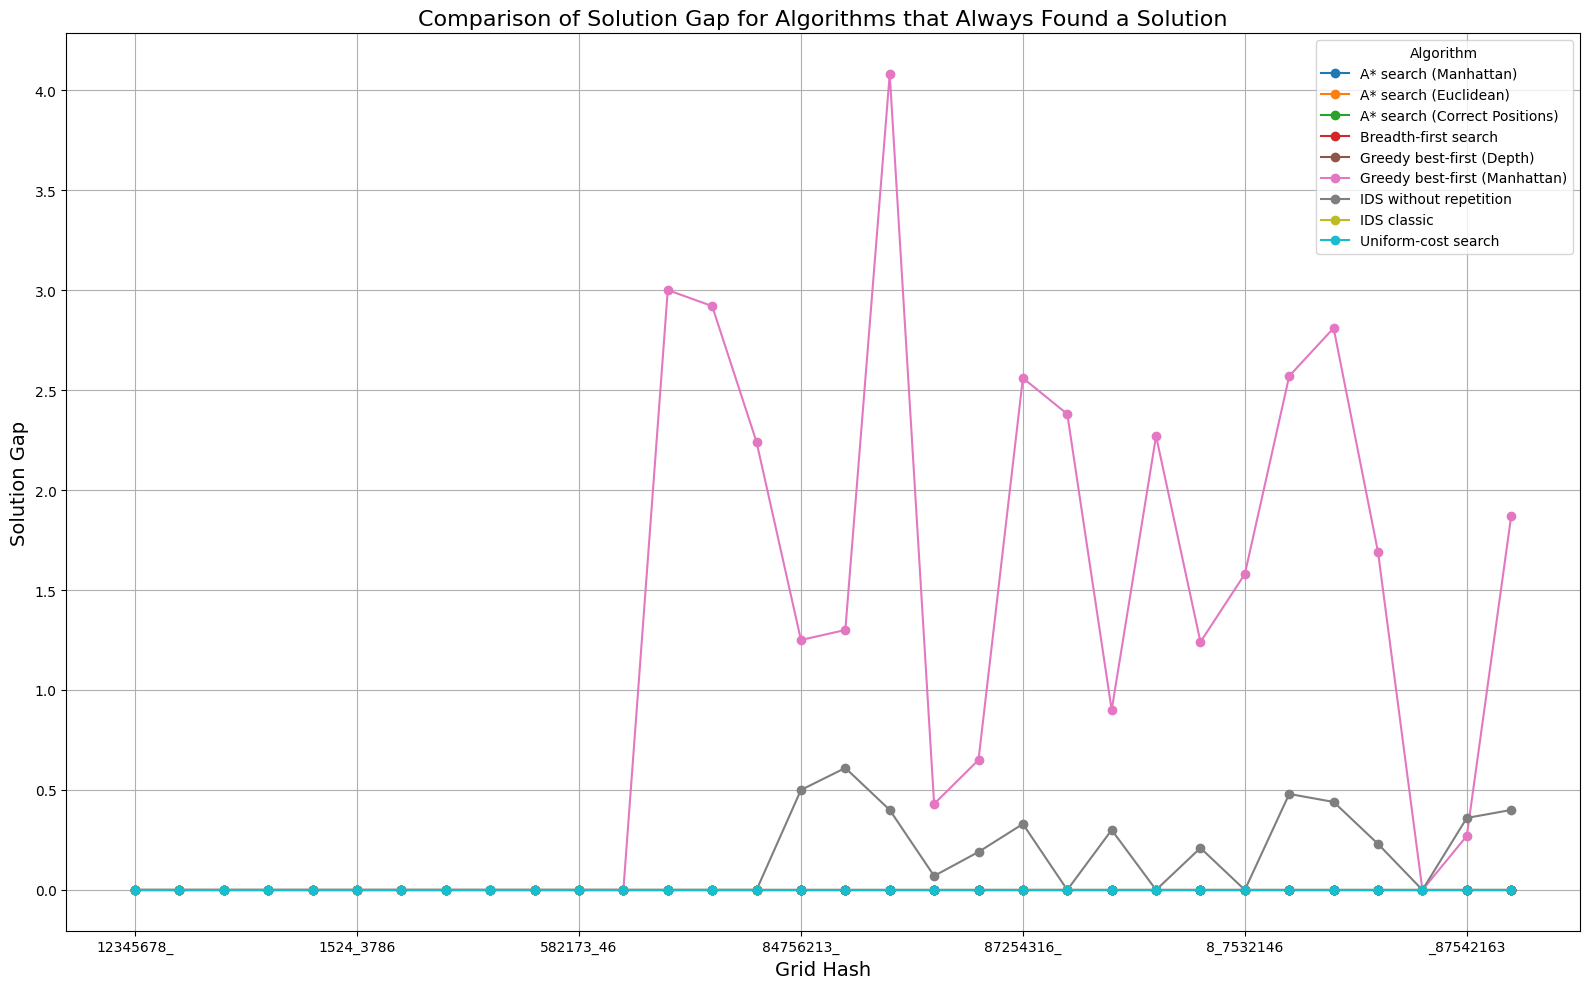

In [20]:

pivot_gap_always_solved = filtered_data_always_solved.pivot(index='gridHash', columns='algorithmName',
                                                            values='solutionGap')

pivot_gap_always_solved.columns = [algorithm_categories[col] for col in pivot_gap_always_solved.columns]

plt.figure(figsize=(16, 10))

pivot_gap_always_solved.plot(ax=plt.gca(), marker='o', colormap='tab10')
plt.title('Comparison of Solution Gap for Algorithms that Always Found a Solution', fontsize=16)
plt.xlabel('Grid Hash', fontsize=14)
plt.ylabel('Solution Gap', fontsize=14)
plt.grid(True)
plt.legend(title='Algorithm')

plt.tight_layout()
plt.show()


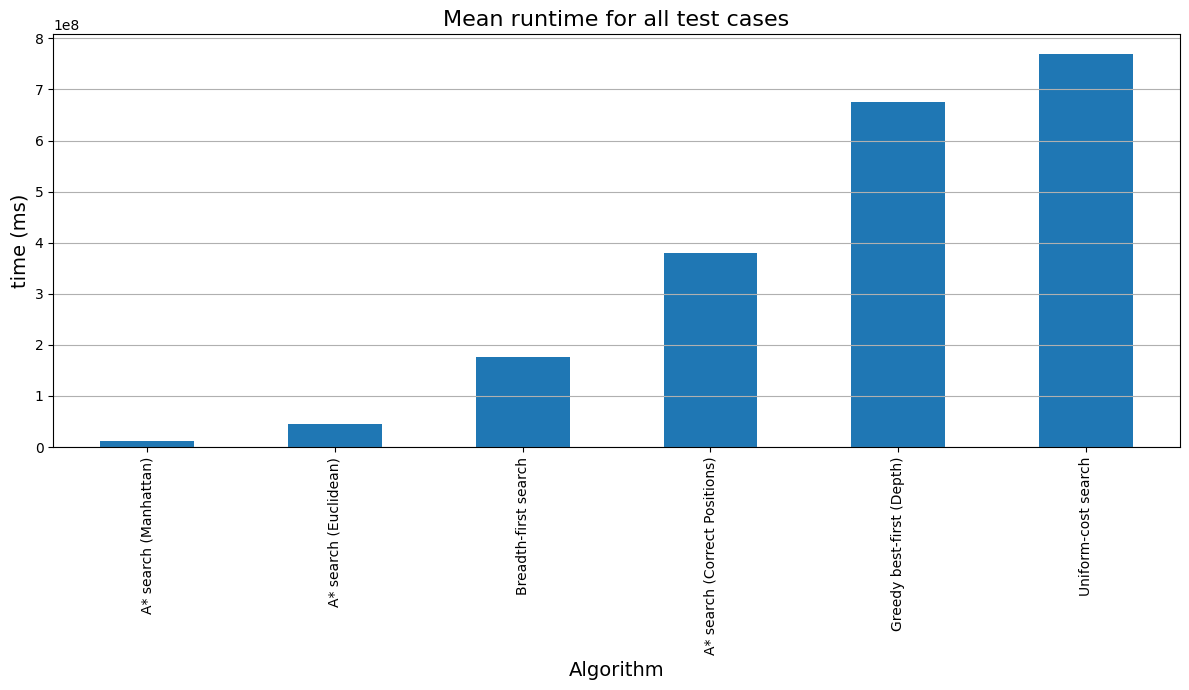

In [30]:
# Filtering the data for the specified algorithms
selected_algorithms = ['B', 'U', 'A', 'A1', 'A2', 'G']
filtered_data_selected = filtered_data_always_solved[filtered_data_always_solved['algorithmName'].isin(selected_algorithms)]

mean_time_by_algorithm = filtered_data_selected.groupby('algorithmName')['timeElapsed'].mean()

mean_time_by_algorithm.index = [algorithm_categories[col] for col in mean_time_by_algorithm.index]

# Plotting the barplot
plt.figure(figsize=(12, 7))
mean_time_by_algorithm.sort_values().plot(kind='bar')
plt.title('Mean runtime for all test cases', fontsize=16)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('time (ms)', fontsize=14)
plt.grid(axis='y')

plt.tight_layout()
plt.show()
